# Proyecto Final
## Temática: Sistema Crediticio

#### Curso: Data Science
#### Alumnos: Adrián Spesot, Alejo Romano y Armando López

#### Profesor: Octavio Lafourcade

#### Tutor: Johan Caceido

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix, confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

import xgboost as xgb

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Funciones

In [ ]:
def no_outliers(df, column):
  Q1 = df[column].quantile(q = .25)
  Q3 = df[column].quantile(q = .75)
  IQR = Q3 - Q1
  
  df_sin_outlier = df[((df[column] > (Q1-1.5 * IQR)) & (df[column] < (Q3 + 1.5 * IQR)))]
  return df_sin_outlier

## Importación de datos

In [ ]:
path_alejo = '/content/drive/MyDrive/Data Science - Coder House/Proyecto final/Proyecto_Final/3er pre-entrega/train.csv'
path_adri = '/content/drive/MyDrive/Data Science - Coder House/Desafíos Obligatorios/Proyecto_Final/1er pre-entrega/train.csv'
path = 'C:\\Users\\Adrian\\Escritorio\\CoderHouse\DataScience\\ProyectoFinal\\PF_DataScience_SistemaCrediticio\\train.csv'

df_credit = pd.read_csv(path)
df_credit.head(10) 

C:\Users\Adrian\AppData\Local\Temp\ipykernel_3544\366629052.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credit = pd.read_csv(path)


ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN                  3  ...   
2  Scientist      19114.12                    NaN                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4  Scientist      19114.12            1824.843333                  3  ...   
5  Scientist      19114.12                    NaN                  3  ...   
6  Scientist      19114.12            1824.843333                  3  ...   
7  Scientist      19114.12            1824.843333                  3  ...   
8    _______      34847.84            3037.986667                  2  ...   
9    Teacher      34847.84            3037.986667                  2  ...   

   Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0           _            809.98                26.822620   
1        Good            809.98                31.944960   
2        Good            809.98                28.609352   
3        Good            809.98                31.377862   
4        Good            809.98                24.797347   
5        Good            809.98                27.262259   
6        Good            809.98                22.537593   
7        Good            809.98                23.933795   
8        Good            605.03                24.464031   
9        Good            605.03                38.550848   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   
8  26 Years and 7 Months                     No           18.816215   
9  26 Years and 8 Months                     No           18.816215   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   
8        104.291825168246    Low_spent_Small_value_payments   
9       40.39123782853101   High_spent_Large_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872

## Análisis exploratorio de los datos (EDA)

In [ ]:
df_credit.shape

(100000, 28)

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df_credit.describe(include = 'all').T

count  unique                               top  \
ID                          100000  100000                            0x1602   
Customer_ID                 100000   12500                         CUS_0xd40   
Month                       100000       8                           January   
Name                         90015   10139                            Langep   
Age                         100000    1788                                38   
SSN                         100000   12501                         #F%$D@*&8   
Occupation                  100000      16                           _______   
Annual_Income               100000   18940                          36585.12   
Monthly_Inhand_Salary      84998.0     NaN                               NaN   
Num_Bank_Accounts         100000.0     NaN                               NaN   
Num_Credit_Card           100000.0     NaN                               NaN   
Interest_Rate             100000.0     NaN                               NaN   
Num_of_Loan                 100000     434                                 3   
Type_of_Loan                 88592    6260                     Not Specified   
Delay_from_due_date       100000.0     NaN                               NaN   
Num_of_Delayed_Payment       92998     749                                19   
Changed_Credit_Limit        100000    4384                                 _   
Num_Credit_Inquiries       98035.0     NaN                               NaN   
Credit_Mix                  100000       4                          Standard   
Outstanding_Debt            100000   13178                           1360.45   
Credit_Utilization_Ratio  100000.0     NaN                               NaN   
Credit_History_Age           90970     404            15 Years and 11 Months   
Payment_of_Min_Amount       100000       3                               Yes   
Total_EMI_per_month       100000.0     NaN                               NaN   
Amount_invested_monthly      95521   91049                         __10000__   
Payment_Behaviour           100000       7    Low_spent_Small_value_payments   
Monthly_Balance              98800   98792  __-333333333333333333333333333__   
Credit_Score                100000       3                          Standard   

                           freq         mean          std         min  \
ID                            1          NaN          NaN         NaN   
Customer_ID                   8          NaN          NaN         NaN   
Month                     12500          NaN          NaN         NaN   
Name                         44          NaN          NaN         NaN   
Age                        2833          NaN          NaN         NaN   
SSN                        5572          NaN          NaN         NaN   
Occupation                 7062          NaN          NaN         NaN   
Annual_Income                16          NaN          NaN         NaN   
Monthly_Inhand_Salary       NaN   4194.17085  3183.686167  303.645417   
Num_Bank_Accounts           NaN     17.09128   117.404834        -1.0   
Num_Credit_Card             NaN     22.47443    129.05741         0.0   
Interest_Rate               NaN     72.46604   466.422621         1.0   
Num_of_Loan               14386          NaN          NaN         NaN   
Type_of_Loan               1408          NaN          NaN         NaN   
Delay_from_due_date         NaN     21.06878    14.860104        -5.0   
Num_of_Delayed_Payment     5327          NaN          NaN         NaN   
Changed_Credit_Limit       2091          NaN          NaN         NaN   
Num_Credit_Inquiries        NaN    27.754251   193.177339         0.0   
Credit_Mix                36479          NaN          NaN         NaN   
Outstanding_Debt             24          NaN          NaN         NaN   
Credit_Utilization_Ratio    NaN    32.285173     5.116875        20.0   
Credit_History_Age          446          NaN          NaN         NaN   
Payment_of_Min_Amount     523

Se observa que algunas columnas son del tipo de variable incorrecto. Por otro lado, hay algunas variables que presentan datos faltantes y outliers.

In [ ]:
df_credit.duplicated().sum()

0

Se observa que no hay datos duplicados. 

### Variables no informativas

Las variables **ID**, **Customer_ID**, **Name** y **SSN** son variables identificadoras de los registros. Por tal motivo, se eliminan dado que no serán significativas para el modelo. Además, se elimina "Credit_History_Age" ya que no resulta importante para el modelo.

In [ ]:
df_credit.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age'], axis = 1, inplace = True)

### Preacondicionamiento de variables

Para esta sección, se corrige el tipo de variable y se realizan algunas modificaciones de los datos, como eliminación de guión bajo o codificación de variable.

Para empezar, se cambian las variables que son categóricas. La variable respuesta (**Credit_Score**) no se pasa a variable categórica dado que luego se va a codificar mediante números.

In [ ]:
df_credit['Month'] = df_credit['Month'].astype('category')
df_credit['Occupation'] = df_credit['Occupation'].astype('category')
df_credit['Type_of_Loan'] = df_credit['Type_of_Loan'].astype('category')
df_credit['Credit_Mix'] = df_credit['Credit_Mix'].astype('category')
df_credit['Payment_of_Min_Amount'] = df_credit['Payment_of_Min_Amount'].astype('category')
df_credit['Payment_Behaviour'] = df_credit['Payment_Behaviour'].astype('category')

Se verifica los tipos de datos cambiados.

In [ ]:
df_credit.dtypes

Month                       category
Age                           object
Occupation                  category
Annual_Income                 object
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                   object
Type_of_Loan                category
Delay_from_due_date            int64
Num_of_Delayed_Payment        object
Changed_Credit_Limit          object
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt              object
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount       category
Total_EMI_per_month          float64
Amount_invested_monthly       object
Payment_Behaviour           category
Monthly_Balance               object
Credit_Score                  object
dtype: object

Con respecto a las variables numéricas, algunas presentan caracteres que impiden un correcto cambio de tipo de variable. Por ejemplo, algunos registros de la variable age presentan un guión bajo ('_'). Por lo tanto, se analiza una por una para corregir los datos y poder cambiar el tipo de variable.

#### Age

La variable **Age** presenta un guión bajo ('_') o más en los registros.

In [ ]:
df_credit['Age'].value_counts()

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [ ]:
df_credit['Age'] = df_credit['Age'].str.replace('_','')
df_credit['Age'] = df_credit['Age'].astype(np.int64)

#### Annual_Income

Esta variable también presenta '_' en los registros.

In [ ]:
df_credit['Annual_Income'].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [ ]:
df_credit['Annual_Income'] = df_credit['Annual_Income'].str.replace('_','')
df_credit['Annual_Income'] = df_credit['Annual_Income'].astype(float)

#### Num_of_Loan

Esta variable también presenta '_' en los registros.

In [ ]:
df_credit['Num_of_Loan'].value_counts()

3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

In [ ]:
df_credit['Num_of_Loan'] = df_credit['Num_of_Loan'].str.replace('_','')
df_credit['Num_of_Loan'] = df_credit['Num_of_Loan'].astype(np.int64)

#### Num_of_Delayed_Payment

También presenta '_' en los registros. Además, dado que tiene valores NaN, se pasa la variable a tipo float.

In [ ]:
df_credit['Num_of_Delayed_Payment'].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [ ]:
df_credit['Num_of_Delayed_Payment'] = df_credit['Num_of_Delayed_Payment'].str.replace('_','')
df_credit['Num_of_Delayed_Payment'] = df_credit['Num_of_Delayed_Payment'].astype(float)

#### Outstanding_Debt

Presenta '_' en los registros.

In [ ]:
df_credit['Outstanding_Debt'].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [ ]:
df_credit['Outstanding_Debt'] = df_credit['Outstanding_Debt'].str.replace('_','')
df_credit['Outstanding_Debt'] = df_credit['Outstanding_Debt'].astype(float)

#### Changed_Credit_Limit

Presenta '_' en los registros. Además, hay registros que solo tienen el guión bajo, por lo que al reemplazar dicho caracter, el registro pasa a estar vacío. Por esta razón, se lo reemplaza con un NaN.

In [ ]:
df_credit['Changed_Credit_Limit'].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [ ]:
df_credit['Changed_Credit_Limit'] = df_credit['Changed_Credit_Limit'].str.replace('_','')

for i in range(len(df_credit['Changed_Credit_Limit'])):
  if df_credit['Changed_Credit_Limit'].iloc[i] == '':
    df_credit.at[i, 'Changed_Credit_Limit'] = float('NaN')

In [ ]:
df_credit['Changed_Credit_Limit'] = df_credit['Changed_Credit_Limit'].astype(float)

In [ ]:
df_credit['Changed_Credit_Limit'].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

#### Amount_invested_monthly

In [ ]:
df_credit['Amount_invested_monthly'].value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [ ]:
df_credit['Amount_invested_monthly'] = df_credit['Amount_invested_monthly'].str.replace('_','')
df_credit['Amount_invested_monthly'] = df_credit['Amount_invested_monthly'].astype(float)

#### Monthly_Balance

In [ ]:
df_credit["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

Se considera "_-333333333333333333333333333_" como valores erróneos, por lo que se eliminan del dataset.

In [ ]:
df_credit = df_credit[df_credit['Monthly_Balance'] != "__-333333333333333333333333333__"]
df_credit.reset_index(inplace=True, drop=True)

In [ ]:
df_credit['Monthly_Balance'] = df_credit['Monthly_Balance'].str.replace('_','')
df_credit['Monthly_Balance'] = df_credit['Monthly_Balance'].astype(float)

#### Verificación de tipos de variables

In [ ]:
df_credit.dtypes

Month                       category
Age                            int64
Occupation                  category
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Type_of_Loan                category
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                  category
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount       category
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour           category
Monthly_Balance              float64
Credit_Score                  object
dtype: object

### Datos faltantes

En el siguiente código, se observa que hay 7 variables con datos faltantes, y se muestra la cantidad por variable. Se puede notar que la variable **Monthly_Inhand_Salary** es la que presenta más datos faltantes.

In [ ]:
df_credit.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15001
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4478
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

#### Monthly_Inhand_Salary

Dado que la cantidad de datos faltantes es grande, una imputación podría afectar la información del dataset. Además, se observa que hay otra variable con información de los ingresos ("Annual_Income") y que no presenta datos faltantes. Por todo esto, se decide analizar la correlación que hay entre las dos variables.

Para empezar, se crea un dataframe con las dos variables a analizar. Esto se separa del dataframe original para realizar cambios que no afecten a todo el dataset.

In [ ]:
df_salary = df_credit[['Annual_Income', 'Monthly_Inhand_Salary']]
df_salary.describe()

Annual_Income  Monthly_Inhand_Salary
count   9.999100e+04           84990.000000
mean    1.764268e+05            4194.150202
std     1.429682e+06            3183.698715
min     7.005930e+03             303.645417
25%     1.945650e+04            1625.558333
50%     3.757861e+04            3093.745000
75%     7.279092e+04            5957.448333
max     2.419806e+07           15204.633333

Primero se eliminan las filas que presenten NaNs. Hay que recordar que solo la variable "Monthly_Inhand_Salary" es la que presentaba datos faltantes.

In [ ]:
df_salary.dropna(inplace = True);
df_salary.isna().sum()

C:\Users\Adrian\AppData\Local\Temp\ipykernel_3544\3367357970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary.dropna(inplace = True);


Annual_Income            0
Monthly_Inhand_Salary    0
dtype: int64

Luego, se utiliza la función "no_outliers" para eliminar aquellos puntos considerados outliers, teniendo en mente el gráfico boxplot.

In [ ]:
df_salary = no_outliers(df_salary, 'Monthly_Inhand_Salary')
df_salary = no_outliers(df_salary, 'Annual_Income')

Finalmente, se realiza la correlación entre las dos variables.

In [ ]:
df_salary['Monthly_Inhand_Salary'].corr(df_salary['Annual_Income'])

0.9978272598954341

Se observa que hay una alta correlación (0.9978), por lo que se podría decir que ambas variables presentan la misma información, lo cual es redundante. Por lo tanto, se decide eliminar la variable "Monthly_Inhand_Salary" dado que es la que presenta una gran cantidad de datos faltantes, mientras que la otra variable está completa.

In [ ]:
df_credit.drop(['Monthly_Inhand_Salary'], axis = 1, inplace = True)

#### Type_of_Loan

In [ ]:
# Eliminamos todas las filas del dataset donde en Type_of_loan sea NaN
df_credit = df_credit[df_credit['Type_of_Loan'].notna()] 
df_credit.reset_index(inplace=True, drop = True)

Con respecto a esta variable, hay varios elementos dentro de cada registro. Por lo tanto, requiere de un preprocesamiento.

In [ ]:
df_credit['Type_of_Loan'].tail()

88578    Auto Loan, and Student Loan
88579    Auto Loan, and Student Loan
88580    Auto Loan, and Student Loan
88581    Auto Loan, and Student Loan
88582    Auto Loan, and Student Loan
Name: Type_of_Loan, dtype: category
Categories (6260, object): ['Auto Loan', 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, C..., 'Auto Loan, Auto Loan, Auto Loan, Auto Loan, S..., 'Auto Loan, Auto Loan, Auto Loan, Credit-Build..., ..., 'Student Loan, and Not Specified', 'Student Loan, and Payday Loan', 'Student Loan, and Personal Loan', 'Student Loan, and Student Loan']

In [ ]:
list_type_loan = list(df_credit['Type_of_Loan'][~df_credit['Type_of_Loan'].isnull().values])  # Lista con todos los registros no nulos de la variable type_of_loan

unique_type_loan = []

for i in list_type_loan:      # Recorro los registros de list_type_loan
  values = i.split(',')       # Separo los valores de cada registro utilizando la coma como separador
  for value in values:        # Recorro los valores en cada lista de valores de los registros
    value = value.strip(' ')  # Saco los espacios al principio y al final de cada value
    if 'and' in value:        # Las ultimas opciones en cada registro tiene un 'and' al principio. Hay que sacarlos
      value = value[4 : ]
    if value not in unique_type_loan:   # Si el tipo de prestamo no esta en la lista, lo agrego
      unique_type_loan.append(value)

print(unique_type_loan)

['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'Home Equity Loan', 'Not Specified', 'Mortgage Loan', 'Student Loan', 'Debt Consolidation Loan', 'Payday Loan']


Se observa que hay 9 tipos de préstamos, de los cuales uno es 'Not Specified'. Para que pueda ser utilizado en el modelo, se tendría que separar en 9 columnas indicando con un 1 la presencia de ese tipo de préstamo y con un 0 la no presencia. Esto sería obtener las variables dummies para la variable 'Type_of_Loan'.

In [ ]:
# Se crean las futuras columnas con ceros. No se incluye el tipo 'Not Specified'
auto_loan = [0] * (df_credit.shape[0])
credit_builder_loan = [0] * (df_credit.shape[0])
personal_loan = [0] * (df_credit.shape[0])
home_equity_loan = [0] * (df_credit.shape[0])
mortgage_loan = [0] * (df_credit.shape[0])
student_loan = [0] * (df_credit.shape[0])
debt_consolidation_loan = [0] * (df_credit.shape[0])
payday_loan = [0] * (df_credit.shape[0])

In [ ]:
# Aquellos registros que sean 'Not Specified', las columnas van a estar con todos 0. Si se desean eliminar, hay que chequear que sean todos ceros.
for i in range(df_credit.shape[0]):
  if str(df_credit['Type_of_Loan'][i]) != 'nan':
    values = df_credit['Type_of_Loan'][i].split(',')
    for value in values:        # Recorro los valores en cada lista de valores de los registros
      value = value.strip(' ')  # Saco los espacios al principio y al final de cada value
      if 'and' in value:        # Las ultimas opciones en cada registro tiene un 'and' al principio. Hay que sacarlos
        value = value[4 : ]
      if 'Auto Loan' == value:
          auto_loan[i] = 1
      
      if 'Credit-Builder Loan' == value:
          credit_builder_loan[i] = 1

      if 'Personal Loan' == value:
          personal_loan[i] = 1

      if 'Home Equity Loan' == value:
          home_equity_loan[i] = 1

      if 'Mortgage Loan' == value:
          mortgage_loan[i] = 1

      if 'Student Loan' == value:
          student_loan[i] = 1

      if 'Debt Consolidation Loan' == value:
          debt_consolidation_loan[i] = 1

      if 'Payday Loan' == value:
          payday_loan[i] = 1

In [ ]:
# Se agregan las nuevas columnas al dataframe
df_credit['Auto_Loan'] = auto_loan
df_credit['Credit_Builder_Loan'] = credit_builder_loan
df_credit['Personal_Loan'] = personal_loan
df_credit['Home_Enquity_Loan'] = home_equity_loan
df_credit['Mortgage_Loan'] = mortgage_loan
df_credit['Student_Loan'] = student_loan
df_credit['Debt_Consolidation_Loan'] = debt_consolidation_loan
df_credit['Payday_Loan'] = payday_loan

In [ ]:
# Se elimina la columna Type_of_Loan
df_credit.drop(['Type_of_Loan'], axis = 1, inplace = True)

In [ ]:
df_credit.head(5)

Month  Age Occupation  Annual_Income  Num_Bank_Accounts  \
0   January   23  Scientist       19114.12                  3   
1  February   23  Scientist       19114.12                  3   
2     March -500  Scientist       19114.12                  3   
3     April   23  Scientist       19114.12                  3   
4       May   23  Scientist       19114.12                  3   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                   -1   
2                4              3            4                    3   
3                4              3            4                    5   
4                4              3            4                    6   

   Num_of_Delayed_Payment  ...  Monthly_Balance  Credit_Score Auto_Loan  \
0                     7.0  ...       312.494089          Good         1   
1                     NaN  ...       284.629162          Good         1   
2                     7.0  ...       331.209863          Good         1   
3                     4.0  ...       223.451310          Good         1   
4                     NaN  ...       341.489231          Good         1   

   Credit_Builder_Loan  Personal_Loan Home_Enquity_Loan  Mortgage_Loan  \
0                    1              1                 1              0   
1                    1              1                 1              0   
2                    1              1                 1              0   
3                    1              1                 1              0   
4                    1              1                 1              0   

   Student_Loan Debt_Consolidation_Loan  Payday_Loan  
0             0                       0            0  
1             0                       0            0  
2             0                       0            0  
3             0                       0            0  
4             0                       0            0  

[5 rows x 29 columns]

#### Num_of_Delayed_Payment

Para imputar los datos faltantes de esta variable, se realiza un histograma para analizar su distribución. Al graficar, se observa que hay varios outliers, por lo que se decide limitar el eje X para observar mejor la mayor concentración de valores. Se observa que la variable no es simétrica y no se asemeja a una campana. Por lo tanto, se decide imputar los valores faltantes con la mediana de la variable.

[Text(0.5, 0, 'Num_of_Delayed_Payment'),
 Text(0, 0.5, 'Cantidad de observaciones'),
 Text(0.5, 1.0, 'Histograma del Num_of_Delayed_Payment'),
 (-200.0, 200.0)]

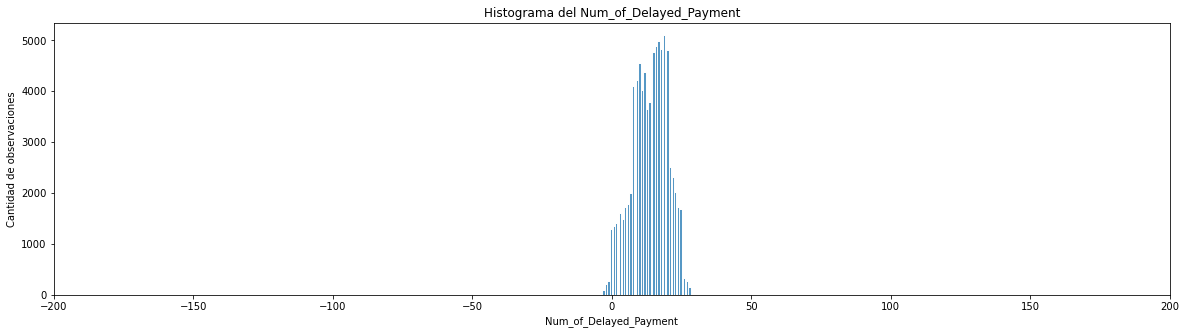

In [ ]:
# Histograma
plt.figure(figsize=(20, 5))
ax = sns.histplot(df_credit, x = "Num_of_Delayed_Payment")

ax.set(xlabel = "Num_of_Delayed_Payment", ylabel = "Cantidad de observaciones", title = "Histograma del Num_of_Delayed_Payment", xlim=(-200, 200))

In [ ]:
num_delay_pay_median = df_credit["Num_of_Delayed_Payment"].median()  # 14.0

df_credit["Num_of_Delayed_Payment"] = df_credit["Num_of_Delayed_Payment"].fillna(num_delay_pay_median)

A continuación, se verifica que no hayan quedado datos faltantes en la variable analizada.

In [ ]:
df_credit['Num_of_Delayed_Payment'].isna().sum()

0

#### Changed_Credit_Limit

Para imputar los datos faltantes de esta variable, se realiza un histograma para analizar su distribución. Al graficar, se observa que la variable no es simétrica y no se asemeja a una campana. Por lo tanto, se decide imputar los valores faltantes con la mediana de la variable.

[Text(0.5, 0, 'Changed_Credit_Limit'),
 Text(0, 0.5, 'Cantidad de observaciones'),
 Text(0.5, 1.0, 'Histograma del Changed_Credit_Limit')]

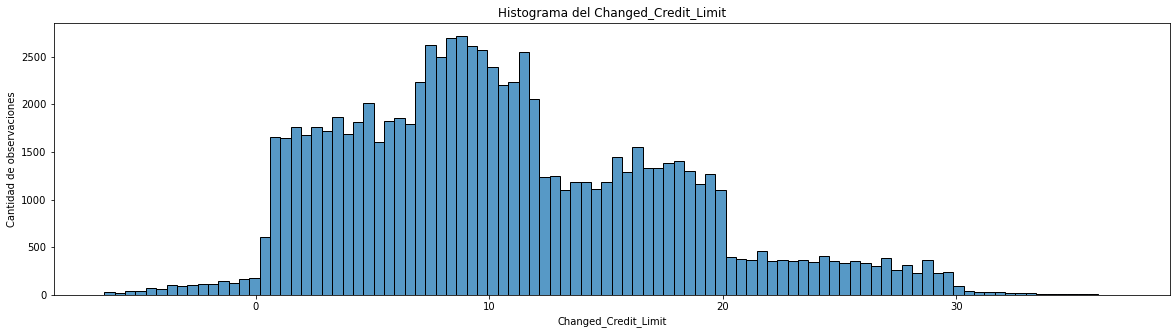

In [ ]:
# Histograma
plt.figure(figsize=(20, 5))
ax = sns.histplot(df_credit, x = "Changed_Credit_Limit")

ax.set(xlabel = "Changed_Credit_Limit", ylabel = "Cantidad de observaciones", title = "Histograma del Changed_Credit_Limit")

In [ ]:
credit_limit_median = df_credit["Changed_Credit_Limit"].median()  # 9.4

df_credit["Changed_Credit_Limit"] = df_credit["Changed_Credit_Limit"].fillna(credit_limit_median)

A continuación, se verifica que no hayan quedado datos faltantes en la variable analizada.

In [ ]:
df_credit['Num_of_Delayed_Payment'].isna().sum()

0

#### Num_Credit_Inquiries

Para imputar los datos faltantes de esta variable, se realiza un histograma para analizar su distribución. Al graficar, se observa que hay varios outliers y que la variable no es simétrica y no se asemeja a una campana. Por lo tanto, se decide imputar los valores faltantes con la mediana de la variable.

(-80.0, 80.0)

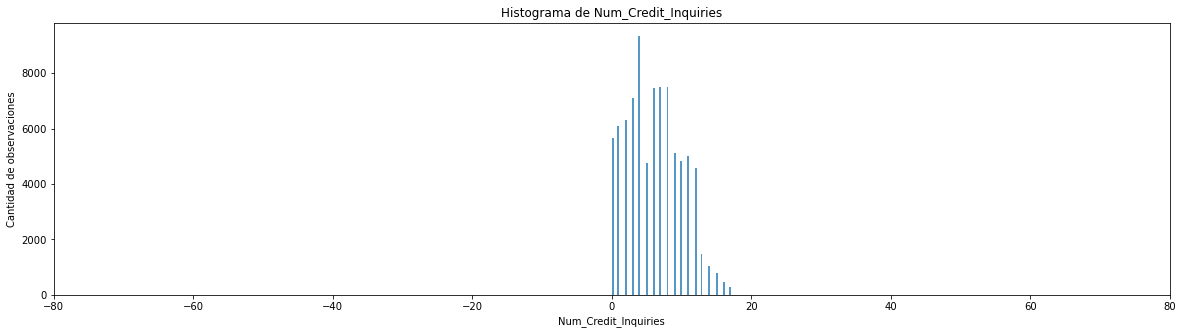

In [ ]:
# Histograma
plt.figure(figsize=(20, 5))
ax = sns.histplot(df_credit, x = "Num_Credit_Inquiries")

ax.set(xlabel = "Num_Credit_Inquiries", ylabel = "Cantidad de observaciones", title = "Histograma de Num_Credit_Inquiries")
plt.xlim(-80, 80)

In [ ]:
num_credit_inq_median = df_credit["Num_Credit_Inquiries"].median()  

df_credit["Num_Credit_Inquiries"] = df_credit["Num_Credit_Inquiries"].fillna(num_credit_inq_median)

A continuación, se verifica que no hayan quedado datos faltantes en la variable analizada.

In [ ]:
df_credit['Num_Credit_Inquiries'].isna().sum()

0

#### Amount_invested_monthly

Para imputar los datos faltantes de esta variable, se realiza un histograma para analizar su distribución. Al graficar, se observa que hay varios outliers y que la variable no es simétrica y no se asemeja a una campana. Por lo tanto, se decide imputar los valores faltantes con la mediana de la variable.

[Text(0.5, 0, 'Amount_invested_monthly'),
 Text(0, 0.5, 'Cantidad de observaciones'),
 Text(0.5, 1.0, 'Histograma de Amount_invested_monthly')]

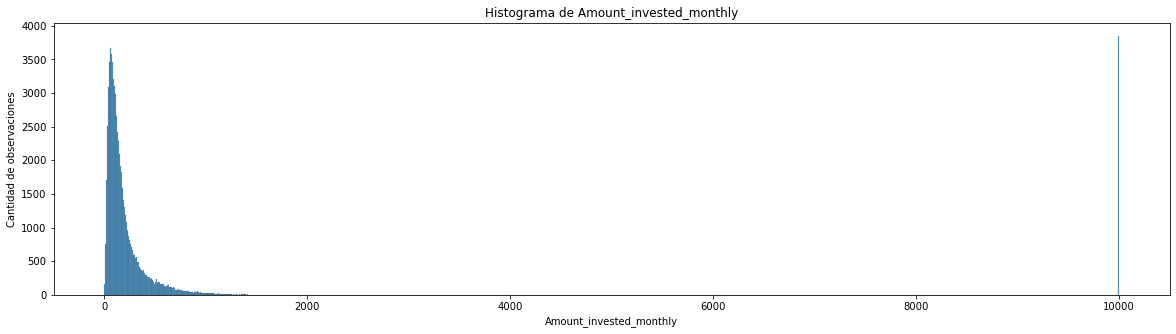

In [ ]:
# Histograma
plt.figure(figsize=(20, 5))
ax = sns.histplot(df_credit, x = "Amount_invested_monthly")

ax.set(xlabel = "Amount_invested_monthly", ylabel = "Cantidad de observaciones", title = "Histograma de Amount_invested_monthly")

In [ ]:
amount_inv_month_median = df_credit["Amount_invested_monthly"].median() 

df_credit["Amount_invested_monthly"] = df_credit["Amount_invested_monthly"].fillna(amount_inv_month_median)

A continuación, se verifica que no hayan quedado datos faltantes en la variable analizada.

In [ ]:
df_credit['Amount_invested_monthly'].isna().sum()

0

#### Monthly_Balance

Para esta variable también se utiliza la mediana.

In [ ]:
month_balance_median = df_credit["Monthly_Balance"].median()  

df_credit["Monthly_Balance"] = df_credit["Monthly_Balance"].fillna(month_balance_median)

A continuación, se verifica que no hayan quedado datos faltantes en la variable analizada.

In [ ]:
df_credit['Monthly_Balance'].isna().sum()

0

#### Verificación

In [ ]:
df_credit.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Auto_Loan                   0
Credit_Builder_Loan         0
Personal_Loan               0
Home_Enquity_Loan           0
Mortgage_Loan               0
Student_Loan                0
Debt_Consolidation_Loan     0
Payday_Loan                 0
dtype: int64

In [ ]:
df_credit.describe(include = "all").T

count unique                             top  \
Month                       88583      8                         January   
Age                       88583.0    NaN                             NaN   
Occupation                  88583     16                         _______   
Annual_Income             88583.0    NaN                             NaN   
Num_Bank_Accounts         88583.0    NaN                             NaN   
Num_Credit_Card           88583.0    NaN                             NaN   
Interest_Rate             88583.0    NaN                             NaN   
Num_of_Loan               88583.0    NaN                             NaN   
Delay_from_due_date       88583.0    NaN                             NaN   
Num_of_Delayed_Payment    88583.0    NaN                             NaN   
Changed_Credit_Limit      88583.0    NaN                             NaN   
Num_Credit_Inquiries      88583.0    NaN                             NaN   
Credit_Mix                  88583      4                        Standard   
Outstanding_Debt          88583.0    NaN                             NaN   
Credit_Utilization_Ratio  88583.0    NaN                             NaN   
Payment_of_Min_Amount       88583      3                             Yes   
Total_EMI_per_month       88583.0    NaN                             NaN   
Amount_invested_monthly   88583.0    NaN                             NaN   
Payment_Behaviour           88583      7  Low_spent_Small_value_payments   
Monthly_Balance           88583.0    NaN                             NaN   
Credit_Score                88583      3                        Standard   
Auto_Loan                 88583.0    NaN                             NaN   
Credit_Builder_Loan       88583.0    NaN                             NaN   
Personal_Loan             88583.0    NaN                             NaN   
Home_Enquity_Loan         88583.0    NaN                             NaN   
Mortgage_Loan             88583.0    NaN                             NaN   
Student_Loan              88583.0    NaN                             NaN   
Debt_Consolidation_Loan   88583.0    NaN                             NaN   
Payday_Loan               88583.0    NaN                             NaN   

                           freq           mean             std       min  \
Month                     11074            NaN             NaN       NaN   
Age                         NaN     109.874095      685.326167    -500.0   
Occupation                 6196            NaN             NaN       NaN   
Annual_Income               NaN  174601.224644  1433001.776642   7005.93   
Num_Bank_Accounts           NaN      17.197329      117.074385      -1.0   
Num_Credit_Card             NaN      22.379441      128.225357       0.0   
Interest_Rate               NaN      73.795796      468.986054       1.0   
Num_of_Loan                 NaN       3.381936       62.347598    -100.0   
Delay_from_due_date         NaN      22.020218       15.242504      -5.0   
Num_of_Delayed_Payment      NaN      30.273676      219.264219      -3.0   
Changed_Credit_Limit        NaN      10.716634        6.849935     -6.49   
Num_Credit_Inquiries        NaN      27.430568      189.800978       0.0   
Credit_Mix                32488            NaN             NaN       NaN   
Outstanding_Debt            NaN     1511.20639     1191.167722      0.23   
Credit_Utilization_Ratio    NaN      32.165181        5.074274      20.0   
Payment_of_Min_Amount     49512            NaN             NaN       NaN   
Total_EMI_per_month         NaN     1395.43982     8238.121567  4.462837   
Amount_invested_monthly     NaN     614.048661     2008.871565       0.0   
Payment_Behaviour         23152            NaN             NaN       NaN   
Monthly_Balance             NaN      380.75823      193.809127   0.00776   
Credit_Score              46539            NaN             NaN       NaN   
Auto_Loan                   NaN       0.344965        0.475359       0.0   

### Datos duplicados

Se puede observar que el dataset no cuenta con datos duplicados

In [ ]:
df_credit.duplicated().sum() # Se vuelve a verificar después del análisis de datos faltantes

0

## Filtro de Datos

En este caso, se aplica un filtro de Edad que comprende entre 18 y 56 años.

In [ ]:
df_credit = df_credit[(df_credit['Age']>=18) & (df_credit['Age']<=56)]
df_credit.reset_index(inplace=True, drop=True)

In [ ]:
df_credit.shape

(80585, 29)

In [ ]:
df_credit

Month  Age Occupation  Annual_Income  Num_Bank_Accounts  \
0       January   23  Scientist       19114.12                  3   
1      February   23  Scientist       19114.12                  3   
2         April   23  Scientist       19114.12                  3   
3           May   23  Scientist       19114.12                  3   
4          June   23  Scientist       19114.12                  3   
...         ...  ...        ...            ...                ...   
80580     April   25   Mechanic       39628.99                  4   
80581       May   25   Mechanic       39628.99                  4   
80582      June   25   Mechanic       39628.99                  4   
80583      July   25   Mechanic       39628.99                  4   
80584    August   25   Mechanic       39628.99                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                    3   
1                    4              3            4                   -1   
2                    4              3            4                    5   
3                    4              3            4                    6   
4                    4              3            4                    8   
...                ...            ...          ...                  ...   
80580                6              7            2                   23   
80581                6              7            2                   18   
80582                6           5729            2                   27   
80583                6              7            2                   20   
80584                6              7            2                   18   

       Num_of_Delayed_Payment  ...  Monthly_Balance  Credit_Score Auto_Loan  \
0                         7.0  ...       312.494089          Good         1   
1                        14.0  ...       284.629162          Good         1   
2                         4.0  ...       223.451310          Good         1   
3                        14.0  ...       341.489231          Good         1   
4                         4.0  ...       340.479212          Good         1   
...                       ...  ...              ...           ...       ...   
80580                     7.0  ...       324.814448          Poor         1   
80581                     7.0  ...       324.814448          Poor         1   
80582                     6.0  ...       324.814448          Poor         1   
80583                    14.0  ...       324.814448      Standard         1   
80584                     6.0  ...       324.814448          Poor         1   

       Credit_Builder_Loan  Personal_Loan Home_Enquity_Loan  Mortgage_Loan  \
0                        1              1                 1              0   
1                        1              1                 1              0   
2                        1              1                 1              0   
3                        1              1                 1              0   
4                        1              1                 1              0   
...                    ...            ...               ...            ...   
80580                    0              0                 0              0   
80581                    0              0                 0              0   
80582                    0              0                 0              0   
80583                    0              0                 0              0   
80584                    0              0                 0              0   

       Student_Loan Debt_Consolidation_Loan  Payday_Loan  
0                 0                       0            0  
1                 0                       0            0  
2                 0                       0            0  
3                 0                       0            0  
4                 0                       0            0  
...             ...                     

Además, hay algunas variables que presentan valores negativos. A continuación, se eliminan estos registros. La variable **Num_Bank_Accounts** no se elimina el negativo, dado que puede significar que la persona no tiene una cuenta de banco. Esto se pensó dado que hay un solo valor negativo (-1).

In [ ]:
df_credit = df_credit[df_credit['Num_of_Loan'] >= 0]
df_credit = df_credit[df_credit['Delay_from_due_date'] >= 0]
df_credit = df_credit[df_credit['Num_of_Delayed_Payment'] >= 0]
df_credit = df_credit[df_credit['Changed_Credit_Limit'] >= 0]

df_credit.reset_index(inplace=True, drop=True)

In [ ]:
df_credit.describe().T

count           mean           std          min  \
Age                       75333.0      34.072677  9.911778e+00    18.000000   
Annual_Income             75333.0  176237.655158  1.445394e+06  7006.035000   
Num_Bank_Accounts         75333.0      17.469051  1.189432e+02    -1.000000   
Num_Credit_Card           75333.0      22.293815  1.275746e+02     0.000000   
Interest_Rate             75333.0      74.332524  4.731958e+02     1.000000   
Num_of_Loan               75333.0       7.443418  5.930940e+01     1.000000   
Delay_from_due_date       75333.0      21.794791  1.503008e+01     0.000000   
Num_of_Delayed_Payment    75333.0      30.652967  2.216122e+02     0.000000   
Changed_Credit_Limit      75333.0      10.791960  6.694342e+00     0.000000   
Num_Credit_Inquiries      75333.0      27.385303  1.900666e+02     0.000000   
Outstanding_Debt          75333.0    1485.817273  1.187417e+03     0.230000   
Credit_Utilization_Ratio  75333.0      32.186398  5.081975e+00    20.000000   
Total_EMI_per_month       75333.0    1395.506193  8.235096e+03     4.462837   
Amount_invested_monthly   75333.0     613.731298  2.005170e+03     0.000000   
Monthly_Balance           75333.0     383.495507  1.953599e+02     0.007760   
Auto_Loan                 75333.0       0.342280  4.744760e-01     0.000000   
Credit_Builder_Loan       75333.0       0.352780  4.778383e-01     0.000000   
Personal_Loan             75333.0       0.348227  4.764116e-01     0.000000   
Home_Enquity_Loan         75333.0       0.348745  4.765762e-01     0.000000   
Mortgage_Loan             75333.0       0.349541  4.768283e-01     0.000000   
Student_Loan              75333.0       0.346143  4.757426e-01     0.000000   
Debt_Consolidation_Loan   75333.0       0.348081  4.763651e-01     0.000000   
Payday_Loan               75333.0       0.358356  4.795205e-01     0.000000   

                                   25%           50%           75%  \
Age                          26.000000     34.000000     42.000000   
Annual_Income             19070.620000  36760.860000  71131.530000   
Num_Bank_Accounts             4.000000      6.000000      8.000000   
Num_Credit_Card               4.000000      6.000000      7.000000   
Interest_Rate                 8.000000     15.000000     21.000000   
Num_of_Loan                   2.000000      4.000000      6.000000   
Delay_from_due_date          10.000000     19.000000     29.000000   
Num_of_Delayed_Payment       10.000000     14.000000     18.000000   
Changed_Credit_Limit          5.810000      9.690000     15.230000   
Num_Credit_Inquiries          3.000000      6.000000      9.000000   
Outstanding_Debt            586.460000   1212.990000   2089.290000   
Credit_Utilization_Ratio     27.982887     32.209913     36.404693   
Total_EMI_per_month          41.499267     78.812017    171.748418   
Amount_invested_monthly      75.406329    132.317373    248.854099   
Monthly_Balance             267.177377    324.814448    442.380278   
Auto_Loan                     0.000000      0.000000      1.000000   
Credit_Builder_Loan           0.000000      0.000000      1.000000   
Personal_Loan                 0.000000      0.000000      1.000000   
Home_Enquity_Loan             0.000000      0.000000      1.000000   
Mortgage_Loan                 0.000000      0.000000      1.000000   
Student_Loan                  0.000000      0.000000      1.000000   
Debt_Consolidation_Loan       0.000000      0.000000      1.000000   
Payday_Loan                   0.000000      0.000000      1.000000   

                                   max  
Age                       5.600000e+01  
Annual_Income             2.419806e+07  
Num_Bank_Accounts         1.798000e+03  
Num_Credit_Card           1.499000e+03  
Interest_Rate             5.797000e+03  
Num_of_Loan               1.496000e+03  
Delay_from_due_date       6.700000e+01  
Num_of_Delayed_Payment    4.397000e+03  
Changed_Credit_Limit      3.649000e+01  
Num_Credit_Inquiries      2.597000e+03  

In [ ]:
df_credit.shape

(75333, 29)

## Análisis univariado

#### Variables categoricas

##### Columnas con variables categoricas

In [ ]:
print(df_credit.columns[df_credit.dtypes == 'category'])

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')


##### Month

In [ ]:
df_credit.groupby('Month')['Month'].count()

Month
April       9395
August      9458
February    9364
January     9335
July        9460
June        9418
March       9437
May         9466
Name: Month, dtype: int64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


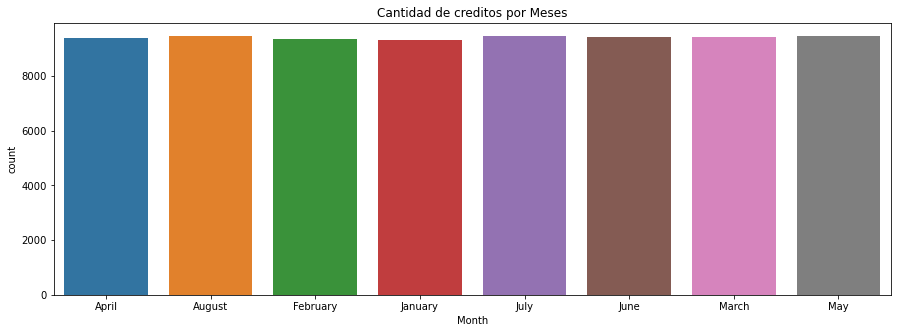

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Cantidad de creditos por Meses');
sns.countplot(df_credit.Month);

Se observa que en todos los meses hay cantidades similares de registros. No hay presencia de valores extraños.

##### Occupation

In [ ]:
df_credit.groupby('Occupation')['Occupation'].count()

Occupation
Accountant       4702
Architect        4768
Developer        4647
Doctor           4707
Engineer         4759
Entrepreneur     4712
Journalist       4499
Lawyer           5058
Manager          4444
Mechanic         4822
Media_Manager    4602
Musician         4444
Scientist        4756
Teacher          4664
Writer           4497
_______          5252
Name: Occupation, dtype: int64

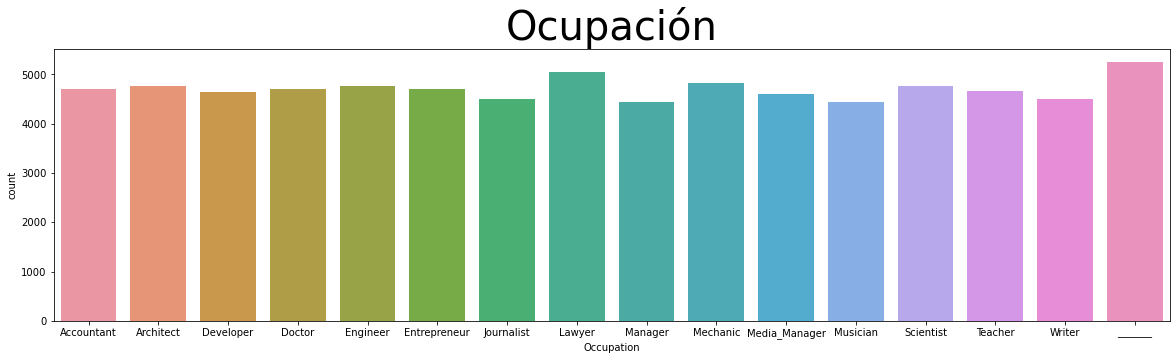

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.countplot(x='Occupation', data=df_credit);
plt.title('Ocupación', fontsize=40);

Es posible distinguir que la ocupación que mas resalta es Lawyer y a su vez tenemos varias ocupaciones no especificadas

###### Limpiamos valores

In [ ]:
# Pasamos a NaN los valores '_______' y posteriormente eliminamos todas las filas
df_credit['Occupation'].replace({'_______':np.nan},inplace=True)
df_credit.dropna(inplace = True)

In [ ]:
df_credit.groupby('Occupation')['Occupation'].count()

Occupation
Accountant       4702
Architect        4768
Developer        4647
Doctor           4707
Engineer         4759
Entrepreneur     4712
Journalist       4499
Lawyer           5058
Manager          4444
Mechanic         4822
Media_Manager    4602
Musician         4444
Scientist        4756
Teacher          4664
Writer           4497
Name: Occupation, dtype: int64

In [ ]:
df_credit.shape

(70081, 29)

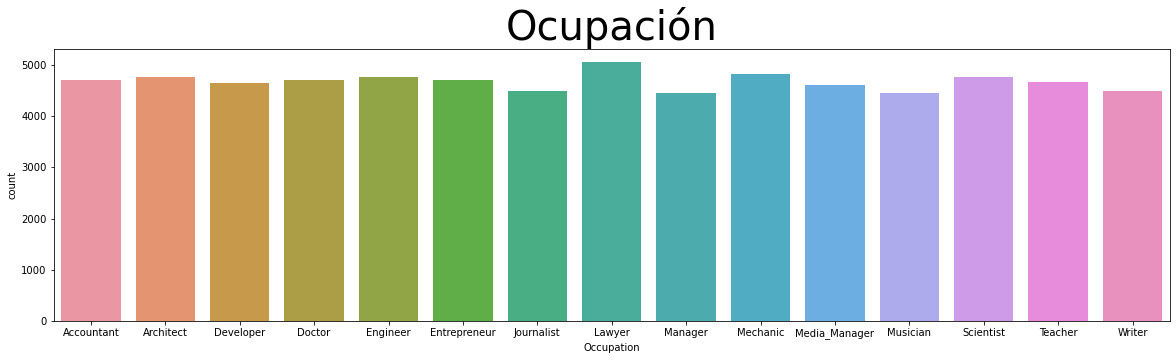

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
sns.countplot(x='Occupation', data=df_credit);
plt.title('Ocupación', fontsize=40);

##### Credit_Mix

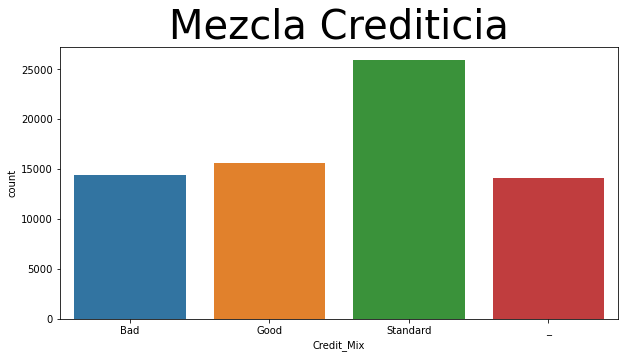

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.countplot(x='Credit_Mix', data=df_credit);
plt.title('Mezcla Crediticia', fontsize=40);

La mezcla crediticia más frecuente es tipo Standard

Limpieza de Datos

In [ ]:
# Pasamos a NaN los valores '_' y posteriormente eliminamos todas las filas
df_credit['Credit_Mix'].replace({'_':np.nan},inplace=True)
df_credit.dropna(inplace = True) # Eliminamos NaN

In [ ]:
df_credit.shape

(55990, 29)

##### Payment_of_Min_Amount

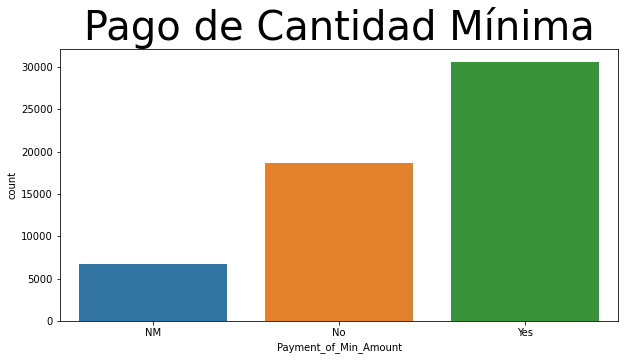

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.countplot(x='Payment_of_Min_Amount', data=df_credit);
plt.title('Pago de Cantidad Mínima', fontsize=40);

Limplieza de Datos

In [ ]:
df_credit.groupby('Payment_of_Min_Amount')['Payment_of_Min_Amount'].count()

# Revisamos la cantidad de registros NM para posteriormente eliminarlos del dataframe

Payment_of_Min_Amount
NM      6765
No     18644
Yes    30581
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
# Pasamos a NaN los valores 'NM' y posteriormente eliminamos todas las filas
df_credit['Payment_of_Min_Amount'].replace({'NM':np.nan},inplace=True)
df_credit.dropna(inplace = True)# Eliminamos NaN

In [ ]:
df_credit.shape

(49225, 29)

##### Payment_Behaviour

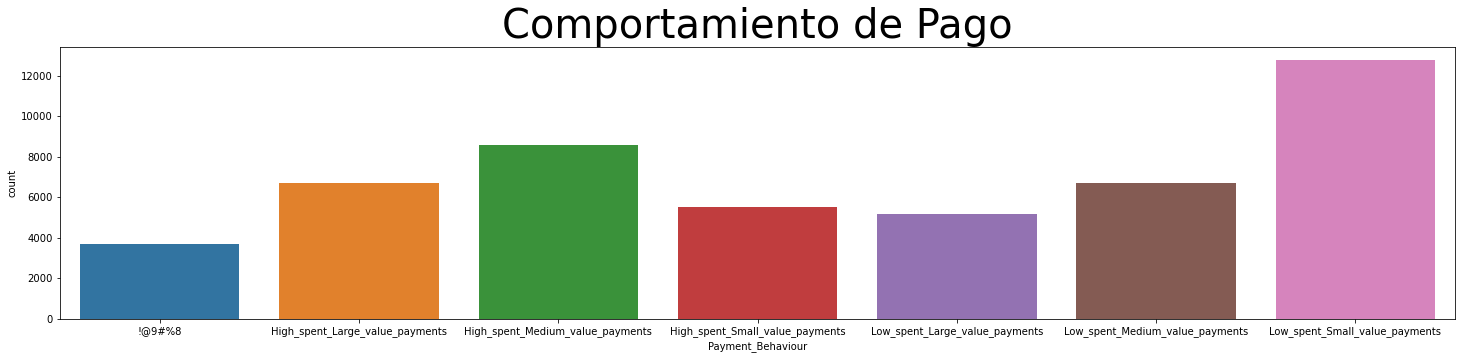

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.countplot(x='Payment_Behaviour', data=df_credit);
plt.title('Comportamiento de Pago', fontsize=40);

En el gráfico vemos como más frecuente a las personas con bajos gastos y pequeños pagos. 
Tambien se observa que tenemos con menor frecuencia personas con gastos altos y pequeños pagos.

Limplieza de Datos

In [ ]:
df_credit.groupby('Payment_Behaviour')['Payment_Behaviour'].count()

Payment_Behaviour
!@9#%8                               3708
High_spent_Large_value_payments      6702
High_spent_Medium_value_payments     8572
High_spent_Small_value_payments      5531
Low_spent_Large_value_payments       5203
Low_spent_Medium_value_payments      6731
Low_spent_Small_value_payments      12778
Name: Payment_Behaviour, dtype: int64

In [ ]:
# Pasamos a NaN los valores '!@9#%8' y posteriormente eliminamos todas las filas
df_credit['Payment_Behaviour'].replace({'!@9#%8':np.nan},inplace=True)
df_credit.dropna(inplace = True)

In [ ]:
df_credit.shape

(45517, 29)

##### Credit_Score

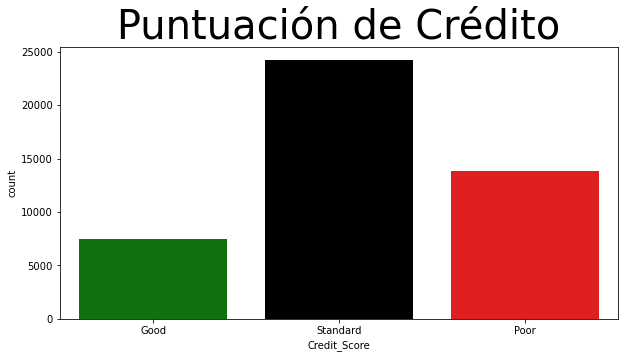

In [ ]:
paleta = {'Good': 'green', 'Standard': 'black', 'Poor': 'red'}
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.countplot(x='Credit_Score', data=df_credit, palette=paleta);
plt.title('Puntuación de Crédito', fontsize=40);

En líneas generales, la mayoría de los créditos otorgados tienen una puntuacion de 1, es decir regular mientras que el de menor frecuencia es de puntuacion 2 es decir bueno

#### Variables Numericas

##### Colúmnas con variable Numericas del tipo Int y Float

In [ ]:
# Mostramos las colúmnas con tipo de datos int y float64
print(df_credit.columns[df_credit.dtypes == 'int64'], '\n' ,df_credit.columns[df_credit.dtypes == 'float64'])

Index(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Delay_from_due_date', 'Auto_Loan',
       'Credit_Builder_Loan', 'Personal_Loan', 'Home_Enquity_Loan',
       'Mortgage_Loan', 'Student_Loan', 'Debt_Consolidation_Loan',
       'Payday_Loan'],
      dtype='object') 
 Index(['Annual_Income', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')


##### Age

In [ ]:
df_credit['Age'].describe()

count    45517.000000
mean        34.110926
std          9.938630
min         18.000000
25%         26.000000
50%         34.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

Como se observa en la descripción de los datos, tenemos valores muy atipicos, por lo que haremos un boxplot para evaluar los datos.

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

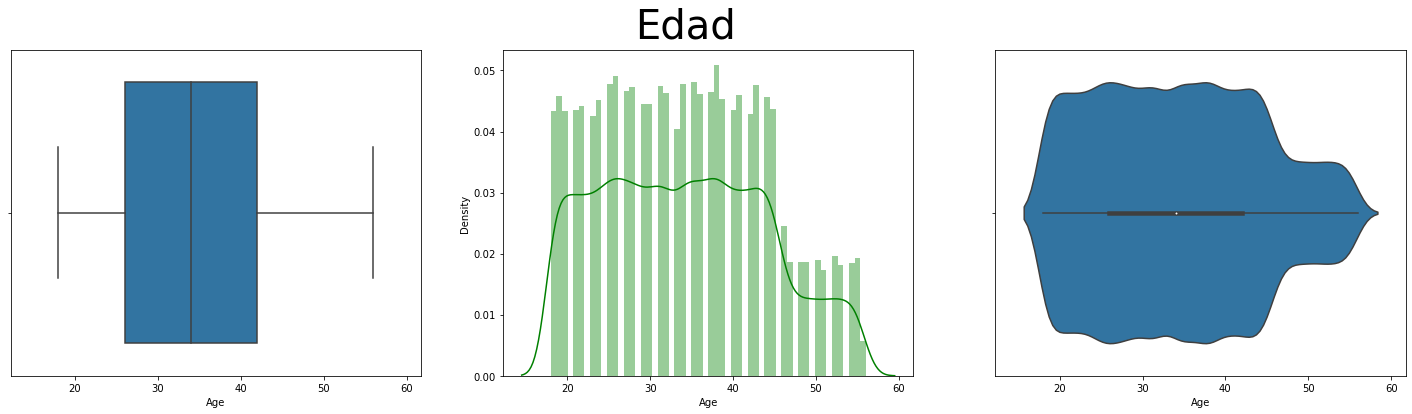

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Edad', fontsize=40);

sns.boxplot(df_credit.Age,ax = axes[0]);
sns.distplot(df_credit.Age,bins=56, color='g',ax = axes[1]);
sns.violinplot(df_credit.Age,orient='v');

En las gráficas presentes podemos observar que no tenemos presencia de outliers y que la distribución de datos es bastante amplia.
Tenemos una mayor concentracion de edades entre los 18 y 45 años

##### Annual_Income

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Annual_Income'>

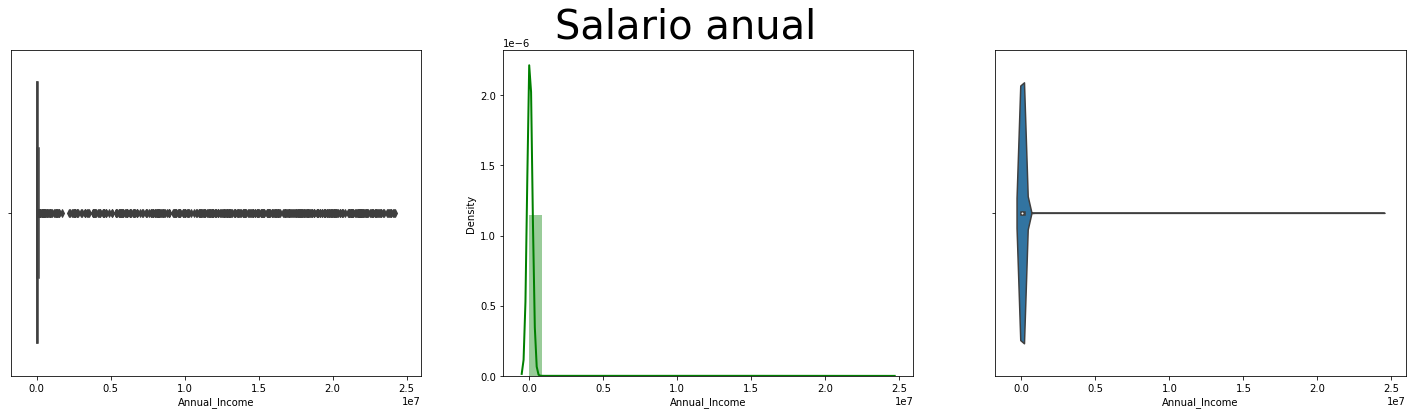

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Salario anual', fontsize=40)

sns.boxplot(df_credit.Annual_Income, ax = axes[0])
sns.distplot(df_credit.Annual_Income, bins=28,kde_kws={"lw": 2}, color='g',ax = axes[1])
sns.violinplot(df_credit.Annual_Income, orient='v')

Tratamos Outliers

In [ ]:
df_credit = no_outliers(df_credit, 'Annual_Income')

Volvemos a Graficar

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Annual_Income'>

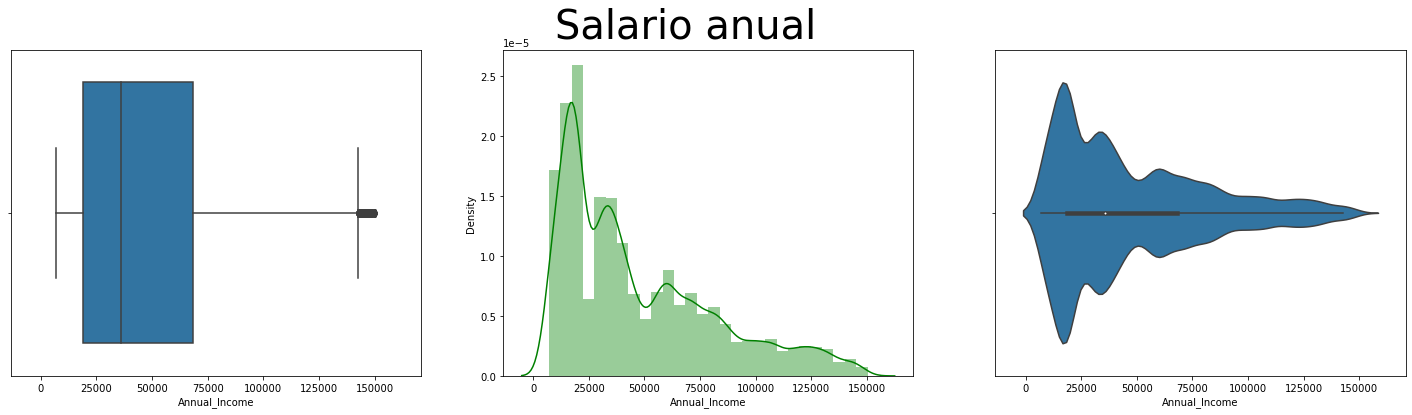

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Salario anual', fontsize=40)

sns.boxplot(df_credit.Annual_Income, ax = axes[0])
sns.distplot(df_credit.Annual_Income, bins=28, color='g', ax = axes[1])
sns.violinplot(df_credit.Annual_Income, orient='v')

In [ ]:
df_credit['Annual_Income'].describe()

count     44230.000000
mean      47224.965855
std       34454.692871
min        7006.035000
25%       18750.540000
50%       35843.920000
75%       68299.040000
max      150339.960000
Name: Annual_Income, dtype: float64

##### Interest_Rate

In [ ]:
df_credit.Interest_Rate.describe()

count    44230.000000
mean        77.619421
std        486.607132
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Interest_Rate'>

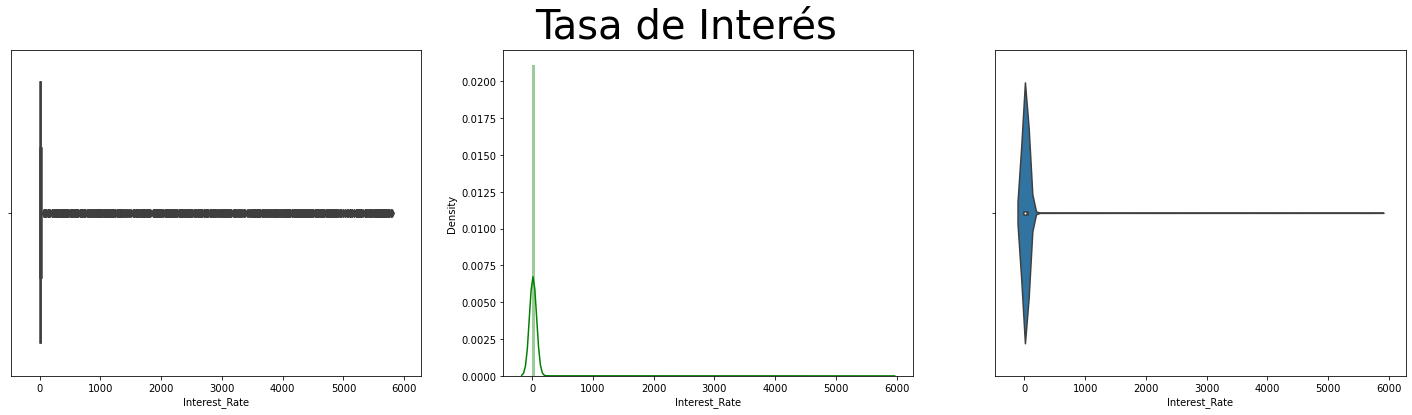

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Tasa de Interés', fontsize=40)

sns.boxplot(df_credit.Interest_Rate,ax = axes[0])
sns.distplot(df_credit.Interest_Rate,bins=125, color='g',ax = axes[1])
sns.violinplot(df_credit.Interest_Rate,orient='v')

Este es un caso tenemos gran asimetría en las gráficas, muchos valores outliers por lo que nos dá un grán valor de dispersión, a su vez vemos tazas muy superiores al 100% y esto resulta un valor muy atipico 

Tratamos Outliers

In [ ]:
df_credit = no_outliers(df_credit, 'Interest_Rate')

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Interest_Rate'>

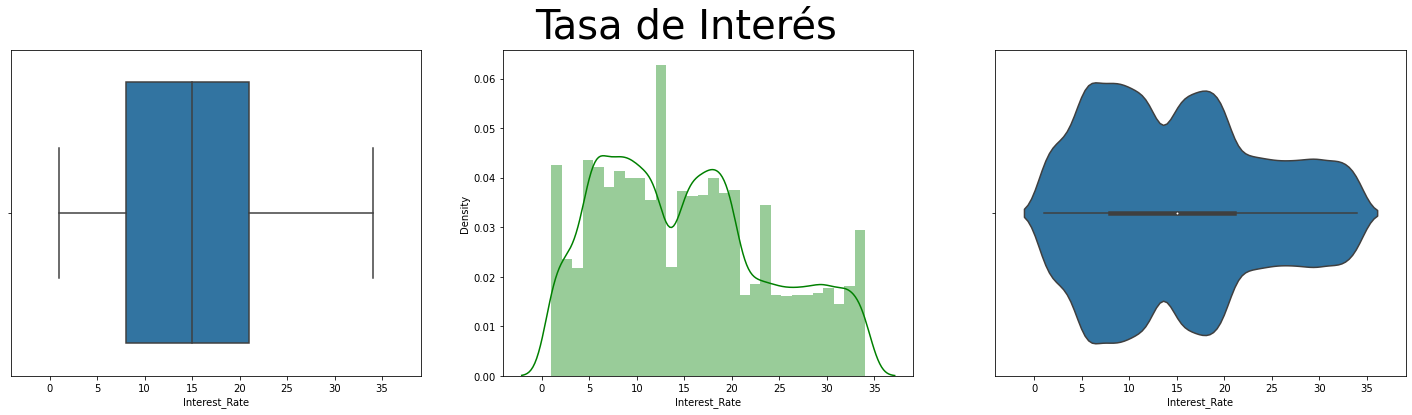

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Tasa de Interés', fontsize=40)

sns.boxplot(df_credit.Interest_Rate,ax = axes[0])
sns.distplot(df_credit.Interest_Rate,bins=30, color='g',ax = axes[1])
sns.violinplot(df_credit.Interest_Rate,orient='v')

In [ ]:
df_credit['Interest_Rate'].describe()

count    43269.000000
mean        15.153597
std          8.815788
min          1.000000
25%          8.000000
50%         15.000000
75%         21.000000
max         34.000000
Name: Interest_Rate, dtype: float64

##### Delay_from_due_date

In [ ]:
df_credit['Delay_from_due_date'].describe()

count    43269.000000
mean        22.024267
std         15.044807
min          0.000000
25%         11.000000
50%         19.000000
75%         29.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Delay_from_due_date'>

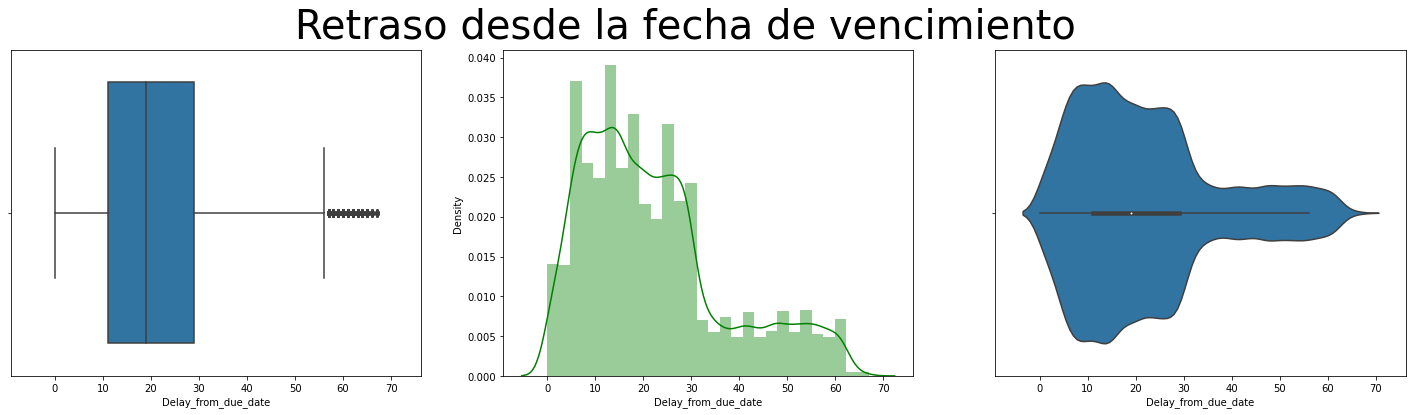

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Retraso desde la fecha de vencimiento', fontsize=40)

sns.boxplot(df_credit.Delay_from_due_date, ax = axes[0])
sns.distplot(df_credit.Delay_from_due_date, bins=28, color='g', ax = axes[1])
sns.violinplot(df_credit.Delay_from_due_date, orient='v')

##### Num_Credit_Card

In [ ]:
df_credit['Num_Credit_Card'].describe()

count    43269.000000
mean        22.319166
std        127.589707
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1497.000000
Name: Num_Credit_Card, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Num_Credit_Card'>

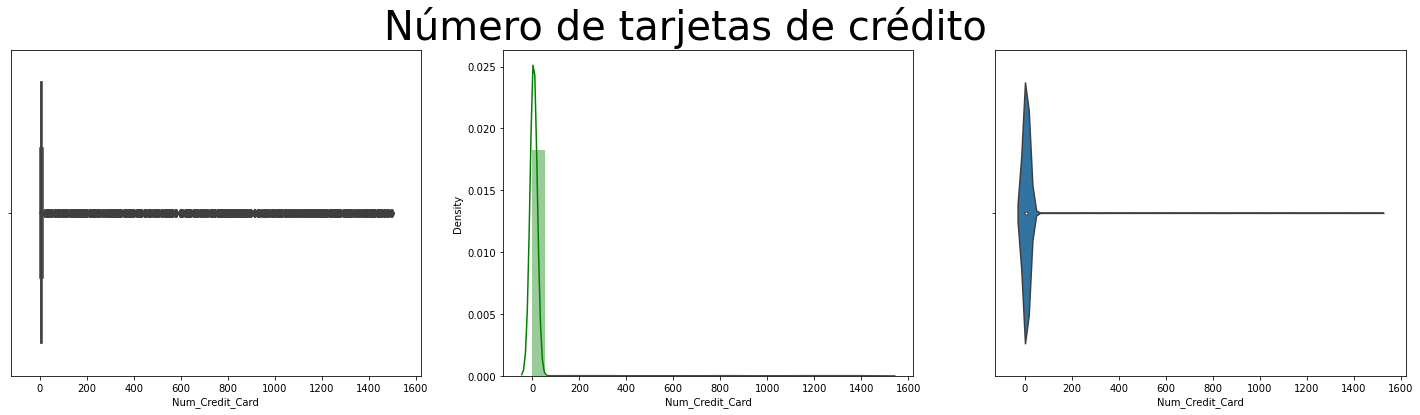

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Número de tarjetas de crédito', fontsize=40)

sns.boxplot(df_credit.Num_Credit_Card, ax = axes[0])
sns.distplot(df_credit.Num_Credit_Card, bins=28, color='g', ax = axes[1])
sns.violinplot(df_credit.Num_Credit_Card, orient='v')

Se puede observar en los gráficos que hay varios outliers. Se procede a eliminarlos.

In [ ]:
df_credit = no_outliers(df_credit, 'Num_Credit_Card')  # se hace aparte dado que son muchos outliers

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Num_Credit_Card'>

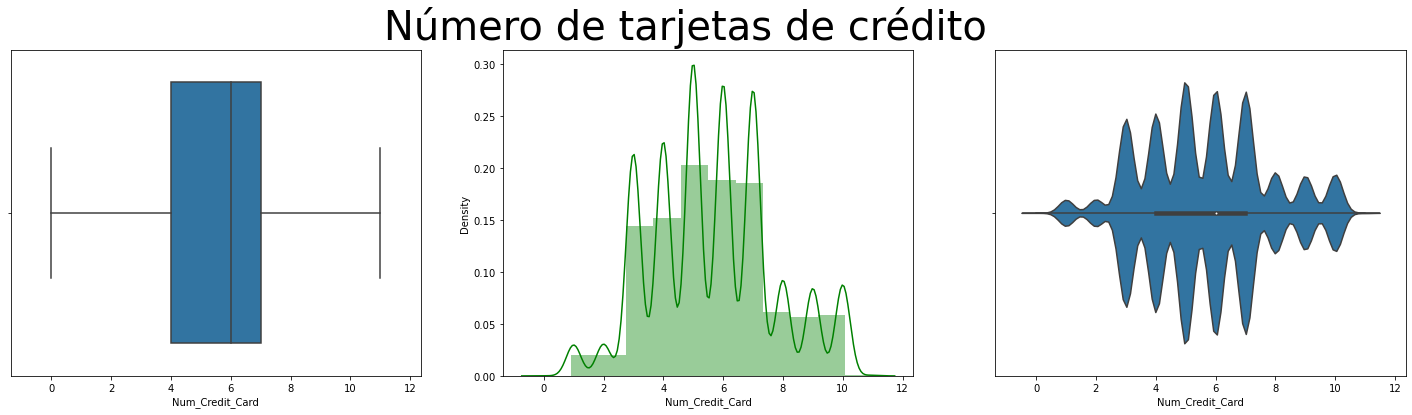

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Número de tarjetas de crédito', fontsize=40)

sns.boxplot(df_credit.Num_Credit_Card, ax = axes[0])
sns.distplot(df_credit.Num_Credit_Card, bins=12, color='g', ax = axes[1])
sns.violinplot(df_credit.Num_Credit_Card, orient='v')

In [ ]:
df_credit['Num_Credit_Card'].describe()

count    42295.000000
mean         5.629862
std          2.072037
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

##### Num_of_Delayed_Payment

In [ ]:
df_credit.Num_of_Delayed_Payment.describe()

count    42295.000000
mean        30.662584
std        221.512685
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

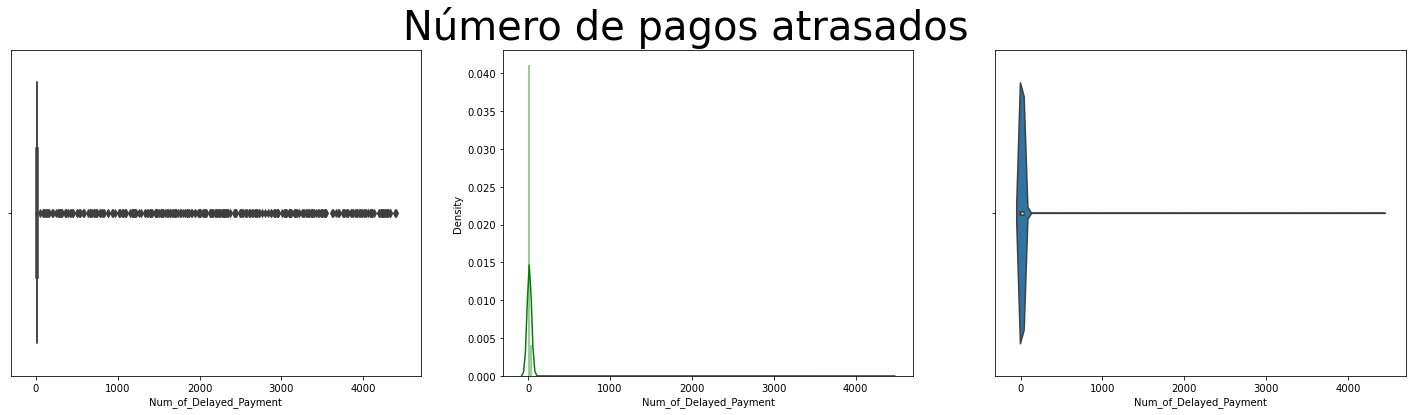

In [ ]:
from ctypes import alignment
figure, ax = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Número de pagos atrasados',fontsize=40) # Agrega un título general para todas las gráficas

sns.boxplot(df_credit.Num_of_Delayed_Payment, ax = ax[0])
sns.distplot(df_credit.Num_of_Delayed_Payment, bins=200, color='g',ax = ax[1])
sns.violinplot(df_credit.Num_of_Delayed_Payment,orient='v')

Observamos una gran dispersión de datos con gran cantidad de valores outliers

Tratamos Outliers

In [ ]:
df_credit = no_outliers(df_credit, 'Num_of_Delayed_Payment')

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

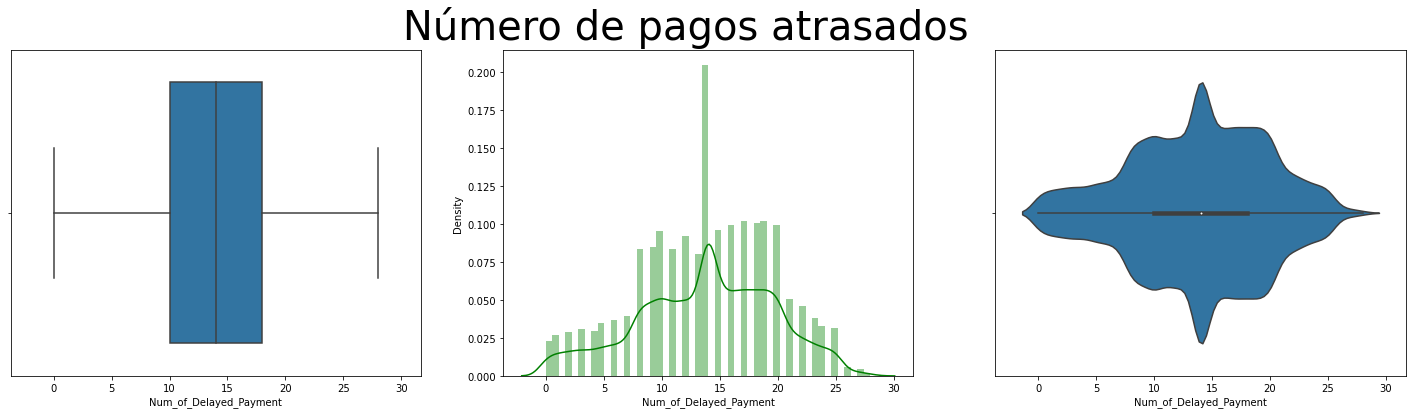

In [ ]:
from ctypes import alignment
figure, ax = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Número de pagos atrasados',fontsize=40) # Agrega un título general para todas las gráficas

sns.boxplot(df_credit.Num_of_Delayed_Payment, ax = ax[0])
sns.distplot(df_credit.Num_of_Delayed_Payment, bins=50, color='g',ax = ax[1])
sns.violinplot(df_credit.Num_of_Delayed_Payment,orient='v')

In [ ]:
df_credit['Num_of_Delayed_Payment'].describe()

count    41979.000000
mean        13.797947
std          5.877492
min          0.000000
25%         10.000000
50%         14.000000
75%         18.000000
max         28.000000
Name: Num_of_Delayed_Payment, dtype: float64

##### Num_Credit_Inquiries

In [ ]:
df_credit.Num_Credit_Inquiries.describe()

count    41979.000000
mean        27.915434
std        193.930468
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

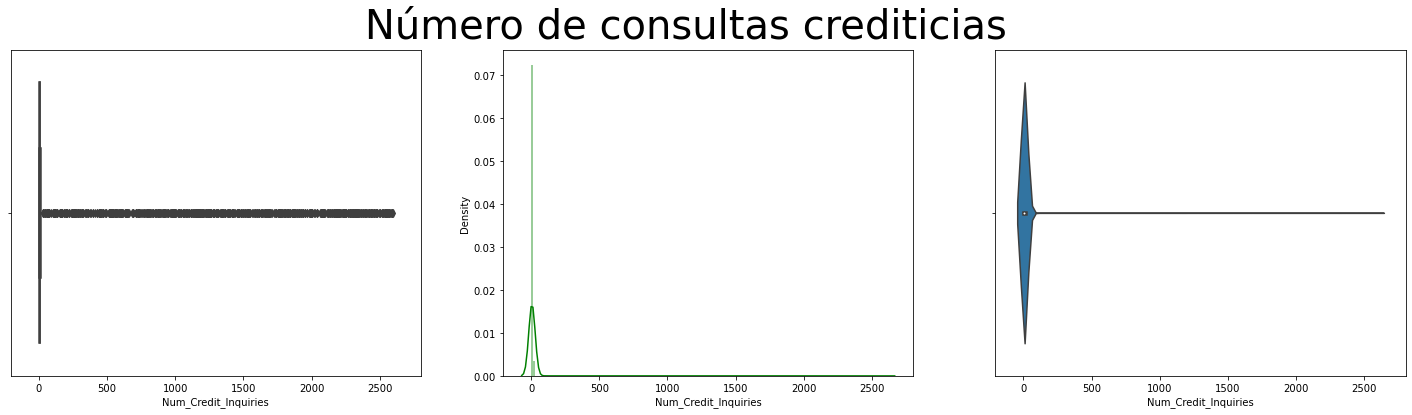

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Número de consultas crediticias', fontsize=40)

sns.boxplot(df_credit.Num_Credit_Inquiries,ax = axes[0])
sns.distplot(df_credit.Num_Credit_Inquiries,bins=200, color='g',ax = axes[1])
sns.violinplot(df_credit.Num_Credit_Inquiries,orient='v')

Tratamos Outliers

In [ ]:
df_credit = no_outliers(df_credit, 'Num_Credit_Inquiries')

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Num_Credit_Inquiries'>

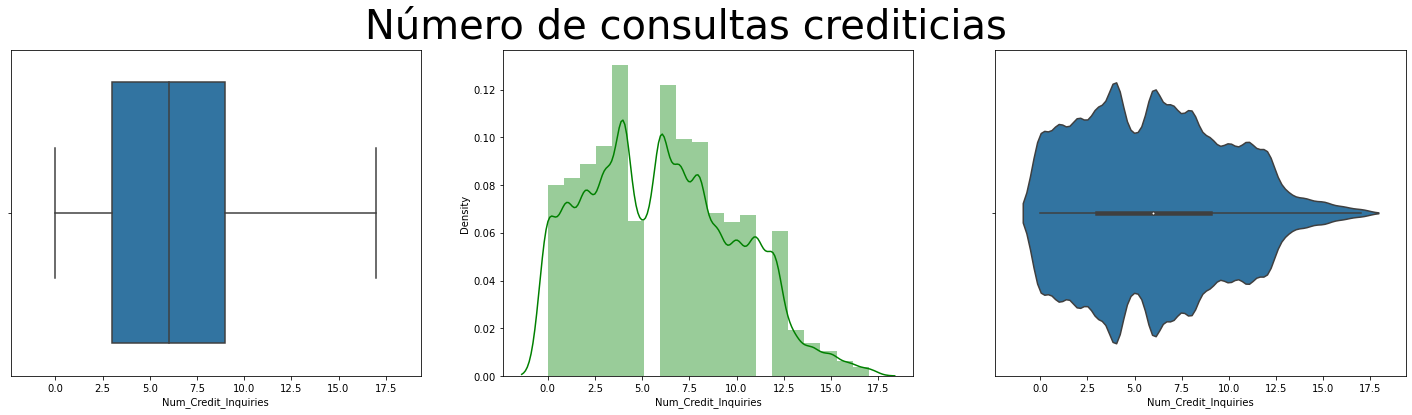

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Número de consultas crediticias', fontsize=40)

sns.boxplot(df_credit.Num_Credit_Inquiries,ax = axes[0])
sns.distplot(df_credit.Num_Credit_Inquiries,bins=20, color='g',ax = axes[1])
sns.violinplot(df_credit.Num_Credit_Inquiries,orient='v')

In [ ]:
df_credit['Num_Credit_Card'].describe()

count    41282.000000
mean         5.630832
std          2.070731
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: Num_Credit_Card, dtype: float64

##### Outstanding_Debt

In [ ]:
df_credit.Outstanding_Debt.describe()

count    41282.000000
mean      1499.756468
std       1195.298493
min          0.230000
25%        589.887500
50%       1223.000000
75%       2118.030000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Outstanding_Debt'>

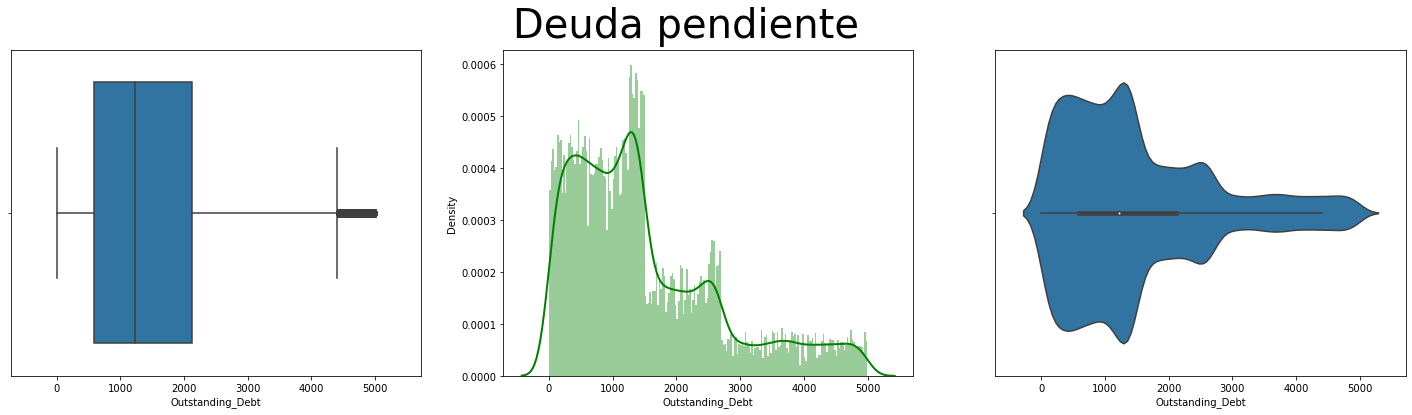

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Deuda pendiente', fontsize=40)

sns.boxplot(df_credit.Outstanding_Debt,ax = axes[0])
sns.distplot(df_credit.Outstanding_Debt,bins=200,kde_kws={"lw": 2}, color='g',ax = axes[1])
sns.violinplot(df_credit.Outstanding_Debt,orient='v')

En la gráfica es posible visualizar que la mediana de la deuda ronda el valor de 1100, tambien observamos presencia de outliers y una distribucion sesgada hacia la izquieda. 

En el gráfico de distribución podemos identificar 3 segmentaciones, la más frecuente entre 0 y 1500, luego constinuamos con una frecuencia intermedia entre los 1500 y 2700 y por útimo vemos, en menor frecuencia , desde los 2700 a los 5000

In [ ]:
df_credit = no_outliers(df_credit, 'Outstanding_Debt')

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Outstanding_Debt'>

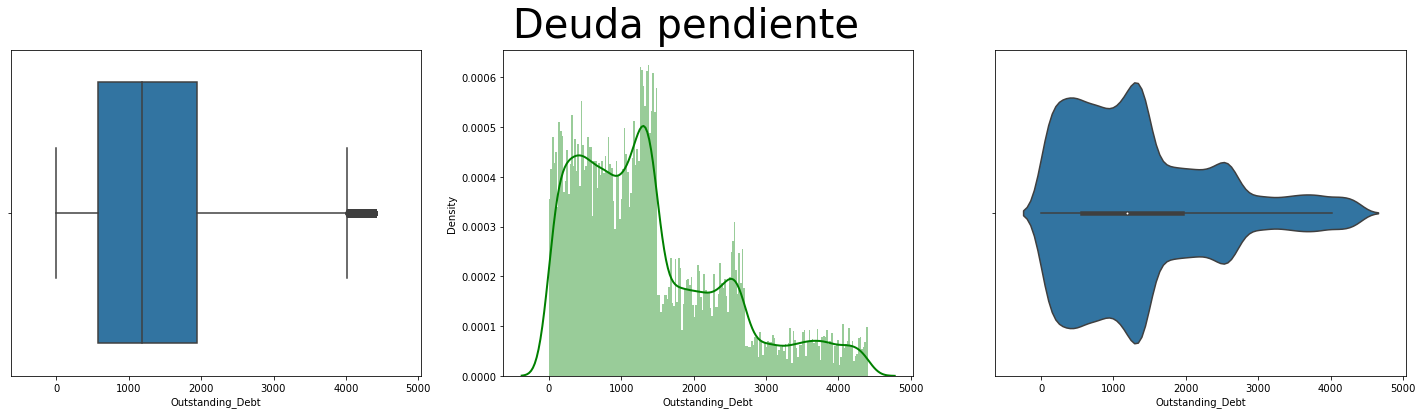

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Deuda pendiente', fontsize=40)

sns.boxplot(df_credit.Outstanding_Debt,ax = axes[0])
sns.distplot(df_credit.Outstanding_Debt,bins=200,kde_kws={"lw": 2}, color='g',ax = axes[1])
sns.violinplot(df_credit.Outstanding_Debt,orient='v')

In [ ]:
df_credit['Outstanding_Debt'].describe()

count    39781.000000
mean      1378.646403
std       1038.346059
min          0.230000
25%        567.530000
50%       1181.130000
75%       1948.990000
max       4405.990000
Name: Outstanding_Debt, dtype: float64

##### Credit_Utilization_Ratio

In [ ]:
df_credit.Credit_Utilization_Ratio

1        31.377862
2        24.797347
4        22.537593
5        23.933795
7        38.550848
           ...    
75320    24.713861
75323    25.123535
75324    37.140784
75326    29.135447
75331    33.638208
Name: Credit_Utilization_Ratio, Length: 39781, dtype: float64

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

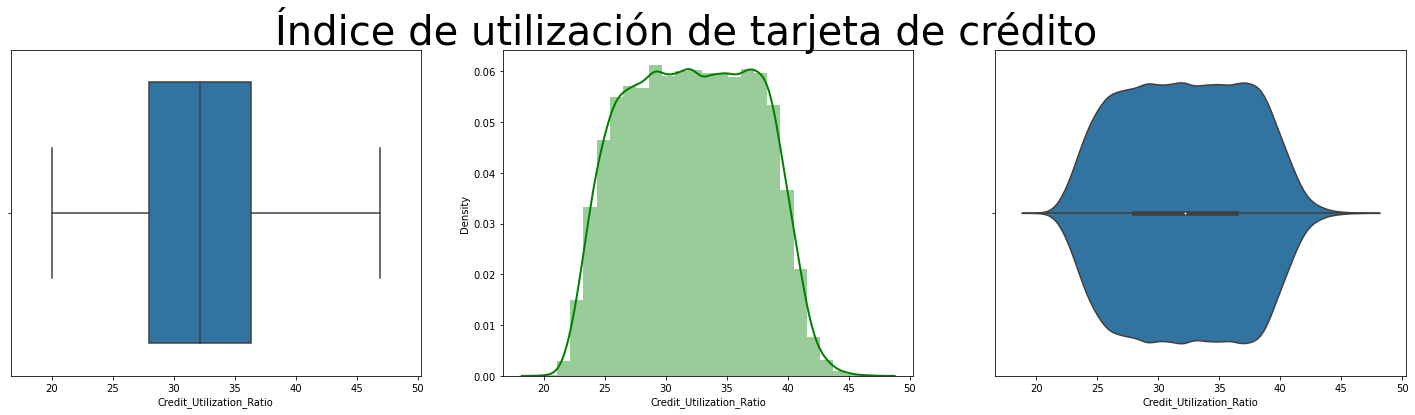

In [ ]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Índice de utilización de tarjeta de crédito', fontsize=40)

sns.boxplot(df_credit.Credit_Utilization_Ratio,ax = axes[0])
sns.distplot(df_credit.Credit_Utilization_Ratio,bins=25,kde_kws={"lw": 2}, color='g',ax = axes[1])
sns.violinplot(df_credit.Credit_Utilization_Ratio,orient='v')

En general vemos que la media de utilización de crédito disponible está en los 33%, y podemos observar que el porcentaje de utilización de los créditos se concentran entre los 25% y el 38%

##### Total_EMI_per_Month

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Total_EMI_per_month'>

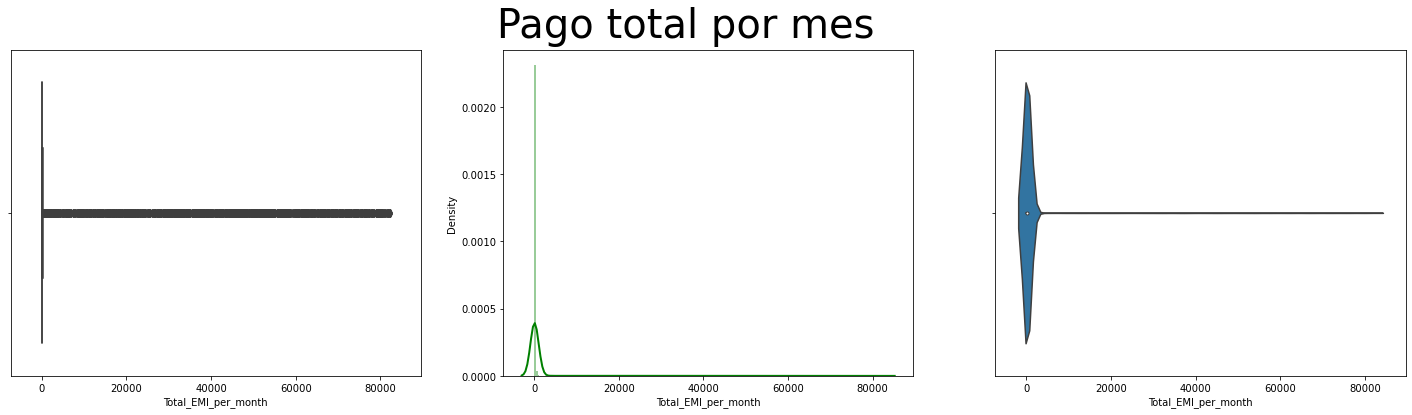

In [ ]:
figure, ax = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Pago total por mes', fontsize=40)

sns.boxplot(df_credit.Total_EMI_per_month,ax = ax[0])
sns.distplot(df_credit.Total_EMI_per_month,bins=200,kde_kws={"lw": 2}, color='g',ax = ax[1])
sns.violinplot(df_credit.Total_EMI_per_month,orient='v')

Tratamos Outliers

In [ ]:
df_credit = no_outliers(df_credit,'Total_EMI_per_month')

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

<AxesSubplot:xlabel='Total_EMI_per_month'>

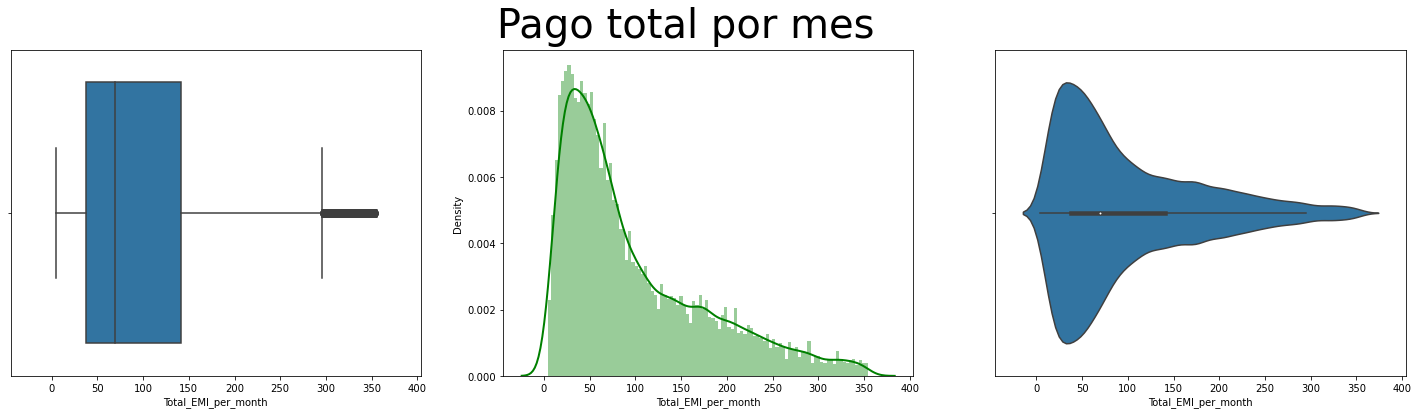

In [ ]:
figure, ax = plt.subplots(1, 3, sharex=True, figsize=(25,6))

plt.suptitle('Pago total por mes', fontsize=40)

sns.boxplot(df_credit.Total_EMI_per_month,ax = ax[0])
sns.distplot(df_credit.Total_EMI_per_month,bins=100,kde_kws={"lw": 2}, color='g',ax = ax[1])
sns.violinplot(df_credit.Total_EMI_per_month,orient='v')

In [ ]:
df_credit['Total_EMI_per_month'].describe()

count    37167.000000
mean        97.780449
std         79.080772
min          4.462837
25%         37.827914
50%         69.717948
75%        140.888960
max        354.647165
Name: Total_EMI_per_month, dtype: float64

In [ ]:
df_credit.head(15)

Month  Age    Occupation  Annual_Income  Num_Bank_Accounts  \
1      April   23     Scientist       19114.12                  3   
2        May   23     Scientist       19114.12                  3   
4       July   23     Scientist       19114.12                  3   
5     August   23     Scientist       19114.12                  3   
7   February   28       Teacher       34847.84                  2   
8      April   28       Teacher       34847.84                  2   
9        May   28       Teacher       34847.84                  2   
10      June   28       Teacher       34847.84                  2   
12    August   28       Teacher       34847.84                  2   
14  February   34      Engineer      143162.64                  1   
18      June   34      Engineer      143162.64                  1   
19      July   34      Engineer      143162.64                  1   
20    August   34      Engineer      143162.64                  1   
21   January   54  Entrepreneur       30689.89                  2   
22  February   54  Entrepreneur       30689.89                  2   

    Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
1                 4              3            4                    5   
2                 4              3            4                    6   
4                 4              3            4                    3   
5                 4              3            4                    3   
7                 4              6            1                    7   
8                 4              6            1                    3   
9                 4              6            1                    3   
10                4              6            1                    3   
12                4              6            1                    3   
14                5              8            3                   13   
18                5              8          967                    8   
19                5              8            3                    8   
20                5              8            3                    8   
21                5              4            1                    0   
22                5              4            1                    5   

    Num_of_Delayed_Payment  ...  Monthly_Balance  Credit_Score Auto_Loan  \
1                      4.0  ...       223.451310          Good         1   
2                     14.0  ...       341.489231          Good         1   
4                      8.0  ...       244.565317          Good         1   
5                      6.0  ...       358.124168      Standard         1   
7                      1.0  ...       484.591214          Good         0   
8                      3.0  ...       465.676224          Good         0   
9                      1.0  ...       444.867032          Good         0   
10                     0.0  ...       481.505262          Good         0   
12                     4.0  ...       356.078109          Good         0   
14                     6.0  ...       998.869297          Good         1   
18                     6.0  ...       963.921581          Good         1   
19                     6.0  ...       968.555517      Standard         1   
20                     6.0  ...       895.494583      Standard         1   
21                     6.0  ...       433.604773      Standard         0   
22                     3.0  ...       409.951812      Standard         0   

    Credit_Builder_Loan  Personal_Loan Home_Enquity_Loan  Mortgage_Loan  \
1                     1              1                 1              0   
2                     1              1                 1              0   
4                     1              1                 1              0   
5                     1              1                 1              0   
7                     1              0                 0              0   
8                     1              0                 0              0   
9      

## Análisis bivariado

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37167 entries, 1 to 75331
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Month                     37167 non-null  category
 1   Age                       37167 non-null  int64   
 2   Occupation                37167 non-null  category
 3   Annual_Income             37167 non-null  float64 
 4   Num_Bank_Accounts         37167 non-null  int64   
 5   Num_Credit_Card           37167 non-null  int64   
 6   Interest_Rate             37167 non-null  int64   
 7   Num_of_Loan               37167 non-null  int64   
 8   Delay_from_due_date       37167 non-null  int64   
 9   Num_of_Delayed_Payment    37167 non-null  float64 
 10  Changed_Credit_Limit      37167 non-null  float64 
 11  Num_Credit_Inquiries      37167 non-null  float64 
 12  Credit_Mix                37167 non-null  category
 13  Outstanding_Debt          37167 non-null  floa

Se hace la matriz de correlaciones para las variables numéricas (no categóricas y no dummies)

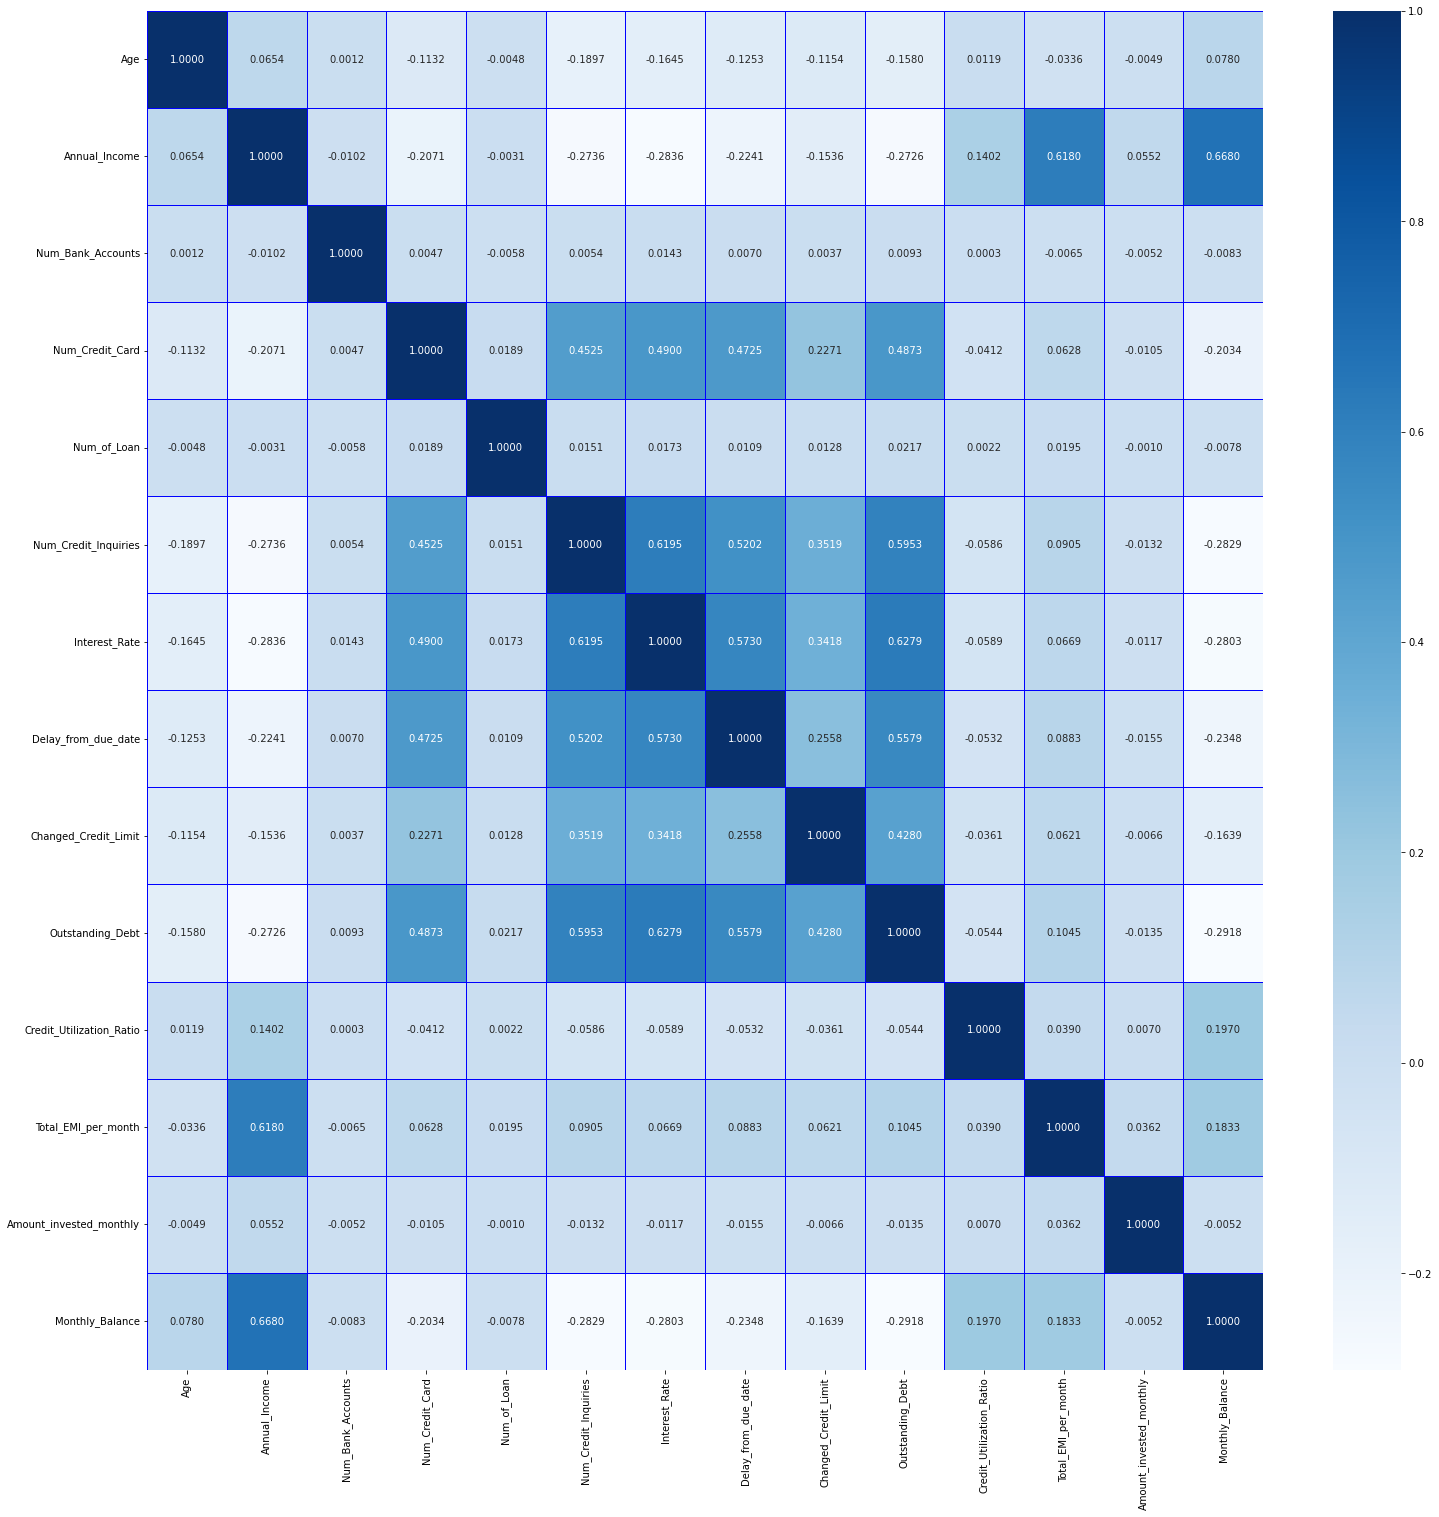

In [ ]:
df_credit_corr = df_credit[['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Interest_Rate', 'Delay_from_due_date', 'Payment_of_Min_Amount', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']]

plt.subplots(nrows=1,ncols=1,figsize=(25,25))
sns.heatmap(df_credit_corr.corr(), annot=True, cmap= 'Blues',linewidths = 0.5,linecolor='b',fmt='0.4f');

En la matriz de correlación, podemos observar claramente las variables con mayor correlación, por lo que pasaremos a realizar las gráficas del tipo scatterplot con las que más correlación tengan.
Previamente se realizará un pairplot con el fin de visualizar todas las variables en cuestión.

Vemos claramente las siguietes correlaciones:

*   Annual Income - Monthly Balance: 66.84%

*   Annual Income - Total_EMI_per_month: 61.85%

*   Num_Credit_Inquiries - Interest_Rate: 61.93%

*   Num_Credit_Inquiries - Delay_from_due_date: 52.02%

*   Num_Credit_Inquiries - Outstanding_Debt: 59.61%

*   Interest_Rate - Delay_from_due_date: 57.31%

*   Interest_Rate - Outstanding_Debt: 62.74%

*   Delay_from_due_date - Outstanding_Debt: 55.80%

*   Changed_Credit_Limit  - Outstanding_Debt: 42.15%

En el siguiente Pairplot vemos un scatterplot con todas las conbinaciones de variable numéricas que existen.

In [ ]:
sns.pairplot(data=df_credit_corr, height=5);

Output hidden; open in https://colab.research.google.com to view.

Creamos ScatterPlot con todas las variables que tenemos al menos un 50% de correlación

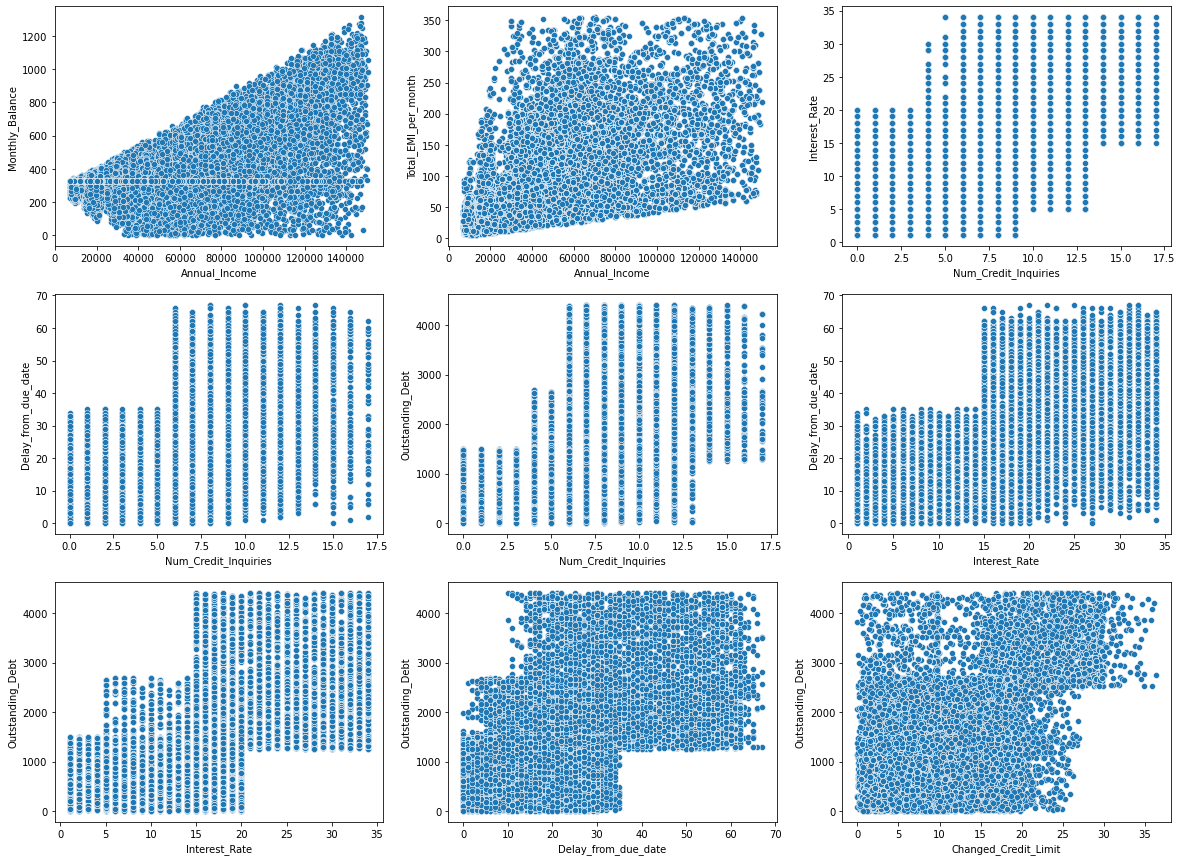

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15)) 
sns.scatterplot(x = df_credit['Annual_Income'], y = df_credit['Monthly_Balance'], ax= ax[0, 0]);
sns.scatterplot(x = df_credit['Annual_Income'], y = df_credit['Total_EMI_per_month'], ax= ax[0, 1]);
sns.scatterplot(x = df_credit['Num_Credit_Inquiries'], y = df_credit['Interest_Rate'], ax= ax[0, 2]);
sns.scatterplot(x = df_credit['Num_Credit_Inquiries'], y = df_credit['Delay_from_due_date'], ax= ax[1, 0]);
sns.scatterplot(x = df_credit['Num_Credit_Inquiries'], y = df_credit['Outstanding_Debt'], ax= ax[1, 1]);
sns.scatterplot(x = df_credit['Interest_Rate'], y = df_credit['Delay_from_due_date'], ax= ax[1, 2]);
sns.scatterplot(x = df_credit['Interest_Rate'], y = df_credit['Outstanding_Debt'], ax= ax[2, 0]);
sns.scatterplot(x = df_credit['Delay_from_due_date'], y = df_credit['Outstanding_Debt'], ax= ax[2, 1]);
sns.scatterplot(x = df_credit['Changed_Credit_Limit'], y = df_credit['Outstanding_Debt'], ax= ax[2, 2]);

plt.show()

Se puede observar que hay una especie de tendencia creciente en todos los gráficos.

### Preguntas

In [ ]:
paleta = {'Good': 'green', 'Standard': 'black', 'Poor': 'red'}

**1. ¿Cómo es el riesgo crediticio según la edad?**

In [ ]:
df_age_score = df_credit.groupby("Credit_Score")['Age'].mean().sort_values(ascending = False)
df_age_score.head

<bound method NDFrame.head of Credit_Score
Good        36.534056
Standard    34.481489
Poor        32.681883
Name: Age, dtype: float64>

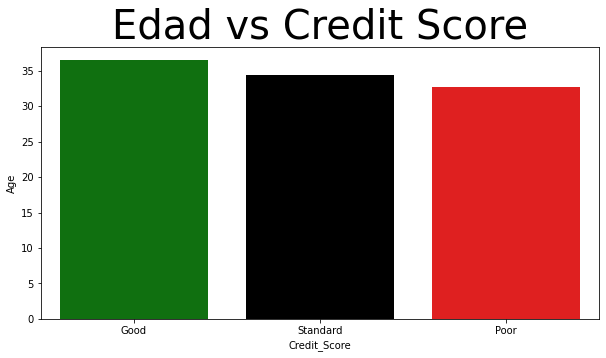

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.barplot(x = df_age_score.index, y = df_age_score, palette=paleta);
plt.title('Edad vs Credit Score', fontsize=40);

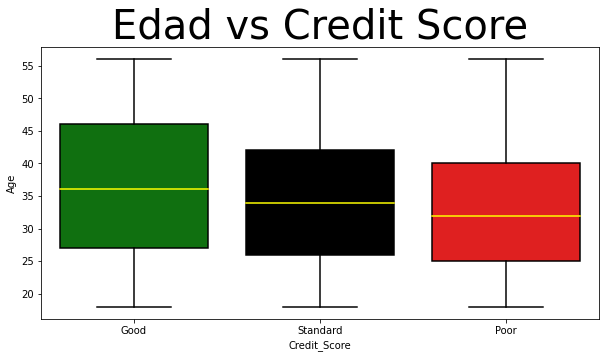

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.boxplot(x = 'Credit_Score', y = 'Age', data = df_credit, palette=paleta, medianprops={"color": "yellow"});
plt.title('Edad vs Credit Score', fontsize=40);

Se observa que la media y la mediana de edad son mayores para personas con un credit score bueno (36.50) en comparación con un credit score malo (32.68). Además, se observa que la mitad de los datos para Good se encuentra en un rango de edad mayor que el resto. Sin embargo, la diferencia no es significativa.

**2. ¿Cómo es el credit score en términos del ingreso anual?**

In [ ]:
income_score = df_credit.groupby("Credit_Score")['Annual_Income'].mean().sort_values(ascending = False)
income_score.head

<bound method NDFrame.head of Credit_Score
Good        56942.149429
Standard    47595.435964
Poor        38011.870064
Name: Annual_Income, dtype: float64>

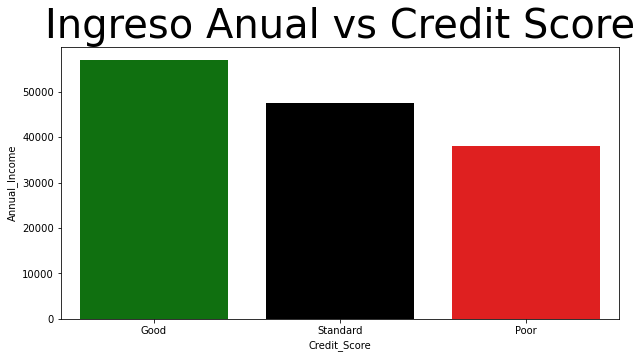

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.barplot(x = income_score.index, y = income_score, palette=paleta);
plt.title('Ingreso Anual vs Credit Score', fontsize=40);

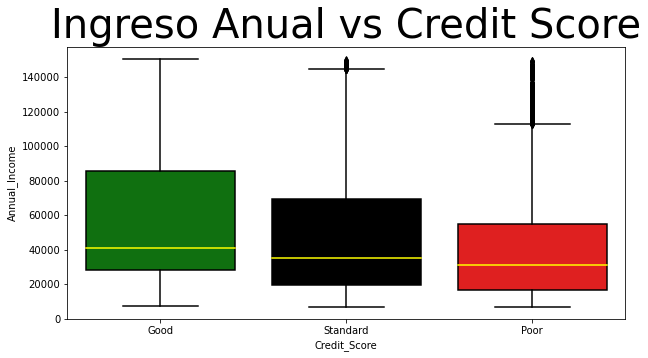

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.boxplot(x = 'Credit_Score', y = 'Annual_Income', data = df_credit, palette=paleta, medianprops={"color": "yellow"});
plt.title('Ingreso Anual vs Credit Score', fontsize=40);

Se observa que aquellas personas con salarios más altos suelen tener menos riesgo de impago. Además, se observa una asimetría creciente hacia Good. Nuevamente, la diferencia no es significativa.

**3. ¿Cómo afecta la tasa de interés al riesgo de impago?**

In [ ]:
interest_rate_score = df_credit.groupby("Credit_Score")['Interest_Rate'].mean().sort_values()
interest_rate_score.head

<bound method NDFrame.head of Credit_Score
Good         7.492037
Standard    13.718301
Poor        20.426840
Name: Interest_Rate, dtype: float64>

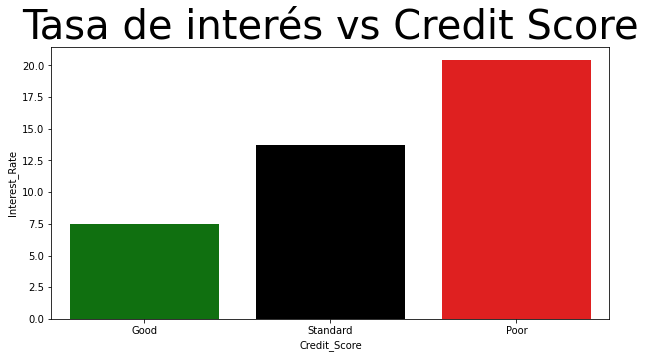

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.barplot(x = interest_rate_score.index, y = interest_rate_score, palette=paleta);
plt.title('Tasa de interés vs Credit Score', fontsize=40);

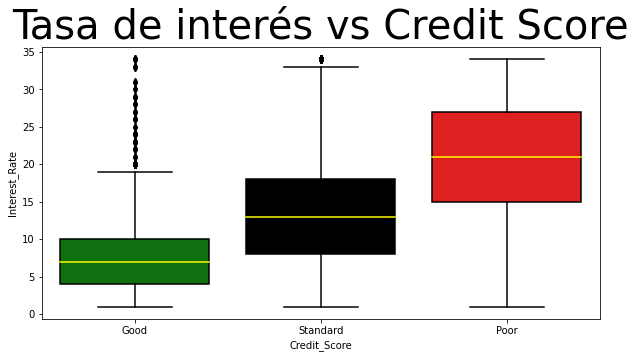

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.boxplot(x = 'Credit_Score', y = 'Interest_Rate', data = df_credit, palette=paleta, medianprops={"color": "yellow"});
plt.title('Tasa de interés vs Credit Score', fontsize=40);

Se puede observar una diferencia importante entre las tasas de interés para los tres grupos. A medida que la tasa de interés aumenta, el riesgo de incumplimiento de pago también aumenta.

**4. ¿Cómo se relaciona la mezcla crediticia con el credit score?**

In [ ]:
occupation_score = df_credit.groupby("Credit_Mix")['Credit_Score'].value_counts()
occupation_score

Credit_Mix  Credit_Score
Bad         Poor             5330
            Standard         3106
            Good               91
Good        Good             4986
            Standard         3607
            Poor             1643
Standard    Standard        13248
            Poor             4331
            Good              825
Name: Credit_Score, dtype: int64

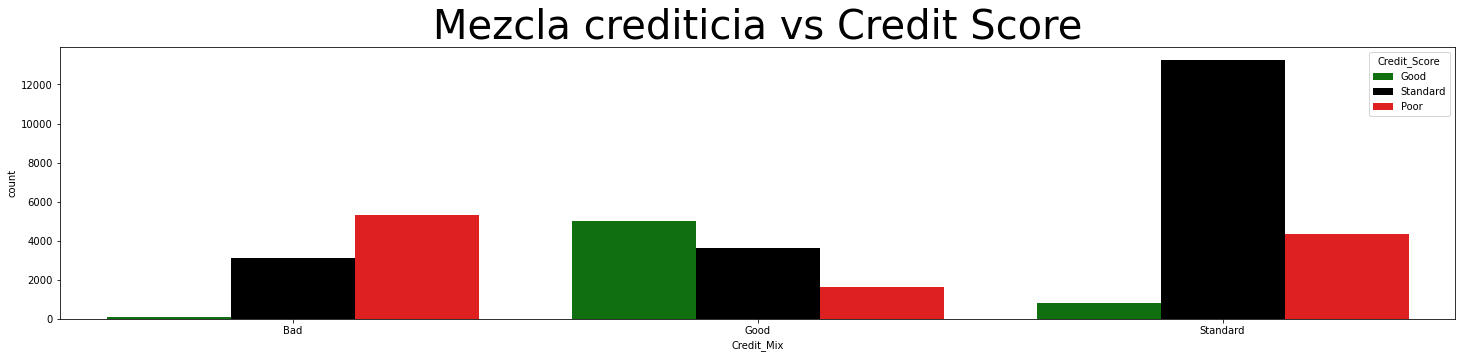

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(25,5))
sns.countplot(x = df_credit['Credit_Mix'], hue = df_credit['Credit_Score'], palette=paleta);
plt.title('Mezcla crediticia vs Credit Score', fontsize=40);

Se observa que una mala mezcla crediticia implica un alto riesgo de impago (credit score poor alto), es decir, la cantidad de personas que pagan el crédito es casi nula. Esto es coherente dado que una mala mezcla crediticia indica que la persona presenta varias deudas o préstamos pendientes, lo cual dificulta obtener y pagar un nuevo crédito.

Por otro lado, una buena mezcla crediticia implica una mayor probabilidad de pagar el crédito.

**5. ¿Cómo se relaciona la tasa de interés con la mezcla crediticia?**

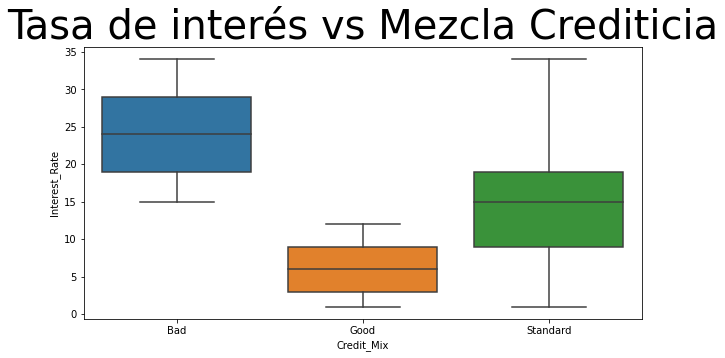

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.boxplot(x = 'Credit_Mix', y = 'Interest_Rate', data = df_credit);
plt.title('Tasa de interés vs Mezcla Crediticia', fontsize=40);

Se observa que aquellas personas con buena mezcla crediticia acceden a créditos con tasas de interés menores que las personas con mala mezcla creditica. La diferencia de la tasa de interés es significativa al comparar Bad con Good, mientras que una mezcla crediticia Standard presenta tasas de intereses variadas.

**6. ¿Cómo son los retrasos desde la fecha de vencimiento según el credit score?**

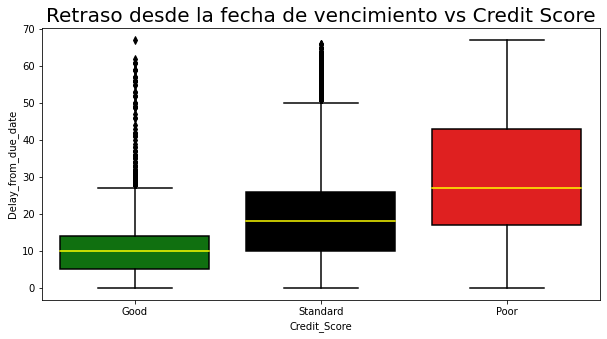

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.boxplot(x = 'Credit_Score', y = 'Delay_from_due_date', data = df_credit, palette=paleta, medianprops={"color": "yellow"});
plt.title('Retraso desde la fecha de vencimiento vs Credit Score', fontsize=20);

Se observa que las personas con un credit score malo tienden a tener retrasos mayores desde la fecha de vencimiento. Por otro lado, los que tienen un credit score bueno tienden a tener retrasos menores desde la fecha de vencimiento, con excepción de algunos valores outliers (p.ej. una persona que siempre paga a tiempo y justo un mes no pudo pagar).

## Análisis multivariado

In [ ]:
sns.pairplot(data=df_credit_corr,hue='Credit_Score', height=5, palette=['green','black','red']);

Output hidden; open in https://colab.research.google.com to view.

Para seguir con el análisis de las variables más correlacionadas, se realizan los mismos gráficos, pero separando según el credit score.

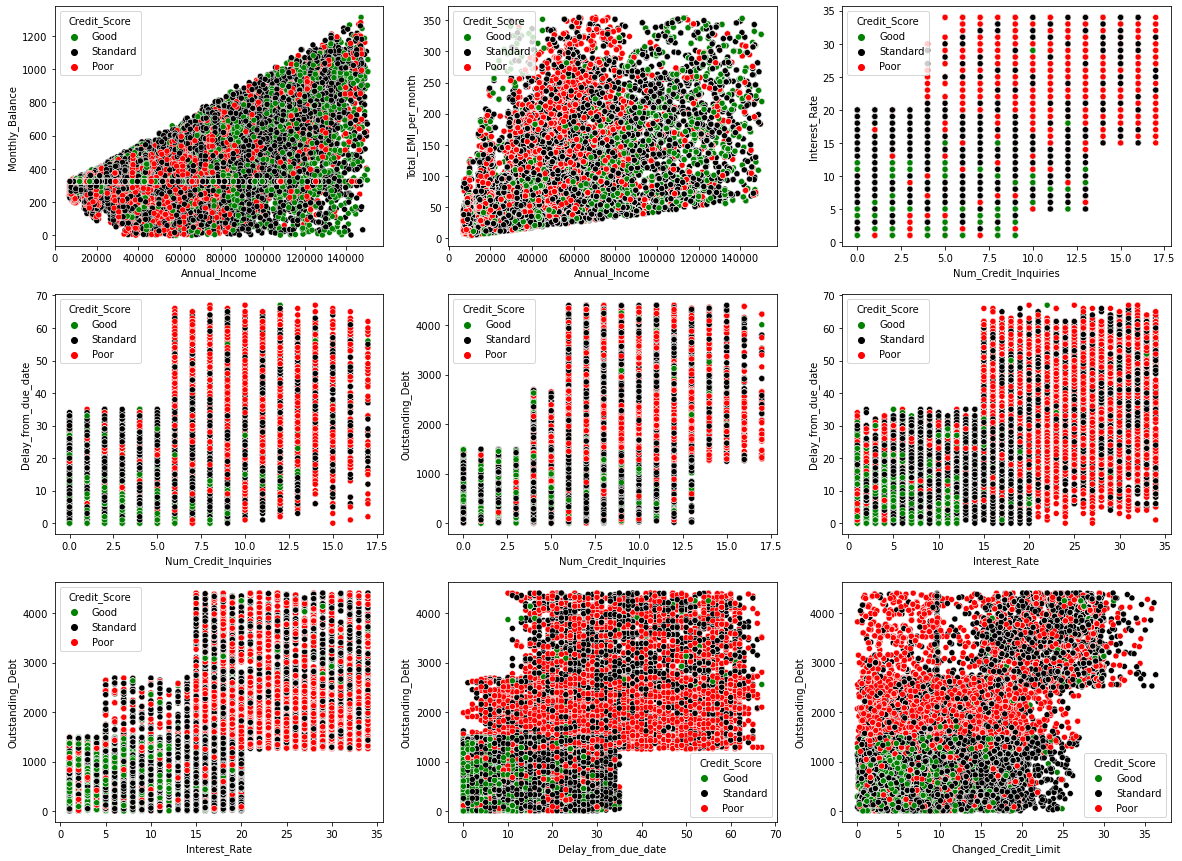

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 15)) 
sns.scatterplot(x = df_credit['Annual_Income'], y = df_credit['Monthly_Balance'], ax= ax[0, 0], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Annual_Income'], y = df_credit['Total_EMI_per_month'], ax= ax[0, 1], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Num_Credit_Inquiries'], y = df_credit['Interest_Rate'], ax= ax[0, 2], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Num_Credit_Inquiries'], y = df_credit['Delay_from_due_date'], ax= ax[1, 0], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Num_Credit_Inquiries'], y = df_credit['Outstanding_Debt'], ax= ax[1, 1], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Interest_Rate'], y = df_credit['Delay_from_due_date'], ax= ax[1, 2], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Interest_Rate'], y = df_credit['Outstanding_Debt'], ax= ax[2, 0], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Delay_from_due_date'], y = df_credit['Outstanding_Debt'], ax= ax[2, 1], hue = df_credit['Credit_Score'], palette=['green','black','red']);
sns.scatterplot(x = df_credit['Changed_Credit_Limit'], y = df_credit['Outstanding_Debt'], ax= ax[2, 2], hue = df_credit['Credit_Score'], palette=['green','black','red']);

plt.show()

Se puede observar en los gráficos que hay zonas bastante separadas entre registros "Good" y registros "Poor". Esto es interesante para el modelo.

In [ ]:
df_credit_multiv_num = df_credit[['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Interest_Rate', 'Delay_from_due_date', 'Payment_of_Min_Amount', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']]

A continuación realizaremos algunas graficas con las variables más relevantes buscando apreciar algún tipo de correlación.

Correlacion entre Annual_Income y Age ==>  0.06541707129876301


<Figure size 700x600 with 0 Axes>

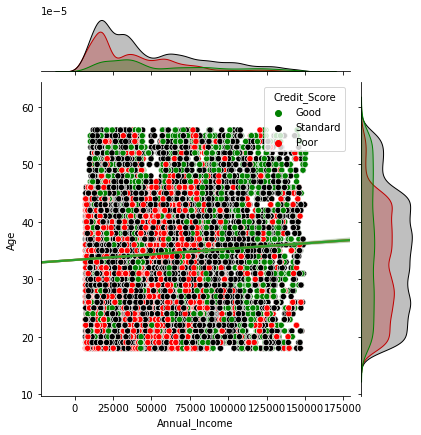

Correlacion entre Annual_Income y Num_Bank_Accounts ==>  -0.010152910798745338


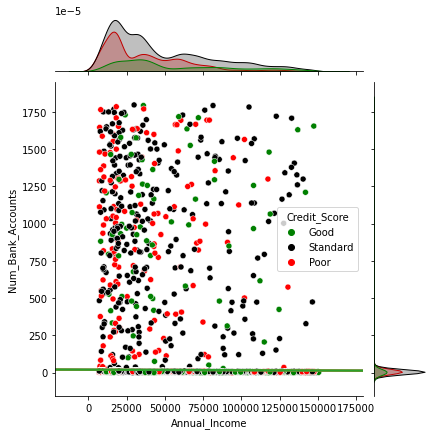

Correlacion entre Annual_Income y Num_Credit_Card ==>  -0.20709876635708585


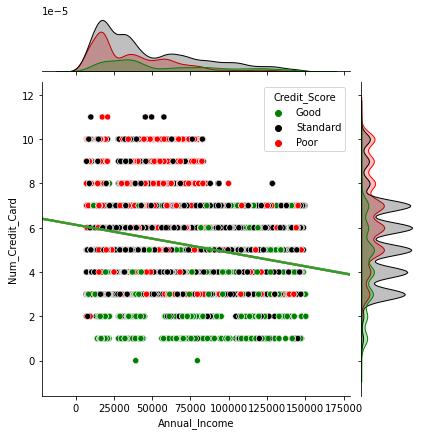

Correlacion entre Annual_Income y Num_of_Loan ==>  -0.003125939013516097


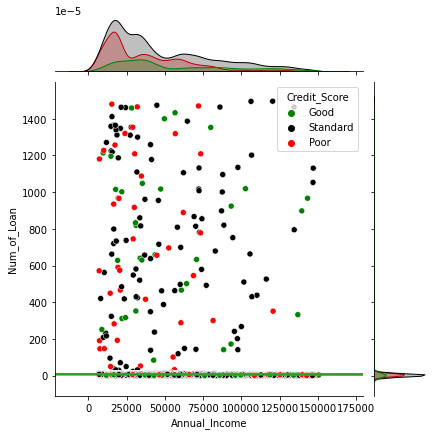

Correlacion entre Annual_Income y Num_Credit_Inquiries ==>  -0.27360059074293047


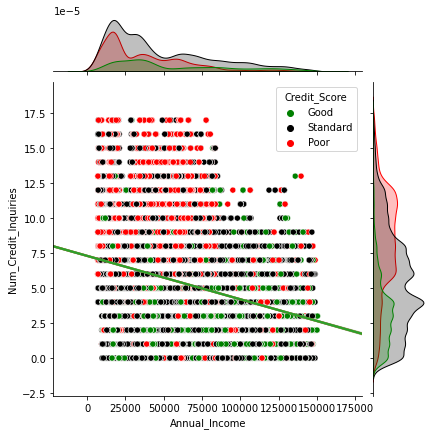

Correlacion entre Annual_Income y Interest_Rate ==>  -0.28361002707882965


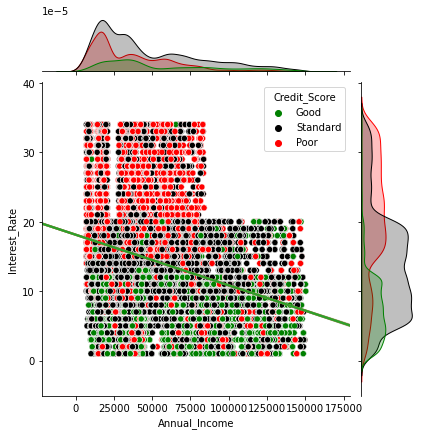

Correlacion entre Annual_Income y Delay_from_due_date ==>  -0.2241233995629683


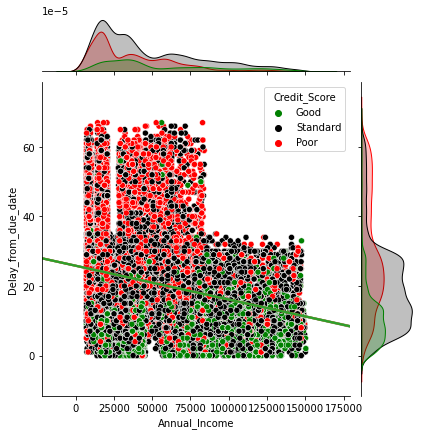

Correlacion entre Annual_Income y Changed_Credit_Limit ==>  -0.15361036199884304


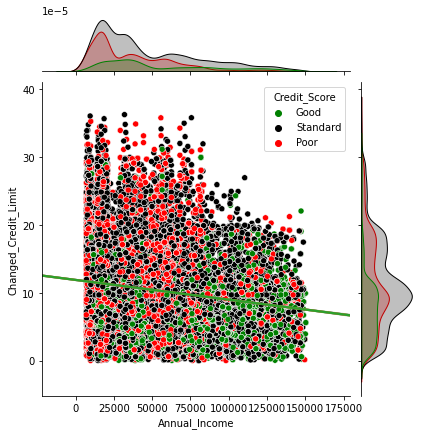

Correlacion entre Annual_Income y Outstanding_Debt ==>  -0.2725627628991057


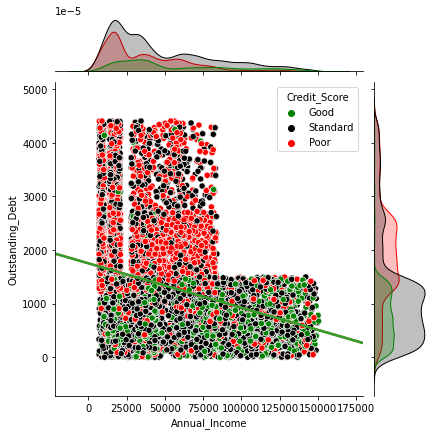

Correlacion entre Annual_Income y Credit_Utilization_Ratio ==>  0.14019304950339004


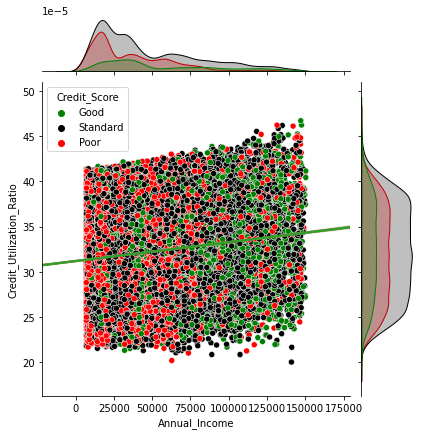

Correlacion entre Annual_Income y Total_EMI_per_month ==>  0.6179610943158268


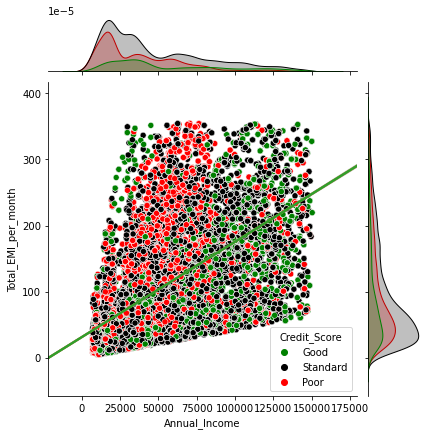

Correlacion entre Annual_Income y Amount_invested_monthly ==>  0.05520587606072332


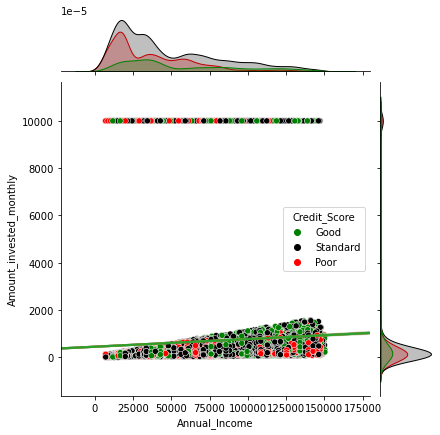

Correlacion entre Annual_Income y Monthly_Balance ==>  0.668015399587524


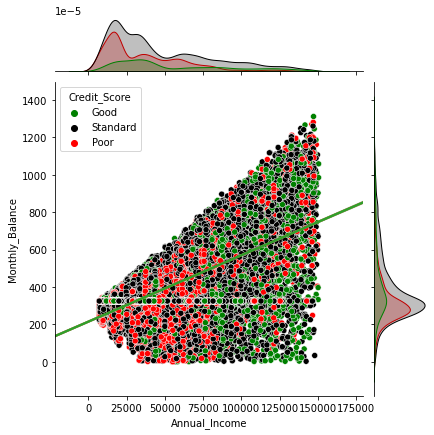

In [ ]:
plt.figure(dpi = 100, figsize = (7,6))
# Parametros posibles: 'scatter', 'hist', 'hex', 'kde', 'reg', 'resid'

for i in  df_credit_multiv_num.columns:
    try:
        if i != 'Annual_Income' and i != 'Credit_Score':
            print(f"Correlacion entre Annual_Income y {i} ==> ",df_credit_multiv_num.corr().loc['Annual_Income'][i])
            ax = sns.jointplot(x='Annual_Income', y=i, data = df_credit_multiv_num, hue='Credit_Score', palette=['green','black','red'])
            
            for _,gr in df_credit_multiv_num.groupby('Credit_Score'):
              sns.regplot(x='Annual_Income', y= i, data = df_credit_multiv_num, scatter=False, ax=ax.ax_joint, truncate=False)

            plt.show();
    except:f'No se puede obtener una correlacion con la variable: {i}'

En el jointplot realizado, se destaca la relación entre la tasa de interés y el ingreso anual, donde se observa una diferenciación importante entre un credit score bueno y uno malo. Lo mismo ocurre para el retraso desde la fecha de vencimiento y el ingreso anual, y para la deuda pendiente e ingreso anual. En el resto de las gráficas, a pesar de haber alguna tendencia, los grupos de credit score se encuentran mezclados entre sí.

### Preguntas

**1. ¿Cómo es la relación entre la tasa de interés y la mezcla crediticia cuando se separa según el credit score?**

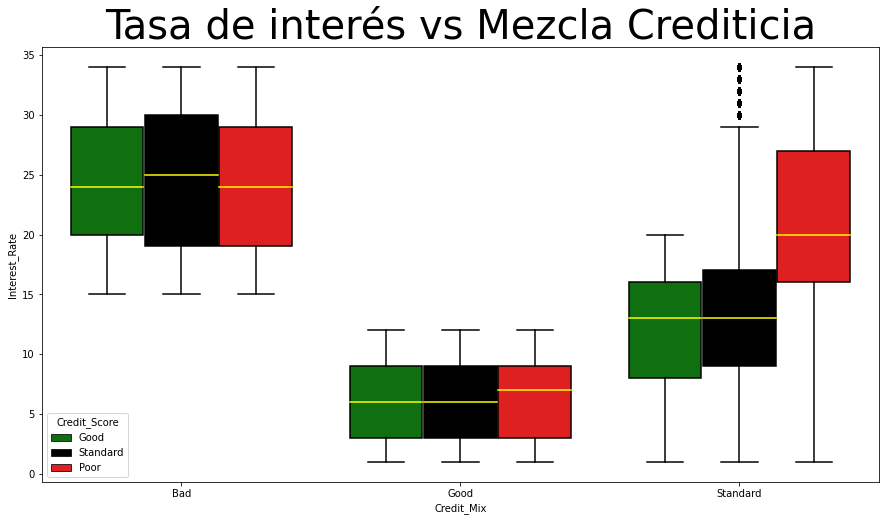

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.boxplot(x = 'Credit_Mix', y = 'Interest_Rate', hue = 'Credit_Score', data = df_credit, palette = paleta, medianprops={"color": "yellow"});
plt.title('Tasa de interés vs Mezcla Crediticia', fontsize=40);

Se observa que la relación entre la tasa de interés y la mezcla crediticia no varía según credit score para los valores Bad y Good. Para el valor Standard de mezcla crediticia si se observa un cambio entre los valores de credit score. Los registros con un buen credit score se concentran en valores pequeños de tasa de interés cuando la mezcla crediticia es standard. Para los valores Poor se encuentran distribuidos entre 0 y 35% de tasa de interés.

**2. ¿Cómo es la relación entre el ingreso anual y la tasa de interés al discriminar por mezcla crediticia?**

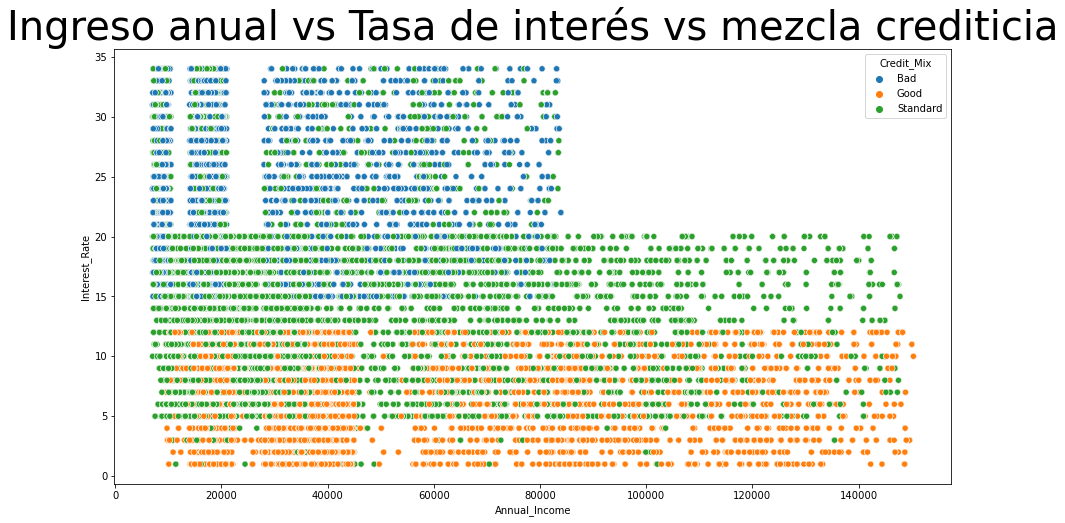

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(data = df_credit, x = 'Annual_Income', y = 'Interest_Rate', hue = 'Credit_Mix');
plt.title('Ingreso anual vs Tasa de interés vs mezcla crediticia', fontsize=40);

Se observa que las personas con ingresos anuales superiores a 85000 acceden a créditos con intereses menores al 20%. También se puede ver que todas las personas con un credit mix malo presentan salarios menores a 85000 y acceden a créditos con tasas de interés mayor a 15%. Por último, se destaca lo bien separados que están los grupos de Good y Bad de la mezcla crediticia.

**3. ¿Cómo afecta la mezcla crediticia a la relación entre ingreso anual y tasa de interés?**

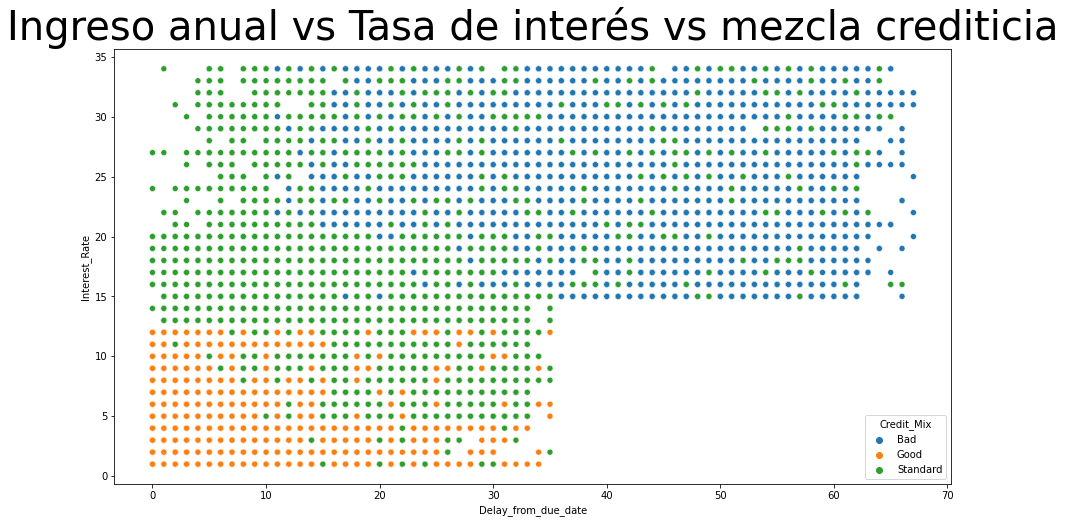

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.scatterplot(data = df_credit, x = 'Delay_from_due_date', y = 'Interest_Rate', hue = 'Credit_Mix');
plt.title('Ingreso anual vs Tasa de interés vs mezcla crediticia', fontsize=40);

Esta relación es similar a la analizada en la pregunta anterior.

## Variables categóricas - Variables Dummies

Una vez analizadas todas las variables, se procede a obtener las variables dummies de las variables categóricas para obtener un dataset útil para el modelado posterior.

En primer lugar, se reemplaza los valores de la variable **Payment_behaviour** mediante números para simplificar el nombre que se usará en dummy.

In [ ]:
df_credit['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      10659
High_spent_Medium_value_payments     7041
Low_spent_Medium_value_payments      5377
High_spent_Large_value_payments      5256
High_spent_Small_value_payments      4566
Low_spent_Large_value_payments       4268
Name: Payment_Behaviour, dtype: int64

In [ ]:
df_credit['Payment_Behaviour'] = df_credit['Payment_Behaviour'].astype('object')

In [ ]:
df_credit.loc[df_credit['Payment_Behaviour'] == 'Low_spent_Small_value_payments', 'Payment_Behaviour'] = 0
df_credit.loc[df_credit['Payment_Behaviour'] == 'High_spent_Medium_value_payments', 'Payment_Behaviour'] = 1
df_credit.loc[df_credit['Payment_Behaviour'] == 'Low_spent_Medium_value_payments', 'Payment_Behaviour'] = 2
df_credit.loc[df_credit['Payment_Behaviour'] == 'High_spent_Large_value_payments', 'Payment_Behaviour'] = 3
df_credit.loc[df_credit['Payment_Behaviour'] == 'High_spent_Small_value_payments', 'Payment_Behaviour'] = 4
df_credit.loc[df_credit['Payment_Behaviour'] == 'Low_spent_Large_value_payments', 'Payment_Behaviour'] = 5

In [ ]:
df_credit['Payment_Behaviour'].value_counts()

0    10659
1     7041
2     5377
3     5256
4     4566
5     4268
Name: Payment_Behaviour, dtype: int64

Luego, se obtienen las variables dummies de las variables categóricas con más de dos valores posibles, con excepción de la variable respuesta.

In [ ]:
df_credit_dummy = pd.get_dummies(df_credit, columns = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'])

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [ ]:
df_credit_dummy.shape

(37167, 58)

In [ ]:
df_credit_dummy.reset_index(inplace = True, drop = True)

In [ ]:
df_credit_dummy.head(10)

Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0   23       19114.12                  3                4              3   
1   23       19114.12                  3                4              3   
2   23       19114.12                  3                4              3   
3   23       19114.12                  3                4              3   
4   28       34847.84                  2                4              6   
5   28       34847.84                  2                4              6   
6   28       34847.84                  2                4              6   
7   28       34847.84                  2                4              6   
8   28       34847.84                  2                4              6   
9   34      143162.64                  1                5              8   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0            4                    5                     4.0   
1            4                    6                    14.0   
2            4                    3                     8.0   
3            4                    3                     6.0   
4            1                    7                     1.0   
5            1                    3                     3.0   
6            1                    3                     1.0   
7            1                    3                     0.0   
8            1                    3                     4.0   
9            3                   13                     6.0   

   Changed_Credit_Limit  Num_Credit_Inquiries  ...  Credit_Mix_Good  \
0                  6.27                   4.0  ...                1   
1                 11.27                   4.0  ...                1   
2                 11.27                   4.0  ...                1   
3                 11.27                   4.0  ...                1   
4                  7.42                   2.0  ...                1   
5                  5.42                   2.0  ...                1   
6                  6.42                   2.0  ...                1   
7                  5.42                   2.0  ...                1   
8                  5.42                   2.0  ...                1   
9                  7.10                   3.0  ...                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
0                    0                         1                          0   
1                    0                         1                          0   
2                    0                         1                          0   
3                    0                         1                          0   
4                    0                         1                          0   
5                    0                         1                          0   
6                    0                         1                          0   
7                    0                         1                          0   
8                    0                         1                          0   
9                    0                         1                          0   

   Payment_Behaviour_0 Payment_Behaviour_1  Payment_Behaviour_2  \
0                    1                   0                    0   
1                    0                   1                    0   
2                    1                   0                    0   
3                    0                   1                    0   
4                    0                   0                    0   
5                    0                   0                    1   
6                    1                   0                    0   
7                    0                   0                    0   
8                    1                   0                    0   
9                    0                   0                    0   

   Payment_Behaviour_3  Payment_Behaviour_4  Payment_Behaviour_5  
0              

In [ ]:
df_credit_dummy.describe(include = "all").T

count unique       top   freq          mean  \
Age                        37167.0    NaN       NaN    NaN     34.260096   
Annual_Income              37167.0    NaN       NaN    NaN  46164.910873   
Num_Bank_Accounts          37167.0    NaN       NaN    NaN     17.329028   
Num_Credit_Card            37167.0    NaN       NaN    NaN      5.555654   
Interest_Rate              37167.0    NaN       NaN    NaN      14.76993   
Num_of_Loan                37167.0    NaN       NaN    NaN      7.233433   
Delay_from_due_date        37167.0    NaN       NaN    NaN     21.352921   
Num_of_Delayed_Payment     37167.0    NaN       NaN    NaN     13.558721   
Changed_Credit_Limit       37167.0    NaN       NaN    NaN     10.557687   
Num_Credit_Inquiries       37167.0    NaN       NaN    NaN      5.868997   
Outstanding_Debt           37167.0    NaN       NaN    NaN   1370.189612   
Credit_Utilization_Ratio   37167.0    NaN       NaN    NaN     32.149394   
Total_EMI_per_month        37167.0    NaN       NaN    NaN     97.780449   
Amount_invested_monthly    37167.0    NaN       NaN    NaN    597.147147   
Monthly_Balance            37167.0    NaN       NaN    NaN    378.570608   
Credit_Score                 37167      3  Standard  19961           NaN   
Auto_Loan                  37167.0    NaN       NaN    NaN      0.332876   
Credit_Builder_Loan        37167.0    NaN       NaN    NaN      0.345064   
Personal_Loan              37167.0    NaN       NaN    NaN      0.338499   
Home_Enquity_Loan          37167.0    NaN       NaN    NaN      0.338499   
Mortgage_Loan              37167.0    NaN       NaN    NaN      0.338096   
Student_Loan               37167.0    NaN       NaN    NaN      0.336885   
Debt_Consolidation_Loan    37167.0    NaN       NaN    NaN       0.33893   
Payday_Loan                37167.0    NaN       NaN    NaN      0.348643   
Month_April                37167.0    NaN       NaN    NaN      0.123981   
Month_August               37167.0    NaN       NaN    NaN      0.123712   
Month_February             37167.0    NaN       NaN    NaN      0.126295   
Month_January              37167.0    NaN       NaN    NaN      0.127075   
Month_July                 37167.0    NaN       NaN    NaN      0.123712   
Month_June                 37167.0    NaN       NaN    NaN      0.125434   
Month_March                37167.0    NaN       NaN    NaN      0.126645   
Month_May                  37167.0    NaN       NaN    NaN      0.123147   
Occupation_Accountant      37167.0    NaN       NaN    NaN      0.066699   
Occupation_Architect       37167.0    NaN       NaN    NaN      0.068744   
Occupation_Developer       37167.0    NaN       NaN    NaN      0.066215   
Occupation_Doctor          37167.0    NaN       NaN    NaN      0.066672   
Occupation_Engineer        37167.0    NaN       NaN    NaN      0.068986   
Occupation_Entrepreneur    37167.0    NaN       NaN    NaN      0.066618   
Occupation_Journalist      37167.0    NaN       NaN    NaN      0.064573   
Occupation_Lawyer          37167.0    NaN       NaN    NaN      0.074582   
Occupation_Manager         37167.0    NaN       NaN    NaN      0.063443   
Occupation_Mechanic        37167.0    NaN       NaN    NaN      0.067318   
Occupation_Media_Manager   37167.0    NaN       NaN    NaN      0.063901   
Occupation_Musician        37167.0    NaN       NaN    NaN      0.062986   
Occupation_Scientist       37167.0    NaN       NaN    NaN      0.067398   
Occupation_Teacher         37167.0    NaN       NaN    NaN      0.067883   
Occupation_Writer          37167.0    NaN       NaN    NaN      0.063981   
Credit_Mix_Bad             37167.0    NaN       NaN    NaN      0.229424   
Credit_Mix_Good            37167.0    NaN       NaN    NaN      0.275406   
Credit_Mix_Standard        37167.0    NaN       NaN    NaN       0.49517   
Payment_of_Min_Amount_No   37167.0    NaN       NaN    NaN      0.383808   
Payment_of_Min_Amount_Yes  37167.0    NaN       NaN    NaN      0.616192   
P

## Codificación

#### Credit_Score

Para la codificación, se tiene en cuenta lo siguiente:

*   'Poor' -> 0
*   'Standard' -> 1
*   'Good' -> 2

In [ ]:
df_credit_dummy['Credit_Score'].value_counts()

Standard    19961
Poor        11304
Good         5902
Name: Credit_Score, dtype: int64

In [ ]:
df_credit_dummy.loc[df_credit_dummy['Credit_Score'] == 'Poor', 'Credit_Score'] = 0
df_credit_dummy.loc[df_credit_dummy['Credit_Score'] == 'Standard', 'Credit_Score'] = 1
df_credit_dummy.loc[df_credit_dummy['Credit_Score'] == 'Good', 'Credit_Score'] = 2

In [ ]:
df_credit_dummy['Credit_Score'] = df_credit_dummy['Credit_Score'].astype(int)

In [ ]:
df_credit_dummy['Credit_Score'].value_counts()

1    19961
0    11304
2     5902
Name: Credit_Score, dtype: int64

In [ ]:
df_credit_dummy['Credit_Score'].describe()

count    37167.000000
mean         0.854656
std          0.664699
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Credit_Score, dtype: float64

In [ ]:
df_credit_dummy.describe(include = "all").T

count          mean           std          min  \
Age                        37167.0     34.260096      9.973560    18.000000   
Annual_Income              37167.0  46164.910873  33867.025289  7006.035000   
Num_Bank_Accounts          37167.0     17.329028    119.167547    -1.000000   
Num_Credit_Card            37167.0      5.555654      2.045865     0.000000   
Interest_Rate              37167.0     14.769930      8.708416     1.000000   
Num_of_Loan                37167.0      7.233433     58.903021     1.000000   
Delay_from_due_date        37167.0     21.352921     14.700144     0.000000   
Num_of_Delayed_Payment     37167.0     13.558721      5.821766     0.000000   
Changed_Credit_Limit       37167.0     10.557687      6.425058     0.000000   
Num_Credit_Inquiries       37167.0      5.868997      3.837744     0.000000   
Outstanding_Debt           37167.0   1370.189612   1029.921826     0.230000   
Credit_Utilization_Ratio   37167.0     32.149394      5.050818    20.000000   
Total_EMI_per_month        37167.0     97.780449     79.080772     4.462837   
Amount_invested_monthly    37167.0    597.147147   1991.295689     0.000000   
Monthly_Balance            37167.0    378.570608    180.175283     0.088628   
Credit_Score               37167.0      0.854656      0.664699     0.000000   
Auto_Loan                  37167.0      0.332876      0.471249     0.000000   
Credit_Builder_Loan        37167.0      0.345064      0.475396     0.000000   
Personal_Loan              37167.0      0.338499      0.473206     0.000000   
Home_Enquity_Loan          37167.0      0.338499      0.473206     0.000000   
Mortgage_Loan              37167.0      0.338096      0.473068     0.000000   
Student_Loan               37167.0      0.336885      0.472652     0.000000   
Debt_Consolidation_Loan    37167.0      0.338930      0.473352     0.000000   
Payday_Loan                37167.0      0.348643      0.476547     0.000000   
Month_April                37167.0      0.123981      0.329564     0.000000   
Month_August               37167.0      0.123712      0.329257     0.000000   
Month_February             37167.0      0.126295      0.332186     0.000000   
Month_January              37167.0      0.127075      0.333062     0.000000   
Month_July                 37167.0      0.123712      0.329257     0.000000   
Month_June                 37167.0      0.125434      0.331215     0.000000   
Month_March                37167.0      0.126645      0.332579     0.000000   
Month_May                  37167.0      0.123147      0.328610     0.000000   
Occupation_Accountant      37167.0      0.066699      0.249503     0.000000   
Occupation_Architect       37167.0      0.068744      0.253021     0.000000   
Occupation_Developer       37167.0      0.066215      0.248660     0.000000   
Occupation_Doctor          37167.0      0.066672      0.249457     0.000000   
Occupation_Engineer        37167.0      0.068986      0.253434     0.000000   
Occupation_Entrepreneur    37167.0      0.066618      0.249363     0.000000   
Occupation_Journalist      37167.0      0.064573      0.245775     0.000000   
Occupation_Lawyer          37167.0      0.074582      0.262720     0.000000   
Occupation_Manager         37167.0      0.063443      0.243762     0.000000   
Occupation_Mechanic        37167.0      0.067318      0.250575     0.000000   
Occupation_Media_Manager   37167.0      0.063901      0.244579     0.000000   
Occupation_Musician        37167.0      0.062986      0.242941     0.000000   
Occupation_Scientist       37167.0      0.067398      0.250714     0.000000   
Occupation_Teacher         37167.0      0.067883      0.251548     0.000000   
Occupation_Writer          37167.0      0.063981      0.244723     0.000000   
Credit_Mix_Bad             37167.0      0.229424      0.420468     0.000000   
Credit_Mix_Good            37167.0      0.275406      0.446724     0.000000   
Credit_Mix_Standard        37167.0      0.495170      0.499983     0.000000   


## Análisis de componentes

Como parte de este análisis, se eliminó la variable **Monthly_Inhand_Salary** antes del análisis univariado. Esto se debe a que la variable eliminada presentaba muchos datos faltantes, por lo que se eliminó de manera temprana para no afectar el dataset.

Se realiza la matriz de correlación para ver si hay variables que tienen una asociación fuerte.

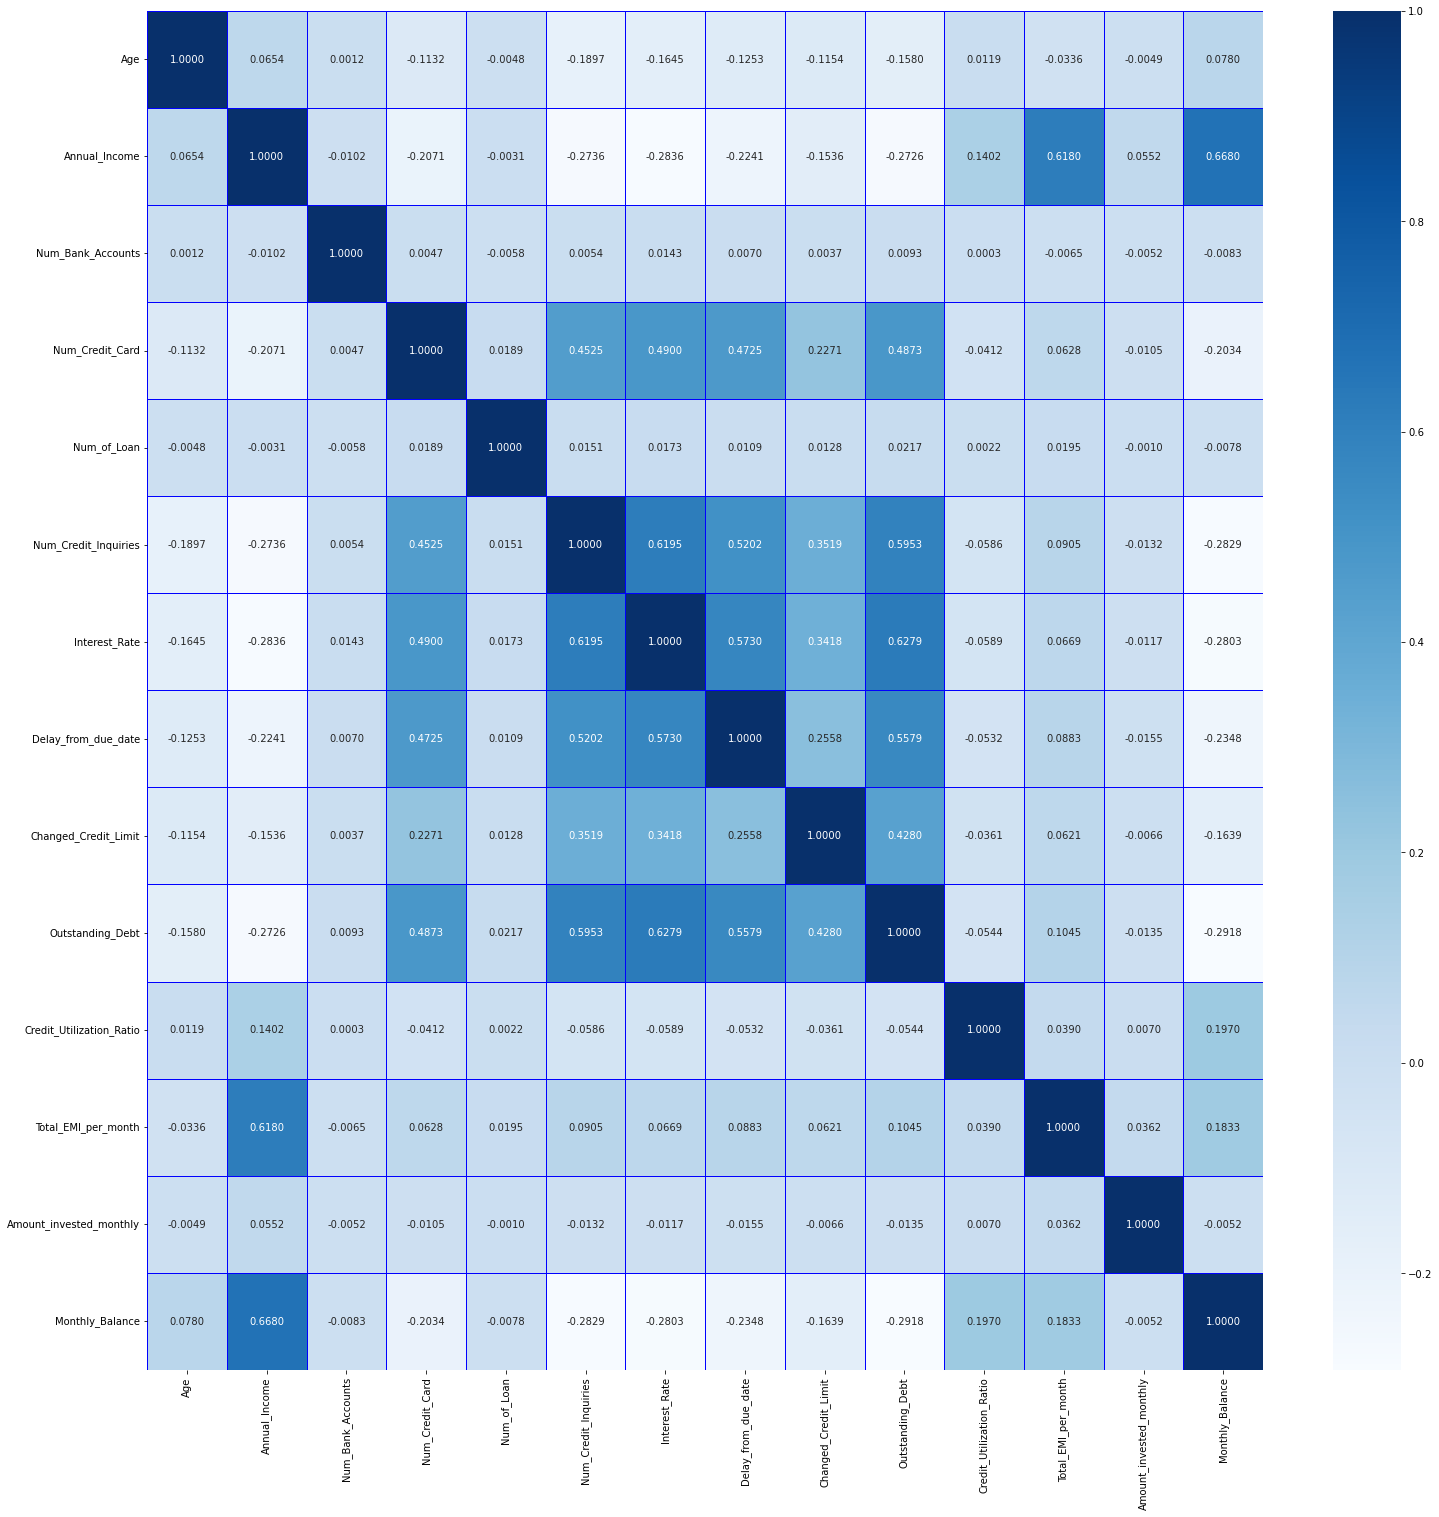

In [ ]:
df_credit_corr = df_credit[['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries', 'Interest_Rate', 'Delay_from_due_date', 'Payment_of_Min_Amount', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]

plt.subplots(nrows=1,ncols=1,figsize=(25,25))
sns.heatmap(df_credit_corr.corr(), annot=True, cmap= 'Blues',linewidths = 0.5,linecolor='b',fmt='0.4f');

En principio, ningún par de variables presentan una correlación alta como para poder simplificar variables. 

### PCA

In [ ]:
#Preprocesamiento
x_pca = df_credit_dummy.drop('Credit_Score', 1)
y_pca = df_credit_dummy['Credit_Score']

#Separamos en train y test
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size = 0.2, random_state = 123)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_3544\2912033255.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_pca = df_credit_dummy.drop('Credit_Score', 1)


In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
sc = StandardScaler()
X_train = sc.fit_transform(x_train_pca)
X_test = sc.transform(x_test_pca)

In [ ]:
#Aplicacion de PCA
pca = PCA()
X_train = pca.fit_transform(x_train_pca)
X_test = pca.transform(x_test_pca)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.95717401e-01, 3.39262813e-03, 8.55631345e-04, 1.57274556e-05,
       1.27513725e-05, 3.06363301e-06, 2.46260029e-06, 1.34338020e-07,
       8.39644200e-08, 3.63477886e-08, 2.76047224e-08, 2.13491020e-08,
       1.77554038e-08, 6.37303698e-09, 2.40456883e-09, 3.28676029e-10,
       1.99617449e-10, 1.99059916e-10, 1.95421163e-10, 1.93274190e-10,
       1.90223398e-10, 1.88285767e-10, 1.86338185e-10, 1.82538345e-10,
       1.48818007e-10, 1.22400569e-10, 1.14110889e-10, 1.11284350e-10,
       1.09961612e-10, 1.08903525e-10, 1.07866702e-10, 1.07190228e-10,
       1.06667392e-10, 1.03632852e-10, 1.00118811e-10, 9.68263743e-11,
       8.12181176e-11, 6.37451450e-11, 5.98979497e-11, 5.92527042e-11,
       5.81082807e-11, 5.79460852e-11, 5.78653668e-11, 5.77918716e-11,
       5.76696175e-11, 5.74776106e-11, 5.66382455e-11, 5.61620636e-11,
       5.54354334e-11, 5.51129696e-11, 5.50259339e-11, 3.86986864e-11,
       1.96370633e-31, 9.85535080e-33, 9.85535080e-33, 9.85535080e-33,
      

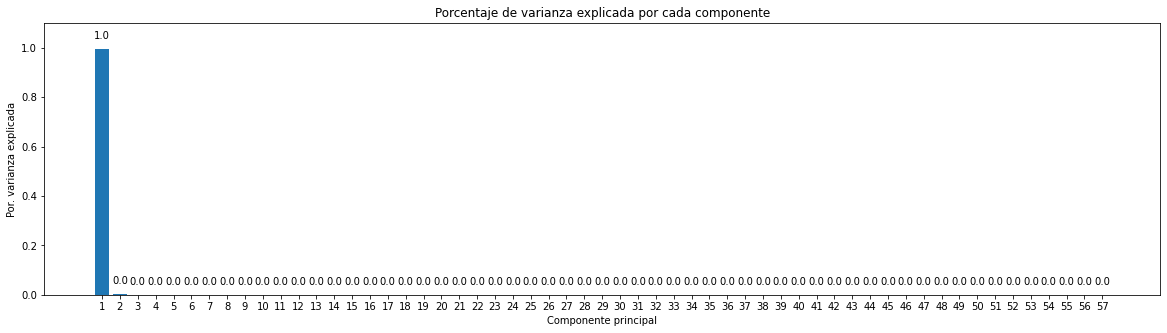

In [ ]:
# Porcentaje de varianza explicada por cada componente
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_credit_dummy.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');


Se obtuvo que el primer componente explica casi la totalidad de la varianza del dataframe, específicamente el 0.9957 de la varianza

## Algoritmos de clasificación

In [ ]:
x = df_credit_dummy.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_credit_dummy['Credit_Score'] #Defino el Target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

### Función de métricas

In [ ]:
def metricas(y_train, train_prediction, y_test, test_prediction):
  # Train
  Accuracy_train = accuracy_score(y_train, train_prediction)
  Precision_train = precision_score(y_train, train_prediction, average='weighted') # ! se usa el parámetro average='weighted' debido el target es multiclase y los datos están desbalanceados 
  Recall_train = recall_score(y_train, train_prediction, average='weighted')
  F1_train = f1_score(y_train, train_prediction, average='weighted')

  print(f"""
  Métricas para entrenamiento:
  Accuracy = {Accuracy_train}
  Precision = {Precision_train}
  Recall = {Recall_train}
  F1 score = {F1_train}
  """)

  # Test
  Accuracy_test = accuracy_score(y_test, test_prediction)
  Precision_test = precision_score(y_test, test_prediction, average='weighted') # ! se usa el parámetro average='weighted' debido el target es multiclase y los datos están desbalanceados 
  Recall_test = recall_score(y_test, test_prediction, average='weighted')
  F1_test = f1_score(y_test, test_prediction, average='weighted')

  print(f"""
  Métricas para test:
  Accuracy = {Accuracy_test}
  Precision = {Precision_test}
  Recall = {Recall_test}
  F1 score = {F1_test}
  """)

  # Matriz de confusión: Gráfico
  matriz_confusion = confusion_matrix(y_test, test_prediction, normalize = 'true')
  # print(matriz_confusion_rl_1)
  fig, ax = plt.subplots(1, figsize = (7, 7))
  ax = sns.heatmap(matriz_confusion, vmin = 0, vmax = 1, annot = True, cmap='Blues')
  ax.set(title = "Matriz de confusión para test")
  plt.show()


### KNN

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred_knn = clf_knn.predict(x_train) #Prediccion en Train
y_test_pred_knn = clf_knn.predict(x_test) #Prediccion en Test


  Métricas para entrenamiento:
  Accuracy = 0.8291436039360394
  Precision = 0.8294578105751278
  Recall = 0.8291436039360394
  F1 score = 0.8281587329218961
  

  Métricas para test:
  Accuracy = 0.655008519415299
  Precision = 0.6492730069735589
  Recall = 0.655008519415299
  F1 score = 0.6505240543210046
  


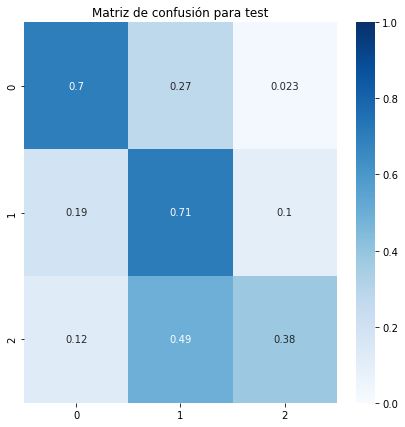

In [ ]:
metricas(y_train, y_train_pred_knn, y_test, y_test_pred_knn)

### Árbol de decisión

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 7, random_state = 42)  # Se genera el modelo

In [ ]:
clf_tree.fit(x_train, y_train)  # Se entrena el modelo

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
y_train_pred_tree = clf_tree.predict(x_train) #Prediccion en Train
y_test_pred_tree = clf_tree.predict(x_test) #Prediccion en Test


  Métricas para entrenamiento:
  Accuracy = 0.7349707872078721
  Precision = 0.741291716389907
  Recall = 0.7349707872078721
  F1 score = 0.7368702012142778
  

  Métricas para test:
  Accuracy = 0.719038651242041
  Precision = 0.7246188218971056
  Recall = 0.719038651242041
  F1 score = 0.7207638140864592
  


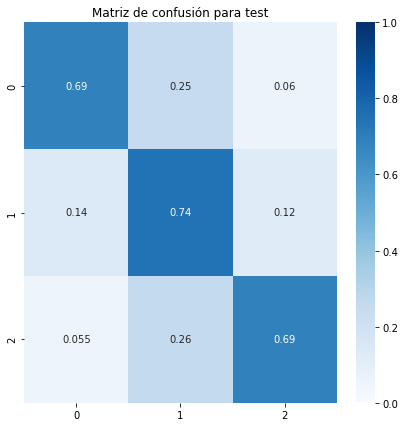

In [ ]:
metricas(y_train, y_train_pred_tree, y_test, y_test_pred_tree)

### Random Forest

#### 1.

In [ ]:
# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced", max_features="log2")

In [ ]:
clf_rforest.fit(x_train, y_train)  # Se entrena el modelo

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [ ]:
y_train_pred_rforest = clf_rforest.predict(x_train) #Prediccion en Train
y_test_pred_rforest = clf_rforest.predict(x_test) #Prediccion en Test


  Métricas para entrenamiento:
  Accuracy = 0.9999615621156211
  Precision = 0.9999615648588331
  Recall = 0.9999615621156211
  F1 score = 0.999961560473291
  

  Métricas para test:
  Accuracy = 0.7758048605506233
  Precision = 0.775242735028816
  Recall = 0.7758048605506233
  F1 score = 0.7754394264098226
  


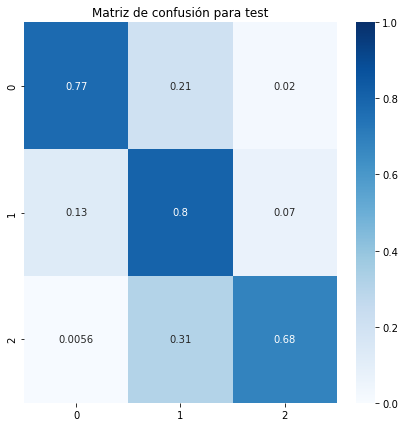

In [ ]:
metricas(y_train, y_train_pred_rforest, y_test, y_test_pred_rforest)

#### 2.

In [ ]:
# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest2 = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced", max_features="log2")

In [ ]:
clf_rforest2.fit(x_train, y_train)  # Se entrena el modelo

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=42)

In [ ]:
y_train_pred_rforest2 = clf_rforest2.predict(x_train) #Prediccion en Train
y_test_pred_rforest2 = clf_rforest2.predict(x_test) #Prediccion en Test


  Métricas para entrenamiento:
  Accuracy = 1.0
  Precision = 1.0
  Recall = 1.0
  F1 score = 1.0
  

  Métricas para test:
  Accuracy = 0.7792126266702538
  Precision = 0.7788379172683396
  Recall = 0.7792126266702538
  F1 score = 0.7789863385680749
  


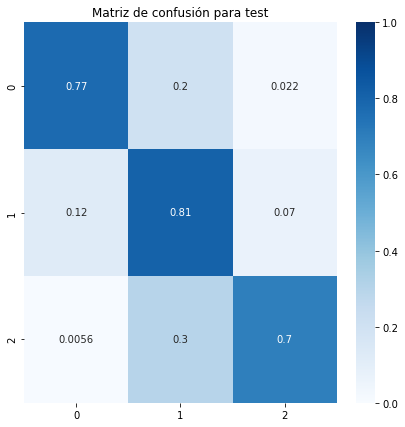

In [ ]:
metricas(y_train, y_train_pred_rforest2, y_test, y_test_pred_rforest2)

#### 3.

In [ ]:
# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced", max_features="sqrt")

In [ ]:
clf_rforest3.fit(x_train, y_train)  # Se entrena el modelo

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=200, random_state=42)

In [ ]:
y_train_pred_rforest3 = clf_rforest3.predict(x_train) #Prediccion en Train
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test


  Métricas para entrenamiento:
  Accuracy = 1.0
  Precision = 1.0
  Recall = 1.0
  F1 score = 1.0
  

  Métricas para test:
  Accuracy = 0.7848623441843781
  Precision = 0.7845734914652978
  Recall = 0.7848623441843781
  F1 score = 0.784694132824864
  


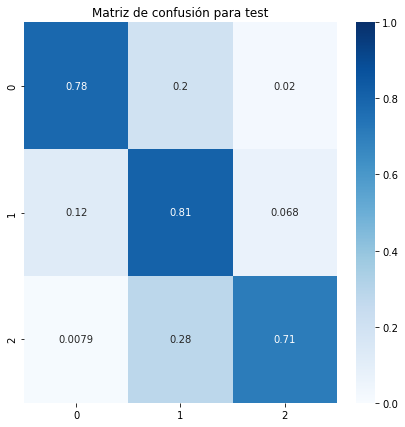

In [ ]:
metricas(y_train, y_train_pred_rforest3, y_test, y_test_pred_rforest3)

#### 4.

In [ ]:
# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest4 = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced", max_features="log2", min_samples_leaf = 100)

In [ ]:
clf_rforest4.fit(x_train, y_train)  # Se entrena el modelo

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=100, n_estimators=200, random_state=42)

In [ ]:
y_train_pred_rforest4 = clf_rforest4.predict(x_train) #Prediccion en Train
y_test_pred_rforest4 = clf_rforest4.predict(x_test) #Prediccion en Test


  Métricas para entrenamiento:
  Accuracy = 0.6898831488314883
  Precision = 0.7445619920847784
  Recall = 0.6898831488314883
  F1 score = 0.6954736898846965
  

  Métricas para test:
  Accuracy = 0.6872926194960093
  Precision = 0.7422632492475354
  Recall = 0.6872926194960093
  F1 score = 0.6925106578853818
  


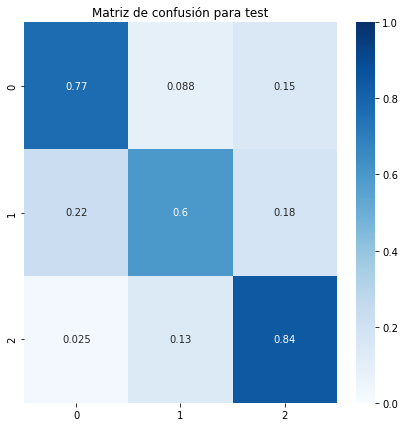

In [ ]:
metricas(y_train, y_train_pred_rforest4, y_test, y_test_pred_rforest4)

Se observa que al restringir los árboles ("poda"), disminuye el overfitting en comparacion con los tres modelos de random forest.

### PCA

Para analizar las componentes obtenidas del PCA, se realiza un modelo de random forest; en particular, el tercer modelo, el cual obtuvo los mejores resultados.


  Métricas para entrenamiento:
  Accuracy = 0.997539975399754
  Precision = 0.9975481090737415
  Recall = 0.997539975399754
  F1 score = 0.9975403264273585
  

  Métricas para test:
  Accuracy = 0.7306967984934086
  Precision = 0.7305619541722587
  Recall = 0.7306967984934086
  F1 score = 0.7306250849933942
  


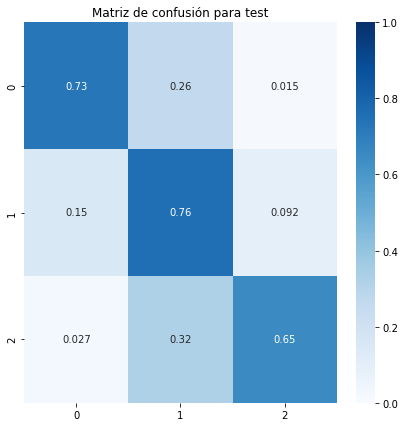

In [ ]:
x = df_credit_dummy.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_credit_dummy['Credit_Score'] #Defino el Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

pca = PCA(n_components=1)
x_train_rf_pca = pca.fit_transform(x_train)
x_test_rf_pca = pca.transform(x_test)

clf_rforest3_pca = RandomForestClassifier(random_state=42, n_estimators=200, class_weight="balanced", max_features="sqrt")

clf_rforest3_pca.fit(x_train_rf_pca, y_train)  # Se entrena el modelo

y_train_pred_rforest3_pca = clf_rforest3_pca.predict(x_train_rf_pca) #Prediccion en Train
y_test_pred_rforest3_pca = clf_rforest3_pca.predict(x_test_rf_pca) #Prediccion en Test

metricas(y_train, y_train_pred_rforest3_pca, y_test, y_test_pred_rforest3_pca)

### SVM


  Métricas para entrenamiento:
  Accuracy = 0.5878989674772138
  Precision = 0.49635368692663834
  Recall = 0.5878989674772138
  F1 score = 0.5279263443844617
  

  Métricas para test:
  Accuracy = 0.5864944847995696
  Precision = 0.495682738234206
  Recall = 0.5864944847995696
  F1 score = 0.525862138990627
  


c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


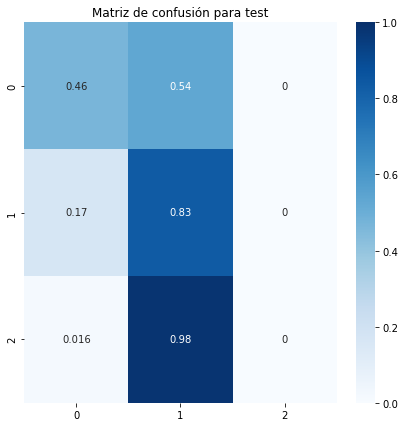

In [ ]:
df_prueba = df_credit_dummy.copy()

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)
clf_svm = SVC(C = 100, kernel = 'rbf', random_state = 42)
clf_svm.fit(x_train, y_train)

y_train_pred_svm = clf_svm.predict(x_train)
y_test_pred_svm = clf_svm.predict(x_test)

metricas(y_train, y_train_pred_svm, y_test, y_test_pred_svm)

### Regresión logística

#### Modelo Multiclase

In [ ]:
xrl = df_credit_dummy.drop('Credit_Score', axis = 1) #* definimos la variable independiente
yrl = df_credit_dummy['Credit_Score'].astype(int) #* Variable dependiente

x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(xrl, yrl, test_size=0.30, random_state = 42)

In [ ]:
model_rl_1 = LogisticRegression(class_weight = 'balanced', multi_class='ovr', random_state = 42, solver = 'newton-cg');
model_rl_1.fit(x_train_rl, y_train_rl);

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py

In [ ]:
predictions_train_rl_1 = model_rl_1.predict(x_train_rl)
predictions_rl_1 = model_rl_1.predict(x_test_rl)


  Métricas para entrenamiento:
  Accuracy = 0.6812346248462484
  Precision = 0.7223127136530647
  Recall = 0.6812346248462484
  F1 score = 0.6868104896326228
  

  Métricas para test:
  Accuracy = 0.6795803066989508
  Precision = 0.7209303844534029
  Recall = 0.6795803066989508
  F1 score = 0.6850533909027524
  


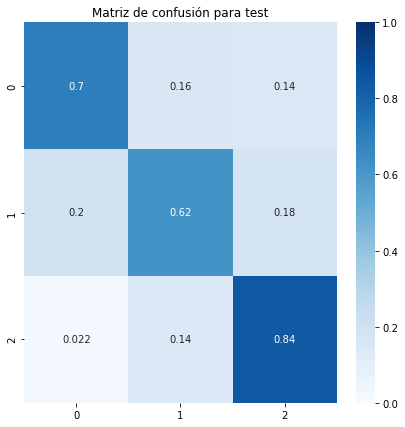

In [ ]:
metricas(y_train_rl, predictions_train_rl_1, y_test_rl, predictions_rl_1)

SEPARAR EL TARGET Y HACER 2 MODELOS de REGRESION LOGISTICA

#### Modelo: Poor + Standard | Good 
Poor con Standard serán 0
Good será 1

##### Segmentación de DataFrames

In [ ]:
df_credit_dummy_ps = df_credit_dummy.copy() # Creo un nuevo DF para no pisar.

In [ ]:
df_credit_dummy_ps['Credit_Score_PS'] = df_credit_dummy_ps['Credit_Score'] # Creo un nuevo campo  Credit_Score_PS igual al Credit_Score

# Asigno al nuevo campo valores 0 para los Standart y 1 para los Good. Con esto nos queda Poor y Standard con 0 y Good con 1
df_credit_dummy_ps.loc[df_credit_dummy_ps['Credit_Score_PS'] == 1, 'Credit_Score_PS'] = 0
df_credit_dummy_ps.loc[df_credit_dummy_ps['Credit_Score_PS'] == 2, 'Credit_Score_PS'] = 1

df_credit_dummyPS_filtro = df_credit_dummy_ps[df_credit_dummy_ps['Credit_Score_PS']==0] # Creo un nuevo DF que muestre solo los valores Poor y Standard
df_credit_dummyPS_filtro.drop('Credit_Score_PS', axis=1, inplace=True) # Elimino la colúmna que me quedo todo ceros y trabajo con el target Credit_Score

df_credit_dummy_ps.drop('Credit_Score', axis=1, inplace = True) # Elimino la colúmna Credit_Score con 0,1,2 para no complicar el modelo

C:\Users\Adrian\AppData\Local\Temp\ipykernel_3544\364657527.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_dummyPS_filtro.drop('Credit_Score_PS', axis=1, inplace=True) # Elimino la colúmna que me quedo todo ceros y trabajo con el target Credit_Score


##### Primer Modelo
Predicción entre good y el resto

In [ ]:
Xps = df_credit_dummy_ps.drop('Credit_Score_PS', axis = 1) #definimos la variable independiente

yps = df_credit_dummy_ps['Credit_Score_PS'] # Variable dependiente

In [ ]:
x_train_rl_ps, x_test_rl_ps, y_train_rl_ps, y_test_rl_ps = train_test_split(Xps, yps, test_size=0.30, random_state = 42)

In [ ]:
model_rl_ps_1 = LogisticRegression(class_weight = 'balanced', random_state = 42, solver = 'newton-cg')
model_rl_ps_1.fit(x_train_rl_ps, y_train_rl_ps)

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

In [ ]:
predictions_train_rl_ps_1 = model_rl_ps_1.predict(x_train_rl_ps)
predictions_rl_ps_1 = model_rl_ps_1.predict(x_test_rl_ps)


  Métricas para entrenamiento:
  Accuracy = 0.832910516605166
  Precision = 0.8904037546668813
  Recall = 0.832910516605166
  F1 score = 0.8493591444038936
  

  Métricas para test:
  Accuracy = 0.833467850417003
  Precision = 0.8891652302459484
  Recall = 0.833467850417003
  F1 score = 0.8495716603877645
  


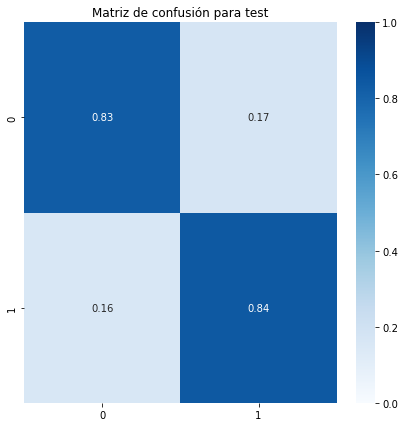

In [ ]:
metricas(y_train_rl_ps, predictions_train_rl_ps_1, y_test_rl_ps, predictions_rl_ps_1)

AUC for our classifier is: 0.8903408986391057


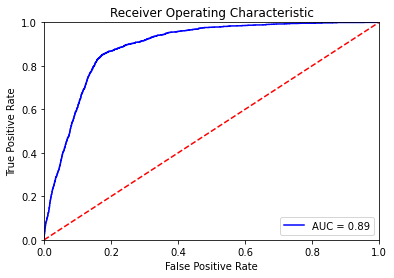

In [ ]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model_rl_ps_1.predict_proba(x_test_rl_ps)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_rl_ps, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()#Template CURVA - ROC


##### Segundo Modelo
Usamos el datasets que contiene solo Poor y Standard

In [ ]:
Xpsf = df_credit_dummyPS_filtro.drop('Credit_Score', axis = 1) # definimos la variable independiente
ypsf = df_credit_dummyPS_filtro['Credit_Score'] # Variable dependiente

In [ ]:
x_train_rl_psf, x_test_rl_psf, y_train_rl_psf, y_test_rl_psf = train_test_split(Xpsf, ypsf, test_size=0.30, random_state = 42)

In [ ]:
model_rl_ps_2 = LogisticRegression(class_weight = 'balanced', random_state = 42, solver = 'newton-cg')
model_rl_ps_2.fit(x_train_rl_psf,y_train_rl_psf)

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

In [ ]:
predictions_train_rl_ps_2 = model_rl_ps_2.predict(x_train_rl_psf)
predictions_rl_ps_2 = model_rl_ps_2.predict(x_test_rl_psf)


  Métricas para entrenamiento:
  Accuracy = 0.7519762394334019
  Precision = 0.7670349469767789
  Recall = 0.7519762394334019
  F1 score = 0.7558137851441682
  

  Métricas para test:
  Accuracy = 0.7562899786780384
  Precision = 0.7677878776293958
  Recall = 0.7562899786780384
  F1 score = 0.7594271265970579
  


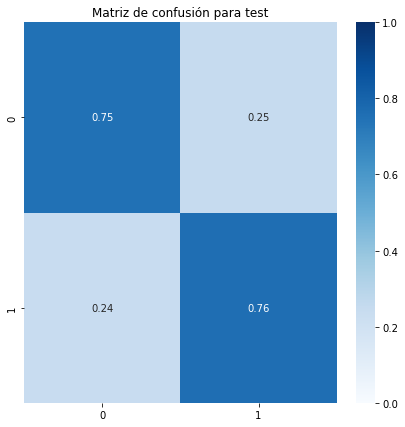

In [ ]:
metricas(y_train_rl_psf, predictions_train_rl_ps_2, y_test_rl_psf, predictions_rl_ps_2)

AUC for our classifier is: 0.7088135212828377


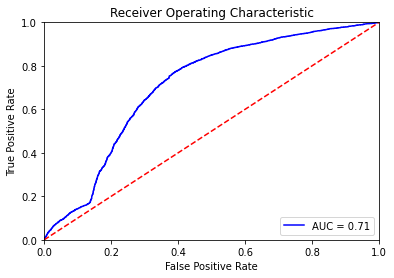

In [ ]:
#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = model_rl_ps_1.predict_proba(x_test_rl_psf)
preds2 = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_rl_psf, preds2)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Modelo: Good + Standard | Poor 
Good con Standard serán 1
Poor será 0

##### Segmentación de DataFrames

In [ ]:
df_credit_dummy_gs = df_credit_dummy.copy() # * Creo un nuevo DF para no pisar.

In [ ]:
df_credit_dummy_gs['Credit_Score_GS'] = df_credit_dummy_gs['Credit_Score'] # Crea nueva columna

df_credit_dummy_gs.loc[df_credit_dummy_gs['Credit_Score_GS'] == 2, 'Credit_Score_GS'] = 1 # cambio los valores de good a 1

df_credit_dummy_gs_filtro = df_credit_dummy_gs[df_credit_dummy_gs['Credit_Score_GS']==1] # Creo un nuevo df con good y Standard
df_credit_dummy_gs_filtro = df_credit_dummy_gs.drop('Credit_Score_GS', axis=1) # Elimina la columna con 1 creada
df_credit_dummy_gs_filtro.loc[df_credit_dummy_gs['Credit_Score'] == 2, 'Credit_Score'] = 0 # busca los 2 para pasarlos a 0. Los good pasan a ser 0 y Standard quedan como 1

df_credit_dummy_gs.drop('Credit_Score', axis=1, inplace=True) # se elimina la columna credit score para df_credit_dummy_gs

##### Primer Modelo
Predicción entre Poor y el resto

In [ ]:
Xgs = df_credit_dummy_gs.drop('Credit_Score_GS', axis = 1) #* definimos la variable independiente
ygs = df_credit_dummy_gs['Credit_Score_GS'] #* Variable dependiente

In [ ]:
x_train_rl_gs, x_test_rl_gs, y_train_rl_gs, y_test_rl_gs = train_test_split(Xgs, ygs, test_size=0.30, random_state = 42)

In [ ]:
model_rl_gs_1 = LogisticRegression(class_weight = 'balanced', random_state = 42, solver = 'newton-cg')
model_rl_gs_1.fit(x_train_rl_gs,y_train_rl_gs)

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py

LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

In [ ]:
predictions_train_rl_gs_1 = model_rl_gs_1.predict(x_train_rl_gs)
predictions_rl_gs_1 = model_rl_gs_1.predict(x_test_rl_gs)


  Métricas para entrenamiento:
  Accuracy = 0.7855166051660517
  Precision = 0.7983061872947922
  Recall = 0.7855166051660517
  F1 score = 0.7897997937229317
  

  Métricas para test:
  Accuracy = 0.7844139539054793
  Precision = 0.7992389523766575
  Recall = 0.7844139539054793
  F1 score = 0.7890602281839976
  


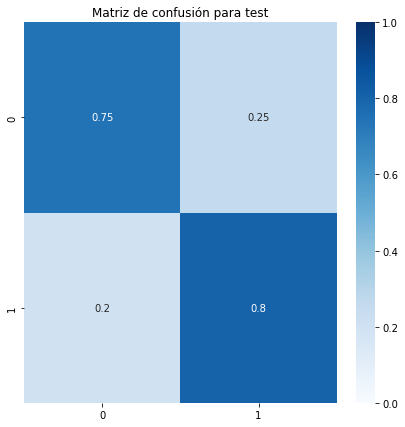

In [ ]:
metricas(y_train_rl_gs, predictions_train_rl_gs_1, y_test_rl_gs, predictions_rl_gs_1)

##### Segundo Modelo
Dejamos datos relacionados con Good y Standard

In [ ]:
Xgsf = df_credit_dummy_gs_filtro.drop('Credit_Score', axis = 1) #* definimos la variable independiente
ygsf = df_credit_dummy_gs_filtro['Credit_Score'] #* Variable dependiente

In [ ]:
x_train_rl_gsf, x_test_rl_gsf, y_train_rl_gsf, y_test_rl_gsf = train_test_split(Xgsf, ygsf, test_size=0.30, random_state = 42)

In [ ]:
model_rl_gs_2 = LogisticRegression(class_weight = 'balanced', random_state = 42, solver = 'newton-cg')
model_rl_gs_2.fit(x_train_rl_gsf,y_train_rl_gsf)

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


LogisticRegression(class_weight='balanced', random_state=42, solver='newton-cg')

In [ ]:
predictions_train_rl_gs_2 = model_rl_ps_2.predict(x_train_rl_gsf)
predictions_rl_gs_2 = model_rl_ps_2.predict(x_test_rl_gsf)


  Métricas para entrenamiento:
  Accuracy = 0.6679735547355473
  Precision = 0.6677248949173991
  Recall = 0.6679735547355473
  F1 score = 0.6643838733496688
  

  Métricas para test:
  Accuracy = 0.6660389202762084
  Precision = 0.665846539234036
  Recall = 0.6660389202762084
  F1 score = 0.6632441664741406
  


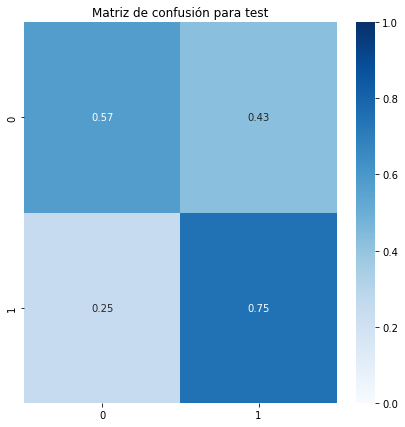

In [ ]:
metricas(y_train_rl_gsf, predictions_train_rl_gs_2, y_test_rl_gsf, predictions_rl_gs_2)

En construcción

## Selección de modelo

Se decidió elegir el algoritmo Random Forest debido a los buenos resultados obtenidos durante la prueba de modelos. Además, es un algoritmo eficiente en cuanto a costo computacional.

A continuación, se realizarán algunas mejoras para tratar de subir las métricas analizadas.

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37167 entries, 1 to 75331
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Month                     37167 non-null  category
 1   Age                       37167 non-null  int64   
 2   Occupation                37167 non-null  category
 3   Annual_Income             37167 non-null  float64 
 4   Num_Bank_Accounts         37167 non-null  int64   
 5   Num_Credit_Card           37167 non-null  int64   
 6   Interest_Rate             37167 non-null  int64   
 7   Num_of_Loan               37167 non-null  int64   
 8   Delay_from_due_date       37167 non-null  int64   
 9   Num_of_Delayed_Payment    37167 non-null  float64 
 10  Changed_Credit_Limit      37167 non-null  float64 
 11  Num_Credit_Inquiries      37167 non-null  float64 
 12  Credit_Mix                37167 non-null  category
 13  Outstanding_Debt          37167 non-null  floa

In [ ]:
numericas=['Age', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score']
       
df_credit_num = df_credit[numericas]

Se codifica la variable target en el nuevo dataframe creado

In [ ]:
df_credit_num.loc[df_credit_num['Credit_Score'] == 'Poor', 'Credit_Score'] = 0
df_credit_num.loc[df_credit_num['Credit_Score'] == 'Standard', 'Credit_Score'] = 1
df_credit_num.loc[df_credit_num['Credit_Score'] == 'Good', 'Credit_Score'] = 2

df_credit_num['Credit_Score'] = df_credit_num['Credit_Score'].astype(int)

C:\Users\Adrian\AppData\Local\Temp\ipykernel_3544\1592047070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit_num['Credit_Score'] = df_credit_num['Credit_Score'].astype(int)


En primer lugar, se entrena un modelo con todas las variables numéricas del dataset. Se observa que las métricas son parecidas a las obtenidas en la sección de pruebas.


  Métricas para entrenamiento:
  Accuracy = 1.0
  Precision = 1.0
  Recall = 1.0
  F1 score = 1.0
  

  Métricas para test:
  Accuracy = 0.7721280602636534
  Precision = 0.7714328658130599
  Recall = 0.7721280602636534
  F1 score = 0.7697090142582157
  


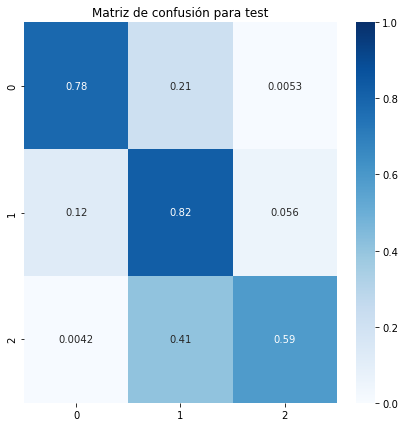

In [ ]:
x = df_credit_num.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_credit_num['Credit_Score'] #Defino el Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=500, class_weight="balanced", max_features="log2")
clf_rforest3.fit(x_train, y_train)  # Se entrena el modelo
y_train_pred_rforest3 = clf_rforest3.predict(x_train) #Prediccion en Train
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test
metricas(y_train, y_train_pred_rforest3, y_test, y_test_pred_rforest3)

A partir del modelo obtenido, se obtiene la "importancia" de cada atributo para el modelo, es decir, qué tan importante es el atributo para la predicción de la variable respuesta.

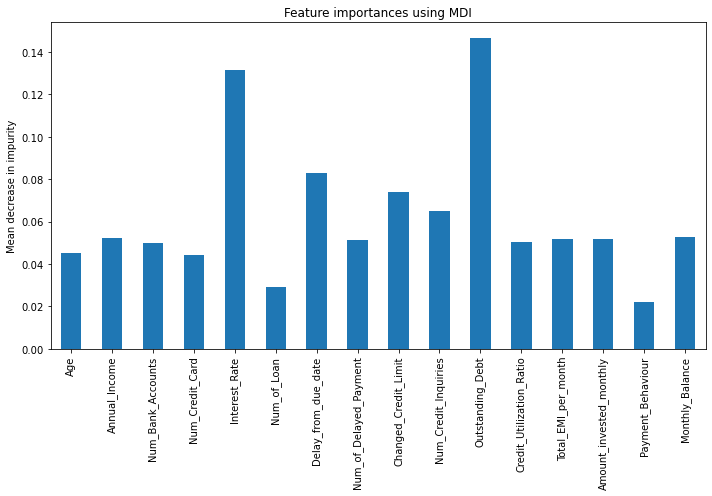

In [ ]:
importances = clf_rforest3.feature_importances_
forest_importances = pd.Series(importances, index=numericas[:-1])

fig, ax = plt.subplots(figsize = (10,7))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Luego de algunas pruebas, se obtuvo que los mejores atributos son:

*   Outstanding_Debt
*   Interest_Rate
*   Delay_from_due_date

Además, a pesar de que la variable Annual_Income no tuvo una importancia alta, se decidió agregarla debido a la importancia que tiene el salario en cuanto a toma de préstamos y el análisis realizado en el EDA. Se observó que las métricas aumentan cuando se agrega esta variable.


  Métricas para entrenamiento:
  Accuracy = 0.9131268287761074
  Precision = 0.9182153615385694
  Recall = 0.9131268287761074
  F1 score = 0.9132573308233488
  

  Métricas para test:
  Accuracy = 0.763653483992467
  Precision = 0.7650989709993234
  Recall = 0.763653483992467
  F1 score = 0.7638965059697218
  


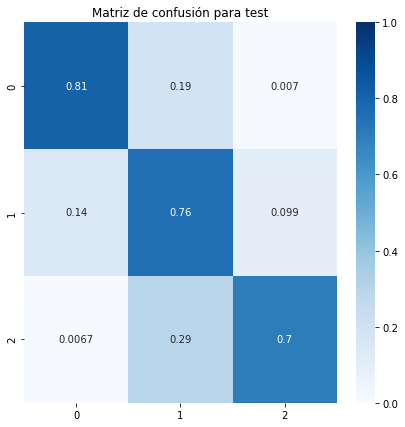

In [ ]:
campos = ['Outstanding_Debt','Interest_Rate','Credit_Score','Delay_from_due_date', 'Annual_Income']

df_prueba = df_credit_dummy[campos]

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=500, class_weight="balanced", max_features="log2")
clf_rforest3.fit(x_train, y_train)  # Se entrena el modelo
y_train_pred_rforest3 = clf_rforest3.predict(x_train) #Prediccion en Train
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test
metricas(y_train, y_train_pred_rforest3, y_test, y_test_pred_rforest3)

Una vez seleccionadas las variables numéricas, se agregaron todas las variables categóricas, en formato dummy, para evaluar la importancia.


  Métricas para entrenamiento:
  Accuracy = 1.0
  Precision = 1.0
  Recall = 1.0
  F1 score = 1.0
  

  Métricas para test:
  Accuracy = 0.7752219531880549
  Precision = 0.7773660167674329
  Recall = 0.7752219531880549
  F1 score = 0.7759811327159557
  


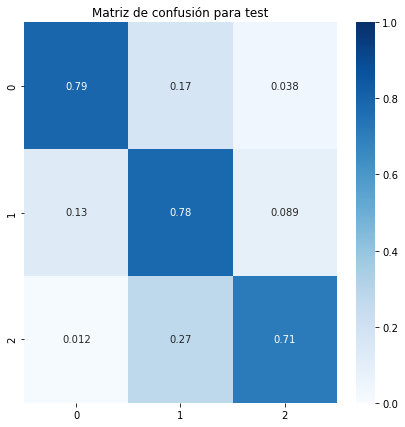

In [ ]:
campos = ['Outstanding_Debt','Interest_Rate','Credit_Score','Delay_from_due_date', 'Annual_Income', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan', 'Month_April', 'Month_August',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes', 'Payment_Behaviour_0',
       'Payment_Behaviour_1', 'Payment_Behaviour_2', 'Payment_Behaviour_3',
       'Payment_Behaviour_4', 'Payment_Behaviour_5']

df_prueba = df_credit_dummy[campos]

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=500, class_weight="balanced", max_features="log2")
clf_rforest3.fit(x_train, y_train)  # Se entrena el modelo
y_train_pred_rforest3 = clf_rforest3.predict(x_train) #Prediccion en Train
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test
metricas(y_train, y_train_pred_rforest3, y_test, y_test_pred_rforest3)

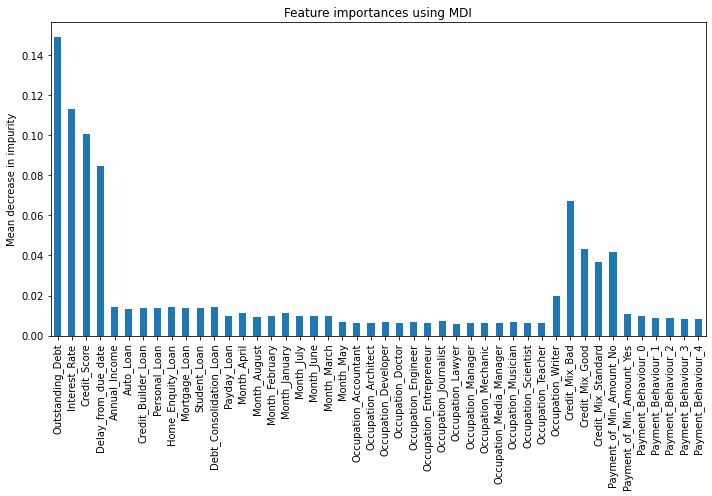

In [ ]:
importances = clf_rforest3.feature_importances_
forest_importances = pd.Series(importances, index=campos[:-1])

fig, ax = plt.subplots(figsize = (10,7))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Se observa que las variables Type_Loan, Credit_Mix y Payment_of_Min_Amount son las variables categóricas con mayor importancia. Con esta variables, las métricas aumentaron hasta alrededor de 0.785.


  Métricas para entrenamiento:
  Accuracy = 0.9130931961120641
  Precision = 0.9181584624331285
  Recall = 0.9130931961120641
  F1 score = 0.9132261331124177
  

  Métricas para test:
  Accuracy = 0.7767016411084208
  Precision = 0.7806515888608309
  Recall = 0.7767016411084208
  F1 score = 0.7772097658777803
  


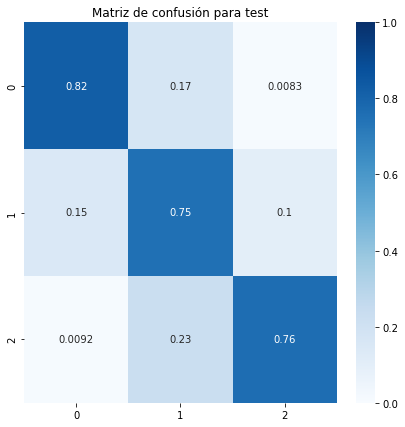

In [ ]:
campos = ['Outstanding_Debt','Interest_Rate','Credit_Score','Delay_from_due_date', 'Annual_Income', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes']

df_prueba = df_credit_dummy[campos]

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=500, class_weight="balanced", max_features="log2")
clf_rforest3.fit(x_train, y_train)  # Se entrena el modelo
y_train_pred_rforest3 = clf_rforest3.predict(x_train) #Prediccion en Train
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test
metricas(y_train, y_train_pred_rforest3, y_test, y_test_pred_rforest3)

Luego, en el análisis univariado se observó un desbalanceo entre las clases de la variable respuesta. Debido a esto, se decide probar el mismo modelo, pero aplicando un balanceo de muestras. Este balanceo se hace mediante la función SMOTE.

Utilizando x_test_smote e y_test_smote:


  Métricas para entrenamiento:
  Accuracy = 0.9441823571160188
  Precision = 0.9441365683492615
  Recall = 0.9441823571160188
  F1 score = 0.9438020730284499
  

  Métricas para test:
  Accuracy = 0.8556399766218585
  Precision = 0.8545237419225679
  Recall = 0.8556399766218585
  F1 score = 0.8547313924739196
  


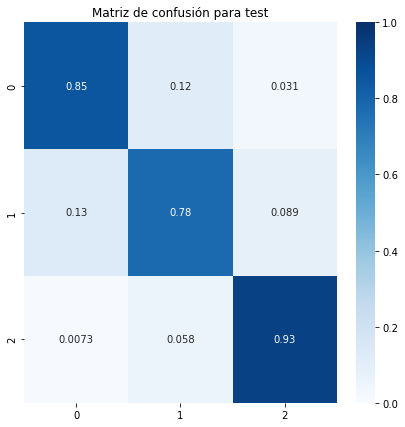

Utilizando x_test e y_test:


  Métricas para entrenamiento:
  Accuracy = 0.9441823571160188
  Precision = 0.9441365683492615
  Recall = 0.9441823571160188
  F1 score = 0.9438020730284499
  

  Métricas para test:
  Accuracy = 0.8755716976055959
  Precision = 0.8779285559927597
  Recall = 0.8755716976055959
  F1 score = 0.8757698982458159
  


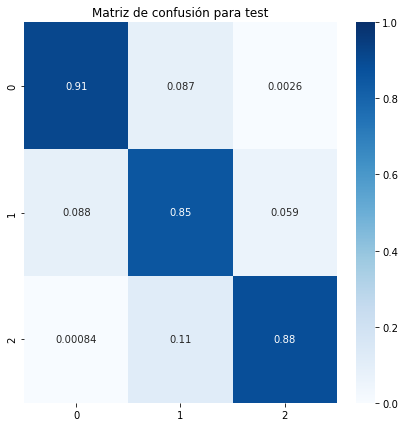

In [ ]:
campos = ['Outstanding_Debt','Interest_Rate','Credit_Score','Delay_from_due_date', 'Annual_Income', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes']

df_prueba = df_credit_dummy[campos]

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

SMT = SMOTE(random_state=42)
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.2, random_state=42)

# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=500, class_weight="balanced", max_features="log2")
clf_rforest3.fit(x_train_smote, y_train_smote)  # Se entrena el modelo

print("Utilizando x_test_smote e y_test_smote:\n")
y_train_pred_rforest3_smote = clf_rforest3.predict(x_train_smote) #Prediccion en Train
y_test_pred_rforest3_smote = clf_rforest3.predict(x_test_smote) #Prediccion en Test
metricas(y_train_smote, y_train_pred_rforest3_smote, y_test_smote, y_test_pred_rforest3_smote)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("Utilizando x_test e y_test:\n")
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test
metricas(y_train_smote, y_train_pred_rforest3_smote, y_test, y_test_pred_rforest3)

Se observa que, al testear el modelo con las muestras originales, las métricas aumentan considerablemente. 

### Grid search

Se realiza un Grid Search para ver si se pueden mejorar los índices al variar los parámetros del random forest.

In [ ]:
campos = ['Outstanding_Debt','Interest_Rate','Credit_Score','Delay_from_due_date', 'Annual_Income', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes']

df_prueba = df_credit_dummy[campos]

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

SMT = SMOTE(random_state=42)
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.2, random_state=42)

clf_rforest_3 = RandomForestClassifier(random_state=42)

#Definicion de Hyperparámetros
param_grid = {'n_estimators':[ 200, 300, 400, 500],
              'max_depth': [5, 10, 15, 25, 35, 50], 
              'min_samples_split':np.arange(2, 20, 2),
              'max_features':['sqrt', 'log2'],
              }

#Utilizamos la grilla definida anteriormente...
model = GridSearchCV(clf_rforest_3, param_grid=param_grid, cv=5)

#Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5
model.fit(x_train_smote, y_train_smote)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')


Mejores parametros: {'max_depth': 35, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 300}
Mejor Score: 0.8508120362147036



Utilizando x_test_smote e y_test_smote:


  Métricas para entrenamiento:
  Accuracy = 0.9368346344925479
  Precision = 0.9367016582147996
  Recall = 0.9368346344925479
  F1 score = 0.9363852361502512
  

  Métricas para test:
  Accuracy = 0.8570593637805795
  Precision = 0.8559674294746925
  Recall = 0.8570593637805795
  F1 score = 0.8560584318165746
  


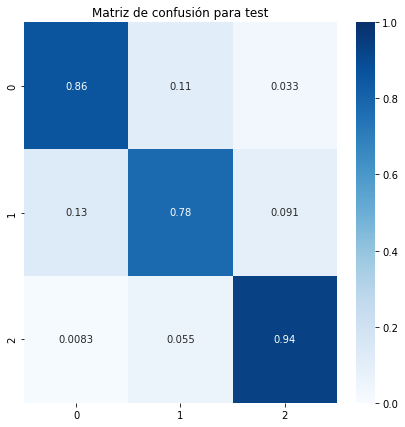

Utilizando x_test e y_test:


  Métricas para entrenamiento:
  Accuracy = 0.9368346344925479
  Precision = 0.9367016582147996
  Recall = 0.9368346344925479
  F1 score = 0.9363852361502512
  

  Métricas para test:
  Accuracy = 0.8696529459241323
  Precision = 0.8724227566166488
  Recall = 0.8696529459241323
  F1 score = 0.869892576923158
  


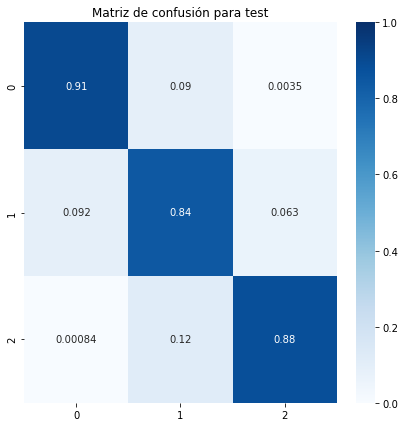

In [ ]:
campos = ['Outstanding_Debt','Interest_Rate','Credit_Score','Delay_from_due_date', 'Annual_Income', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes']

df_prueba = df_credit_dummy[campos]

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir   
y = df_prueba['Credit_Score'] #Defino el Target

SMT = SMOTE(random_state=42)
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.2, random_state=42)

# Se pone balanced porque hay un cierto desbalanceo en la variable target
clf_rforest3 = RandomForestClassifier(random_state=42, n_estimators=300, class_weight="balanced", max_features="sqrt", max_depth = 35, min_samples_split = 4)
clf_rforest3.fit(x_train_smote, y_train_smote)  # Se entrena el modelo

print("Utilizando x_test_smote e y_test_smote:\n")
y_train_pred_rforest3_smote = clf_rforest3.predict(x_train_smote) #Prediccion en Train
y_test_pred_rforest3_smote = clf_rforest3.predict(x_test_smote) #Prediccion en Test
metricas(y_train_smote, y_train_pred_rforest3_smote, y_test_smote, y_test_pred_rforest3_smote)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("Utilizando x_test e y_test:\n")
y_test_pred_rforest3 = clf_rforest3.predict(x_test) #Prediccion en Test
metricas(y_train_smote, y_train_pred_rforest3_smote, y_test, y_test_pred_rforest3)

Con los parámetros analizados con Grid Search no se obtuvieron mejores resultados que el modelo balanceado.

# XGBOOST

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:38:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

  Métricas para entrenamiento:
  Accuracy = 0.8792587360844852
  Precision = 0.8794259452083361
  Recall = 0.8792587360844852
  F1 score = 0.8793211870058947
  

  Métricas para test:
  Accuracy = 0.7664783427495292
  Precision = 0.7667115862336481
  Recall = 0.7664783427495292
  F1 score = 0.7665777022848765
  


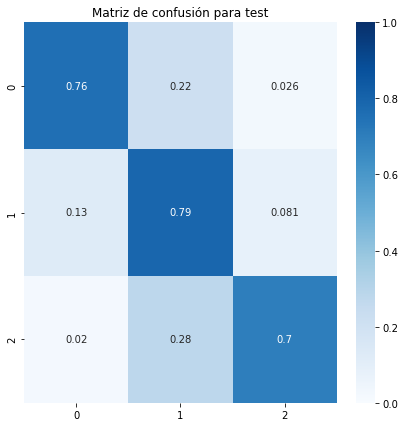

In [ ]:
df_prueba = df_credit_dummy.copy()
x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

clf_xgb = xgb.XGBClassifier(objective='objective=multi:softmax', n_estimators=100, random_state=42)
clf_xgb.fit(x_train, y_train) #Entrenamos el modelo

y_train_pred = clf_xgb.predict(x_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(x_test) #Prediccion en Test

metricas(y_train, y_train_pred, y_test, y_test_pred)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

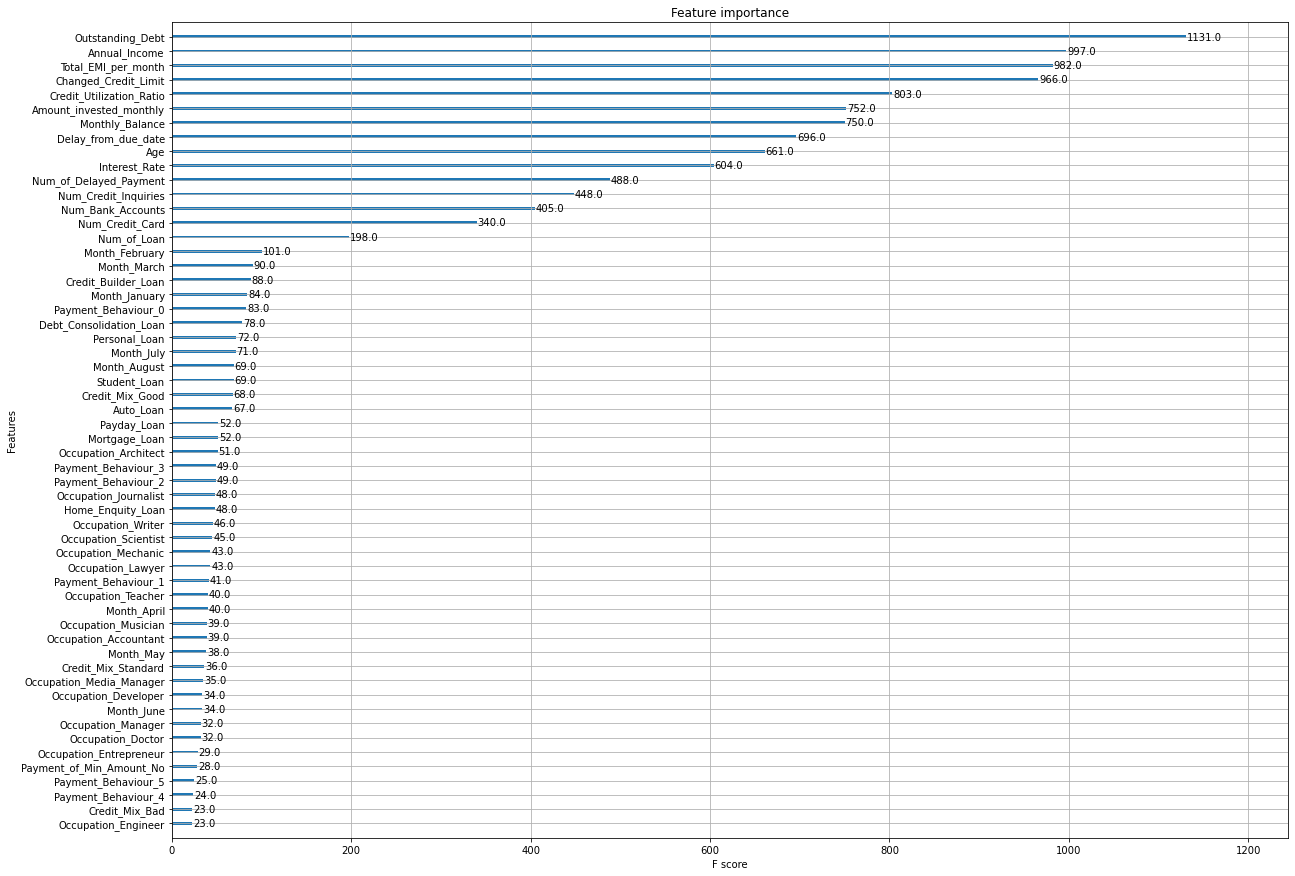

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20, 15))
xgb.plot_importance(clf_xgb, ax=ax)

## SEGUNDO PASO

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:38:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

  Métricas para entrenamiento:
  Accuracy = 0.8491238691016716
  Precision = 0.8489057984183138
  Recall = 0.8491238691016716
  F1 score = 0.8487098977241082
  

  Métricas para test:
  Accuracy = 0.7407855797686306
  Precision = 0.7388425116440079
  Recall = 0.7407855797686306
  F1 score = 0.7389528973772591
  


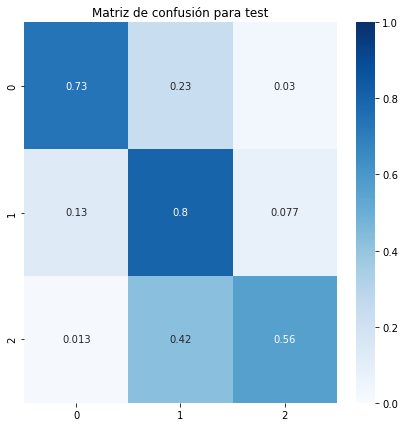

In [ ]:
campos = ['Outstanding_Debt', 
            'Annual_Income', 
            'Total_EMI_per_month',
            'Changed_Credit_Limit', 
            'Credit_Utilization_Ratio', 
            'Amount_invested_monthly', 
            'Monthly_Balance','Delay_from_due_date',
            'Age', 'Interest_Rate', 
            'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
            'Num_Bank_Accounts', 
            'Credit_Score']

df_prueba = df_credit_dummy[campos]
# df_prueba = df_credit_dummy.copy()

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

clf_xgb = xgb.XGBClassifier(objective='objective=multi:softmax', n_estimators=100, random_state=42)
clf_xgb.fit(x_train, y_train) #Entrenamos el modelo

y_train_pred = clf_xgb.predict(x_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(x_test) #Prediccion en Test

metricas(y_train, y_train_pred, y_test, y_test_pred)

## TERCER PASO

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:38:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

  Métricas para entrenamiento:
  Accuracy = 0.814684021121313
  Precision = 0.8187439249630584
  Recall = 0.814684021121313
  F1 score = 0.8156780218101263
  

  Métricas para test:
  Accuracy = 0.7990314769975787
  Precision = 0.80329428679534
  Recall = 0.7990314769975787
  F1 score = 0.8001017744579342
  


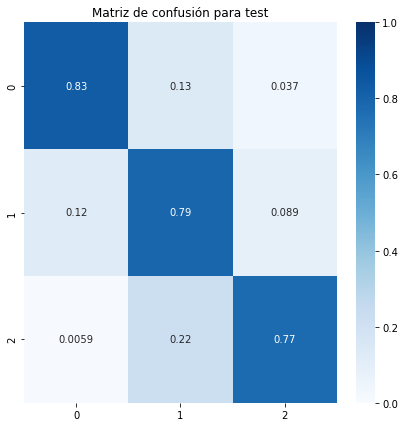

In [ ]:
campos = ['Outstanding_Debt', 
            'Annual_Income', 
            'Total_EMI_per_month',
            'Changed_Credit_Limit', 
            'Credit_Utilization_Ratio', 
            'Amount_invested_monthly', 
            'Monthly_Balance','Delay_from_due_date',
            'Age', 'Interest_Rate', 
            'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
            'Num_Bank_Accounts', 
            'Credit_Score']

df_prueba = df_credit_dummy[campos]
# df_prueba = df_credit_dummy.copy()

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

SMT = SMOTE(random_state=42)
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.2, random_state=42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

clf_xgb = xgb.XGBClassifier(objective='objective=multi:softmax', n_estimators=100, random_state=42)
clf_xgb.fit(x_train_smote, y_train_smote) #Entrenamos el modelo

y_train_pred = clf_xgb.predict(x_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(x_test) #Prediccion en Test

metricas(y_train, y_train_pred, y_test, y_test_pred)

## CUARTO PASO

c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Adrian\anaconda3\envs\envgeneral\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[01:39:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

  Métricas para entrenamiento:
  Accuracy = 0.9649211314028184
  Precision = 0.9649630795853
  Recall = 0.9649211314028184
  F1 score = 0.9649323743708245
  

  Métricas para test:
  Accuracy = 0.934893731503901
  Precision = 0.9350775798759268
  Recall = 0.934893731503901
  F1 score = 0.9349324270521111
  


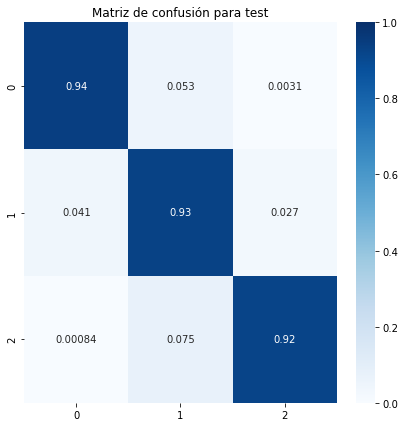

In [ ]:
campos = ['Outstanding_Debt', 
            'Annual_Income', 
            'Total_EMI_per_month',
            'Changed_Credit_Limit', 
            'Credit_Utilization_Ratio', 
            'Amount_invested_monthly', 
            'Monthly_Balance','Delay_from_due_date',
            'Age', 'Interest_Rate', 
            'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
            'Num_Bank_Accounts', 
            'Credit_Score']

df_prueba = df_credit_dummy[campos]
# df_prueba = df_credit_dummy.copy()

x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
y = df_prueba['Credit_Score'] #Defino el Target

SMT = SMOTE(random_state=42)
x_SMT, y_SMT = SMT.fit_resample(x,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.2, random_state=42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

clf_xgb = xgb.XGBClassifier(objective='objective=multi:softmax', n_estimators=1000, random_state=42, max_depth = 10, learning_rate=0.3, max_leaves=100)
clf_xgb.fit(x_train_smote, y_train_smote) #Entrenamos el modelo

y_train_pred = clf_xgb.predict(x_train) #Prediccion en Train
y_test_pred = clf_xgb.predict(x_test) #Prediccion en Test

metricas(y_train, y_train_pred, y_test, y_test_pred)

## Línea Futura: Grid search

El Grid Seach no se concluye por demoras en la ejecución.

In [ ]:
# campos = ['Outstanding_Debt', 
#             'Annual_Income', 
#             'Total_EMI_per_month',
#             'Changed_Credit_Limit', 
#             'Credit_Utilization_Ratio', 
#             'Amount_invested_monthly', 
#             'Monthly_Balance','Delay_from_due_date',
#             'Age', 'Interest_Rate', 
#             'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
#             'Num_Bank_Accounts', 
#             'Credit_Score']

# df_prueba = df_credit_dummy[campos]
# # df_prueba = df_credit_dummy.copy()

# x = df_prueba.drop("Credit_Score", axis=1) #Elimino de mi dataset la variable a predecir
# y = df_prueba['Credit_Score'] #Defino el Target

# SMT = SMOTE(random_state=42)
# x_SMT, y_SMT = SMT.fit_resample(x,y)
# x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.2, random_state=42)

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# clf_xgb = xgb.XGBClassifier(objective='objective=multi:softmax', random_state=42)

# #Definicion de Hyperparámetros
# param_grid = {'n_estimators':[500, 1500, 3000],
#               'learning_rate': [0.1, 0.2, 0.3], 
#               'max_depth': [2, 5, 10],
#               'max_leaves':[100, 1000, 3000],
#               'n_jobs':[-1]
#               }

# #Utilizamos la grilla definida anteriormente...
# model = GridSearchCV(clf_xgb, param_grid=param_grid, cv=5)

# model.fit(x_train_smote, y_train_smote) #Entrenamos el modelo

# print("Mejores parametros: "+str(model.bestparams))
# print("Mejor Score: "+str(model.bestscore)+'\n')

# Conclusión

Para la selección definitiva del modelo se tuvo en cuenta el coste computacional y el valor de las métricas obtenidas. En base a esto, se observó que el modelo que se destaca es el obtenido en el cuarto paso del proceso de mejora del algoritmo XGBClassifier. Este modelo demora 3 minutos y 30 segundos en entrenarse (depende de la capacidad de la computadora) y obtuvo un accuracy de 0.93489.

Para la obtención de este modelo, se realizó un análisis de la importancia, en donde se obtuvo que las variables más importantes para el modelo de clasificación son (en orden de mayor a menor importancia): 

*   Outstanding_Debt,
*   Annual_Income, 
*   Total_EMI_per_month, 
*   Changed_Credit_Limit, 
*   Credit_Utilization_Ratio, 
*   Amount_invested_monthly, 
*   Monthly_Balance, 
*   Delay_from_due_date, 
*   Age, 
*   Interest_Rate, 
*   Num_of_Delayed_Payment, 
*   Num_Credit_Inquiries, 
*   Num_Bank_Accounts. 

Estas variables presentaron un valor superior a 400 de F Score. El resto de las variables resultaron no importantes para el modelo. Además, se realizó un balance de datos debido a la desproporción en la cantidad de registros de cada clase de la variable respuesta.

Con respecto al modelo obtenido del proceso de mejora de Random Forest, este modelo también cumple con el objetivo del modelo y tiene un tiempo de entrenamiento de 33.5 segundos. Sin embargo, el accuracy dio como resultado 0.87543. Por ende, como se observa que el accuracy es inferior al resultado obtenido con el algoritmo XGBClassifier y como los tiempos de ejecución no son grandes, se decide optar por el último algoritmo expuesto.
